In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
train=pd.read_csv("./train.csv")
test=pd.read_csv("./test.csv")
submit_sample=pd.read_csv("./sample_submit.csv", header=None)

df = pd.concat([train, test], sort=False)
df.info()
df.head(20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 399
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        2000 non-null   int64  
 1   age       2000 non-null   int64  
 2   sex       2000 non-null   object 
 3   bmi       2000 non-null   float64
 4   children  2000 non-null   int64  
 5   smoker    2000 non-null   object 
 6   region    2000 non-null   object 
 7   charges   1600 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 140.6+ KB


,id,age,sex,bmi,children,smoker,region,charges
0,0,26,male,32.665465,3,no,southeast,0.0
1,1,41,male,29.798725,1,no,southwest,0.0
2,2,28,male,32.722029,0,yes,northwest,1.0
3,3,20,female,38.429831,2,no,southeast,0.0
4,4,45,female,29.641854,1,no,northwest,0.0
5,5,20,male,37.785937,2,yes,southeast,1.0
6,6,37,male,43.393374,2,no,northeast,0.0
7,7,41,female,32.280407,1,no,northeast,0.0
8,8,40,male,28.865828,1,no,northeast,0.0
9,9,54,female,33.870887,2,no,northeast,0.0


# Pandas Profiling

In [3]:
#import pandas_profiling

# df.profile_report()

### Histogram

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

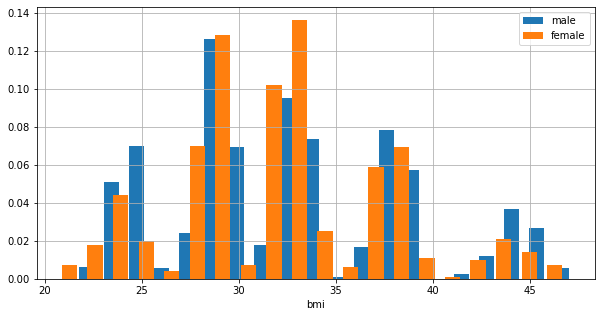

In [5]:
# Histogram BMI (male, female)
plt.figure(figsize=(10, 5))
plt.hist(train[train['sex']=='male']['bmi'], bins=20, label=['male'], rwidth=0.6,density=True)
plt.hist(train[train['sex']=='female']['bmi'], bins=20, label=['female'], rwidth=0.6,density=True)

plt.xlabel('bmi')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

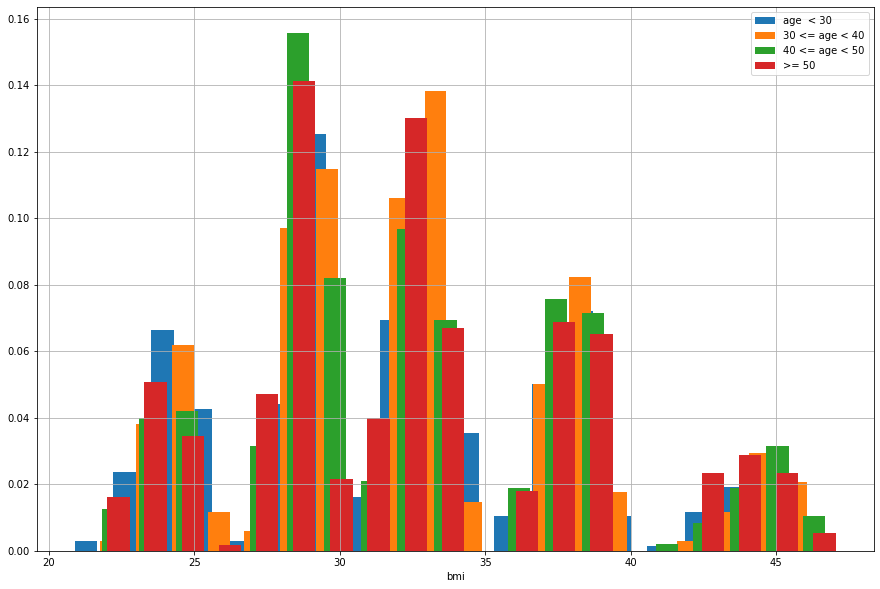

In [6]:
## Histogram BMI (male, female)
plt.figure(figsize=(15, 10))
plt.hist(train.query('age < 30')['bmi'], bins=20, label=['age  < 30'], rwidth=0.6,density=True)
plt.hist(train.query('30 <= age < 40')['bmi'], bins=20, label=['30 <= age < 40'], rwidth=0.6,density=True)
plt.hist(train.query('40 <= age < 50')['bmi'], bins=20, label=['40 <= age < 50'], rwidth=0.6,density=True)
plt.hist(train.query('age >= 50')['bmi'], bins=20, label=['>= 50'], rwidth=0.6,density=True)

plt.xlabel('bmi')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [7]:
print(train['charges'].value_counts()/len(train['charges']))
train_bmi_normal = train.query('bmi < 25')['charges']
print(train_bmi_normal.value_counts()/len(train_bmi_normal))
train_bmi_preobese = train.query('25 <= bmi < 30')['charges']
print(train_bmi_preobese.value_counts()/len(train_bmi_preobese))
train_bmi_obese1 = train.query('30 <= bmi < 35')['charges']
print(train_bmi_obese1.value_counts()/len(train_bmi_obese1))
train_bmi_obese2 = train.query('35 <= bmi < 40')['charges']
print(train_bmi_obese2.value_counts()/len(train_bmi_obese2))
train_bmi_obese3 = train.query('40 <= bmi')['charges']
print(train_bmi_obese3.value_counts()/len(train_bmi_obese3))

0    0.78500
1    0.12375
2    0.09125
Name: charges, dtype: float64
0    0.889423
1    0.100962
2    0.009615
Name: charges, dtype: float64
0    0.770878
1    0.209850
2    0.019272
Name: charges, dtype: float64
0    0.823404
1    0.100000
2    0.076596
Name: charges, dtype: float64
0    0.694534
2    0.228296
1    0.077170
Name: charges, dtype: float64
0    0.750000
2    0.194444
1    0.055556
Name: charges, dtype: float64


In [8]:
# BMI WHO基準
df.loc[df['bmi'] < 25, 'bmi_who'] = 1
df.loc[((df['bmi'] >= 25) & (df['bmi'] < 30)), 'bmi_who'] = 2
df.loc[((df['bmi'] >= 30) & (df['bmi'] < 35)), 'bmi_who'] = 3
df.loc[((df['bmi'] >= 35) & (df['bmi'] < 40)), 'bmi_who'] = 4
df.loc[(df['bmi'] >= 40), 'bmi_who'] = 5
df.head(20)

,id,age,sex,bmi,children,smoker,region,charges,bmi_who
0,0,26,male,32.665465,3,no,southeast,0.0,3.0
1,1,41,male,29.798725,1,no,southwest,0.0,2.0
2,2,28,male,32.722029,0,yes,northwest,1.0,3.0
3,3,20,female,38.429831,2,no,southeast,0.0,4.0
4,4,45,female,29.641854,1,no,northwest,0.0,2.0
5,5,20,male,37.785937,2,yes,southeast,1.0,4.0
6,6,37,male,43.393374,2,no,northeast,0.0,5.0
7,7,41,female,32.280407,1,no,northeast,0.0,3.0
8,8,40,male,28.865828,1,no,northeast,0.0,2.0
9,9,54,female,33.870887,2,no,northeast,0.0,3.0


### Divide dataset into two parts (categorical , numerical)

In [9]:
categorical, numerical = [],[]
for z in df.columns:
    t = df.dtypes[z]
    if t=='object':
        categorical.append(z)
    else:
        numerical.append(z)
print("CategoricaL:\n{}".format(categorical))
print("\nNumericaL:\n{}".format(numerical))

CategoricaL:
['sex', 'smoker', 'region']

NumericaL:
['id', 'age', 'bmi', 'children', 'charges', 'bmi_who']


### Heat map for Correlation coefficient

<AxesSubplot:>

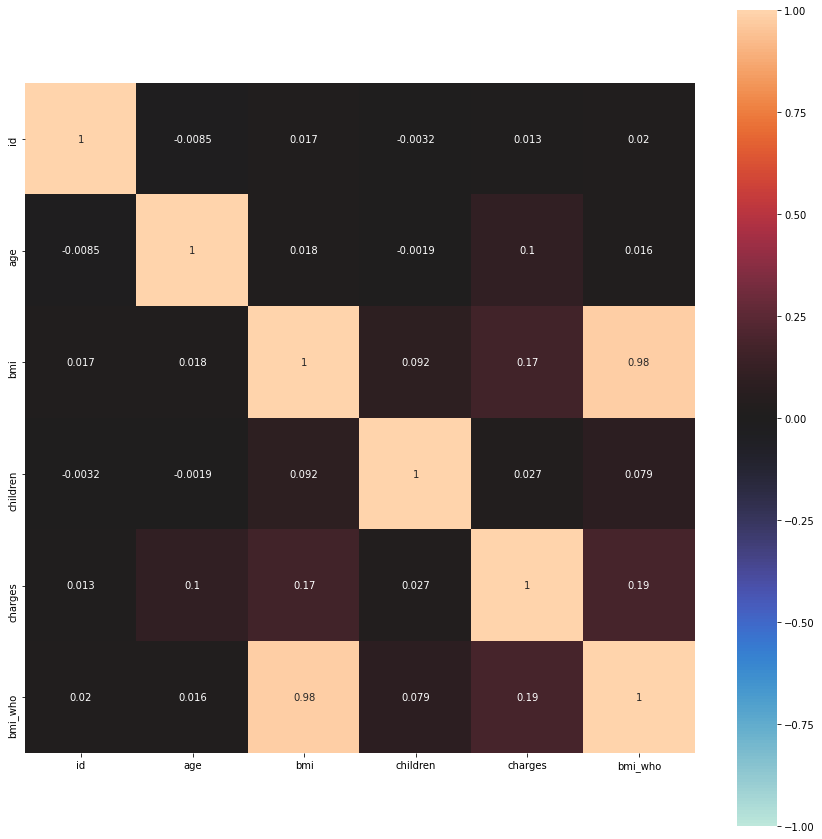

In [10]:
df_corr = df.corr()
plt.figure(figsize=(15, 15)) 
sns.heatmap(df_corr, vmax=1, vmin=-1, center=0, square=True, annot=True)

### Scatter plot

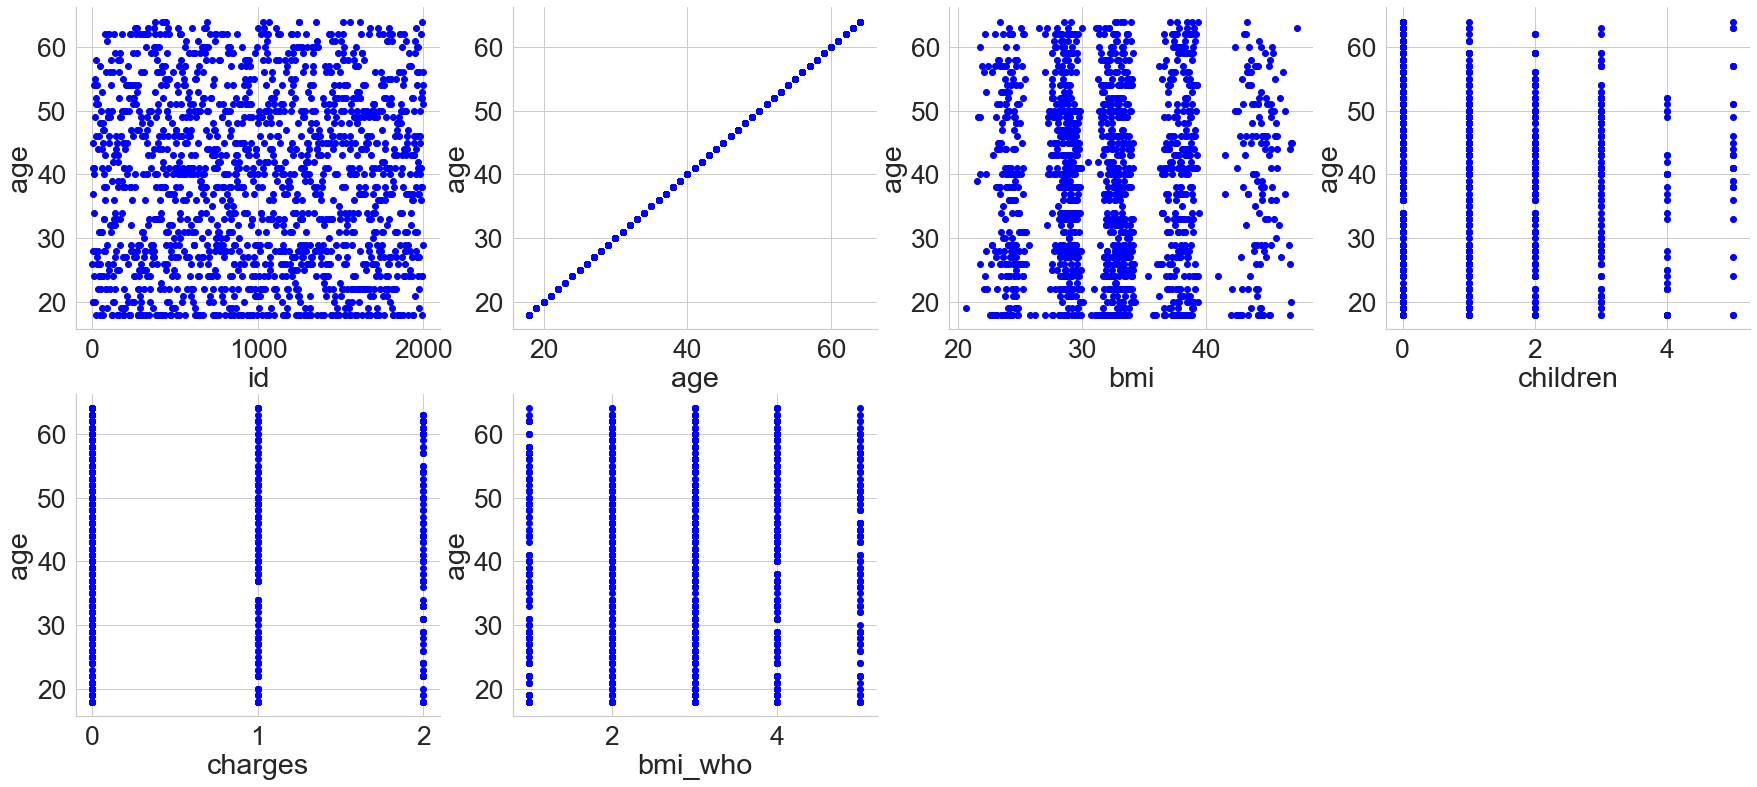

In [11]:
# We shall plot these figures
plt.figure(figsize=(30, 70))
sns.set(font_scale= 2.4)
sns.set_style('whitegrid')

for i, features in enumerate(numerical):
    plt.subplot(10, 4, i+1)
    plt.scatter(data=df.iloc[:len(train)], x=features, y='age', color ="blue")
    plt.xlabel(features)
    plt.ylabel('age')
    
sns.despine()

### Creating Dummy values

In [12]:
df =pd.get_dummies(df, columns=categorical, drop_first=True)

### Separate Data

In [13]:
#df = pd.get_dummies(df)
train = df[:len(train)]
test = df[len(train):]
df.head()

,id,age,bmi,children,charges,bmi_who,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0,26,32.665465,3,0.0,3.0,1,0,0,1,0
1,1,41,29.798725,1,0.0,2.0,1,0,0,0,1
2,2,28,32.722029,0,1.0,3.0,1,1,1,0,0
3,3,20,38.429831,2,0.0,4.0,0,0,0,1,0
4,4,45,29.641854,1,0.0,2.0,0,0,1,0,0


### LightGBM

In [14]:
y_train = train['charges']
X_train = train.drop(['id','charges'], axis=1)
X_test = test.drop(['id','charges'], axis=1)


In [15]:
import optuna.integration.lightgbm as lgb # Optuna 
#import lightgbm as lgb 
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import f1_score

### lightGBM boosting type = rf

In [16]:
y_lgb_rf_preds = []
models_rf = []
y_lgb_rf_oof_train = np.zeros((len(X_train),3))
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=0)

params = {
    'task' : 'train',
    'boosting_type' : 'rf',
    'objective': 'multiclass',
    'num_class': 3,
    'metric' : 'multi_logloss',
    'max_bin' : 255,
    'num_leaves' : 40,
    'learning_rate' : 0.01,
    'feature_fraction' : 0.9,
    'bagging_fraction' : 0.8,
    'bagging_freq': 5,
    'verbose' : -1
}

# Cross Validation
for fold_id, (train_index, valid_index) in enumerate(cv.split(X_train,y_train)):
    X_tr = X_train.iloc[train_index, :]
    X_val = X_train.iloc[valid_index, :]
    y_tr = y_train.iloc[train_index]
    y_val = y_train.iloc[valid_index]
    
    # Train Dataset
    lgb_train = lgb.Dataset(X_tr, y_tr)

    # Evaluation Dataset (early_stopping_rounds)
    lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train)
    
    rf_evals_result = {} #結果を格納するための辞書
    # train
    gbm_rf = lgb.train(params,
                    lgb_train,
                    valid_sets=[lgb_train, lgb_eval],
                    valid_names=['train','eval'],
                    num_boost_round=1000,
                    early_stopping_rounds=10,
                    verbose_eval=100,
                    evals_result=rf_evals_result
                   )
    # Out-of-hold of train data
    y_lgb_rf_oof_train[valid_index] = \
        gbm_rf.predict(X_val, num_iteration=gbm_rf.best_iteration)
    
    # Prediction for X_test data
    y_pred = gbm_rf.predict(X_test, num_iteration=gbm_rf.best_iteration)
    
    # Append Prediction data 
    y_lgb_rf_preds.append(y_pred)
    models_rf.append(gbm_rf)


[I 2021-06-13 10:10:56,248] A new study created in memory with name: no-name-8445e6a6-7ea4-461c-9947-813ec3c2f476
feature_fraction, val_score: 0.373015:  29%|#4   | 2/7 [00:00<00:00, 10.42it/s]

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[3]	train's multi_logloss: 0.355596	eval's multi_logloss: 0.379199
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[12]	train's multi_logloss: 0.33887	eval's multi_logloss: 0.373015


feature_fraction, val_score: 0.373015:  43%|##1  | 3/7 [00:00<00:00, 10.42it/s]

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[28]	train's multi_logloss: 0.371474	eval's multi_logloss: 0.379923
Training until validation scores don't improve for 10 rounds


feature_fraction, val_score: 0.373015:  71%|###5 | 5/7 [00:00<00:00,  7.88it/s]

Early stopping, best iteration is:
[25]	train's multi_logloss: 0.342054	eval's multi_logloss: 0.376951
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.383529	eval's multi_logloss: 0.458915
Training until validation scores don't improve for 10 rounds


feature_fraction, val_score: 0.373015:  86%|####2| 6/7 [00:00<00:00,  8.32it/s]

Early stopping, best iteration is:
[25]	train's multi_logloss: 0.342054	eval's multi_logloss: 0.376951
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[28]	train's multi_logloss: 0.363874	eval's multi_logloss: 0.384765

num_leaves, val_score: 0.373015:   0%|                  | 0/20 [00:00<?, ?it/s]


Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[12]	train's multi_logloss: 0.33887	eval's multi_logloss: 0.373015


num_leaves, val_score: 0.373015:  10%|#         | 2/20 [00:00<00:02,  7.46it/s]

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[12]	train's multi_logloss: 0.33887	eval's multi_logloss: 0.373015
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[12]	train's multi_logloss: 0.33887	eval's multi_logloss: 0.373015


num_leaves, val_score: 0.373015:  20%|##        | 4/20 [00:00<00:01,  8.68it/s]

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[12]	train's multi_logloss: 0.33887	eval's multi_logloss: 0.373015
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[12]	train's multi_logloss: 0.33887	eval's multi_logloss: 0.373015


num_leaves, val_score: 0.373015:  30%|###       | 6/20 [00:00<00:01,  8.74it/s]

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[12]	train's multi_logloss: 0.33887	eval's multi_logloss: 0.373015
Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.373015:  40%|####      | 8/20 [00:00<00:01,  8.62it/s]

Early stopping, best iteration is:
[12]	train's multi_logloss: 0.33887	eval's multi_logloss: 0.373015
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[12]	train's multi_logloss: 0.33887	eval's multi_logloss: 0.373015
Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.373015:  50%|####5    | 10/20 [00:01<00:01,  8.50it/s]

Early stopping, best iteration is:
[12]	train's multi_logloss: 0.33887	eval's multi_logloss: 0.373015
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[12]	train's multi_logloss: 0.338903	eval's multi_logloss: 0.373026
Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.373015:  60%|#####3   | 12/20 [00:01<00:00,  8.33it/s]

Early stopping, best iteration is:
[12]	train's multi_logloss: 0.33887	eval's multi_logloss: 0.373015
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[12]	train's multi_logloss: 0.33887	eval's multi_logloss: 0.373015
Training until validation scores don't improve for 10 rounds

num_leaves, val_score: 0.373015:  70%|######3  | 14/20 [00:01<00:00,  8.64it/s][I 2021-06-13 10:10:58,813] Trial 20 finished with value: 0.3730149667018546 and parameters: {'num_leaves': 213}. Best is trial 7 with value: 0.3730149667018546.



Early stopping, best iteration is:
[12]	train's multi_logloss: 0.33887	eval's multi_logloss: 0.373015
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[12]	train's multi_logloss: 0.33887	eval's multi_logloss: 0.373015


num_leaves, val_score: 0.373015:  75%|######7  | 15/20 [00:01<00:00,  8.74it/s]

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[12]	train's multi_logloss: 0.33887	eval's multi_logloss: 0.373015
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[12]	train's multi_logloss: 0.33887	eval's multi_logloss: 0.373015


num_leaves, val_score: 0.373015:  85%|#######6 | 17/20 [00:02<00:00,  8.18it/s]

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[12]	train's multi_logloss: 0.33887	eval's multi_logloss: 0.373015
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[12]	train's multi_logloss: 0.33887	eval's multi_logloss: 0.373015


num_leaves, val_score: 0.373015:  95%|########5| 19/20 [00:02<00:00,  8.32it/s]

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[25]	train's multi_logloss: 0.347775	eval's multi_logloss: 0.373783
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[12]	train's multi_logloss: 0.33887	eval's multi_logloss: 0.373015


bagging, val_score: 0.373015:  20%|##6          | 2/10 [00:00<00:00,  9.68it/s]

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[12]	train's multi_logloss: 0.340351	eval's multi_logloss: 0.377182
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[13]	train's multi_logloss: 0.366311	eval's multi_logloss: 0.374831
Training until validation scores don't improve for 10 rounds

bagging, val_score: 0.373015:  50%|######5      | 5/10 [00:00<00:00, 13.03it/s][I 2021-06-13 10:10:59,936] Trial 31 finished with value: 0.3747279203540732 and parameters: {'bagging_fraction': 0.613791249051366, 'bagging_freq': 7}. Best is trial 31 with value: 0.3747279203540732.



Early stopping, best iteration is:
[3]	train's multi_logloss: 0.382935	eval's multi_logloss: 0.380991
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[7]	train's multi_logloss: 0.357148	eval's multi_logloss: 0.382709
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.367398	eval's multi_logloss: 0.374728


bagging, val_score: 0.373015:  60%|#######8     | 6/10 [00:00<00:00, 13.03it/s]

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[24]	train's multi_logloss: 0.335325	eval's multi_logloss: 0.375224
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[12]	train's multi_logloss: 0.356258	eval's multi_logloss: 0.382481


bagging, val_score: 0.373015:  90%|###########7 | 9/10 [00:00<00:00, 11.96it/s]

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[3]	train's multi_logloss: 0.388339	eval's multi_logloss: 0.379412
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[8]	train's multi_logloss: 0.364263	eval's multi_logloss: 0.378085
Training until validation scores don't improve for 10 rounds


feature_fraction_stage2, val_score: 0.370198:  33%|3| 2/6 [00:00<00:00, 13.18it[I 2021-06-13 10:11:00,563] Trial 38 finished with value: 0.3701976558884572 and parameters: {'feature_fraction': 0.716}. Best is trial 37 with value: 0.3701976558884572.
feature_fraction_stage2, val_score: 0.370198:  33%|3| 2/6 [00:00<00:00, 13.18it

Early stopping, best iteration is:
[13]	train's multi_logloss: 0.369511	eval's multi_logloss: 0.370198
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[13]	train's multi_logloss: 0.369511	eval's multi_logloss: 0.370198
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[13]	train's multi_logloss: 0.369511	eval's multi_logloss: 0.370198
Training until validation scores don't improve for 10 rounds

feature_fraction_stage2, val_score: 0.370198:  67%|6| 4/6 [00:00<00:00, 13.29it[I 2021-06-13 10:11:00,765] Trial 41 finished with value: 0.3848213276068007 and parameters: {'feature_fraction': 0.748}. Best is trial 37 with value: 0.3701976558884572.



Early stopping, best iteration is:
[5]	train's multi_logloss: 0.380151	eval's multi_logloss: 0.384821
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[13]	train's multi_logloss: 0.369511	eval's multi_logloss: 0.370198
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.380151	eval's multi_logloss: 0.384821


feature_fraction_stage2, val_score: 0.370198: 100%|#| 6/6 [00:00<00:00, 13.57it[I 2021-06-13 10:11:00,846] Trial 42 finished with value: 0.3701976558884572 and parameters: {'feature_fraction': 0.6839999999999999}. Best is trial 37 with value: 0.3701976558884572.
feature_fraction_stage2, val_score: 0.370198: 100%|#| 6/6 [00:00<00:00, 13.24it
regularization_factors, val_score: 0.370191:   0%|      | 0/20 [00:00<?, ?it/s][I 2021-06-13 10:11:00,937] Trial 43 finished with value: 0.3701910207118738 and parameters: {'lambda_l1': 0.0005869804904790936, 'lambda_l2': 9.661545242938306e-05}. Best is trial 43 with value: 0.3701910207118738.
regularization_factors, val_score: 0.370191:   5%| | 1/20 [00:00<00:01, 11.24it

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[13]	train's multi_logloss: 0.369511	eval's multi_logloss: 0.370198
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[13]	train's multi_logloss: 0.369526	eval's multi_logloss: 0.370191
Training until validation scores don't improve for 10 rounds


regularization_factors, val_score: 0.370138:  10%|1| 2/20 [00:00<00:01, 10.39it[I 2021-06-13 10:11:01,140] Trial 45 finished with value: 0.37019201662522827 and parameters: {'lambda_l1': 2.019519098483426e-05, 'lambda_l2': 8.888047547017516e-05}. Best is trial 44 with value: 0.37013752122202936.
regularization_factors, val_score: 0.370138:  15%|1| 3/20 [00:00<00:01, 10.39it

Early stopping, best iteration is:
[13]	train's multi_logloss: 0.369552	eval's multi_logloss: 0.370138
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[13]	train's multi_logloss: 0.369521	eval's multi_logloss: 0.370192


regularization_factors, val_score: 0.370138:  20%|2| 4/20 [00:00<00:01, 10.40it[I 2021-06-13 10:11:01,322] Trial 47 finished with value: 0.3701976463378724 and parameters: {'lambda_l1': 1.5011511697600114e-07, 'lambda_l2': 2.0498048728165712e-06}. Best is trial 44 with value: 0.37013752122202936.
regularization_factors, val_score: 0.370138:  25%|2| 5/20 [00:00<00:01, 10.40it

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[13]	train's multi_logloss: 0.374857	eval's multi_logloss: 0.372328
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[13]	train's multi_logloss: 0.369511	eval's multi_logloss: 0.370198
Training until validation scores don't improve for 10 rounds


regularization_factors, val_score: 0.370138:  40%|4| 8/20 [00:00<00:01, 11.65it[I 2021-06-13 10:11:01,568] Trial 50 finished with value: 0.3701829094607674 and parameters: {'lambda_l1': 0.000127324649796477, 'lambda_l2': 0.001371945024263943}. Best is trial 44 with value: 0.37013752122202936.
regularization_factors, val_score: 0.370138:  40%|4| 8/20 [00:00<00:01, 11.65it

Early stopping, best iteration is:
[13]	train's multi_logloss: 0.369511	eval's multi_logloss: 0.370198
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[13]	train's multi_logloss: 0.369511	eval's multi_logloss: 0.370198
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[13]	train's multi_logloss: 0.369514	eval's multi_logloss: 0.370183


regularization_factors, val_score: 0.370046:  50%|5| 10/20 [00:00<00:00, 12.46i[I 2021-06-13 10:11:01,708] Trial 52 finished with value: 0.37004588390682613 and parameters: {'lambda_l1': 0.08102461224029472, 'lambda_l2': 1.5033819695233156e-06}. Best is trial 52 with value: 0.37004588390682613.
regularization_factors, val_score: 0.370046:  50%|5| 10/20 [00:00<00:00, 12.46i

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[13]	train's multi_logloss: 0.384865	eval's multi_logloss: 0.380416
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[13]	train's multi_logloss: 0.370177	eval's multi_logloss: 0.370046
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[13]	train's multi_logloss: 0.3705	eval's multi_logloss: 0.369703


regularization_factors, val_score: 0.369703:  60%|6| 12/20 [00:01<00:00, 12.22i[I 2021-06-13 10:11:01,945] Trial 55 finished with value: 0.39552107971466927 and parameters: {'lambda_l1': 0.025232858269337754, 'lambda_l2': 8.120398716518814}. Best is trial 53 with value: 0.36970272444662894.
regularization_factors, val_score: 0.369703:  65%|6| 13/20 [00:01<00:00, 12.22i

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[13]	train's multi_logloss: 0.377213	eval's multi_logloss: 0.377113
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[3]	train's multi_logloss: 0.407574	eval's multi_logloss: 0.395521
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[11]	train's multi_logloss: 0.370078	eval's multi_logloss: 0.371523


regularization_factors, val_score: 0.367931:  80%|8| 16/20 [00:01<00:00, 12.52i[I 2021-06-13 10:11:02,188] Trial 58 finished with value: 0.3679314744932001 and parameters: {'lambda_l1': 0.006367119011395967, 'lambda_l2': 0.31384235320969056}. Best is trial 58 with value: 0.3679314744932001.
regularization_factors, val_score: 0.367931:  80%|8| 16/20 [00:01<00:00, 12.52i

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[12]	train's multi_logloss: 0.407153	eval's multi_logloss: 0.394796
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[13]	train's multi_logloss: 0.369097	eval's multi_logloss: 0.367931
Training until validation scores don't improve for 10 rounds


regularization_factors, val_score: 0.367931:  90%|9| 18/20 [00:01<00:00, 11.95i[I 2021-06-13 10:11:02,370] Trial 60 finished with value: 0.37122515859041916 and parameters: {'lambda_l1': 0.0015875013614892939, 'lambda_l2': 0.12771330767074343}. Best is trial 58 with value: 0.3679314744932001.
regularization_factors, val_score: 0.367931:  90%|9| 18/20 [00:01<00:00, 11.95i

Early stopping, best iteration is:
[13]	train's multi_logloss: 0.369362	eval's multi_logloss: 0.368955
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[11]	train's multi_logloss: 0.368385	eval's multi_logloss: 0.371225
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[13]	train's multi_logloss: 0.369493	eval's multi_logloss: 0.370176


regularization_factors, val_score: 0.367931: 100%|#| 20/20 [00:01<00:00, 12.07i[I 2021-06-13 10:11:02,532] Trial 62 finished with value: 0.40219377152962116 and parameters: {'lambda_l1': 0.0033991404300045816, 'lambda_l2': 9.172638886654134}. Best is trial 58 with value: 0.3679314744932001.
regularization_factors, val_score: 0.367931: 100%|#| 20/20 [00:01<00:00, 11.94i
min_data_in_leaf, val_score: 0.365592:  20%|#    | 1/5 [00:00<00:00,  6.68it/s]

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[3]	train's multi_logloss: 0.413101	eval's multi_logloss: 0.402194
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.455398	eval's multi_logloss: 0.454185
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[13]	train's multi_logloss: 0.313411	eval's multi_logloss: 0.365592


min_data_in_leaf, val_score: 0.365592:  80%|#### | 4/5 [00:00<00:00, 13.73it/s]

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.39181	eval's multi_logloss: 0.37846
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[13]	train's multi_logloss: 0.340799	eval's multi_logloss: 0.366204
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[13]	train's multi_logloss: 0.377414	eval's multi_logloss: 0.375001


[I 2021-06-13 10:11:02,906] Trial 67 finished with value: 0.3750013171342785 and parameters: {'min_child_samples': 25}. Best is trial 64 with value: 0.3655917265341785.
min_data_in_leaf, val_score: 0.365592: 100%|#####| 5/5 [00:00<00:00, 13.44it/s]
[I 2021-06-13 10:11:02,934] A new study created in memory with name: no-name-ab087859-3826-4801-b69d-32a671bc4e47
feature_fraction, val_score: 0.449342:  14%|7    | 1/7 [00:00<00:01,  5.57it/s]

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[25]	train's multi_logloss: 0.360219	eval's multi_logloss: 0.449342
Training until validation scores don't improve for 10 rounds


feature_fraction, val_score: 0.394835:  43%|##1  | 3/7 [00:00<00:00,  7.42it/s]

Early stopping, best iteration is:
[7]	train's multi_logloss: 0.344656	eval's multi_logloss: 0.394835
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[4]	train's multi_logloss: 0.336538	eval's multi_logloss: 0.41005
Training until validation scores don't improve for 10 rounds

feature_fraction, val_score: 0.394835:  71%|###5 | 5/7 [00:00<00:00,  9.97it/s]


Early stopping, best iteration is:
[5]	train's multi_logloss: 0.335515	eval's multi_logloss: 0.405234
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[7]	train's multi_logloss: 0.344656	eval's multi_logloss: 0.394835
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[6]	train's multi_logloss: 0.345539	eval's multi_logloss: 0.427511


num_leaves, val_score: 0.394835:   5%|5         | 1/20 [00:00<00:01, 12.06it/s]

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.380438	eval's multi_logloss: 0.438854
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[7]	train's multi_logloss: 0.344656	eval's multi_logloss: 0.394835
Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.394835:  20%|##        | 4/20 [00:00<00:01, 12.12it/s]

Early stopping, best iteration is:
[7]	train's multi_logloss: 0.344656	eval's multi_logloss: 0.394835
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[7]	train's multi_logloss: 0.344656	eval's multi_logloss: 0.394835
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[7]	train's multi_logloss: 0.344656	eval's multi_logloss: 0.394835
Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.394835:  35%|###5      | 7/20 [00:00<00:01, 12.11it/s]

Early stopping, best iteration is:
[7]	train's multi_logloss: 0.344656	eval's multi_logloss: 0.394835
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[7]	train's multi_logloss: 0.344656	eval's multi_logloss: 0.394835
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[7]	train's multi_logloss: 0.344656	eval's multi_logloss: 0.394835


num_leaves, val_score: 0.394835:  45%|####5     | 9/20 [00:00<00:00, 11.70it/s]

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[7]	train's multi_logloss: 0.344656	eval's multi_logloss: 0.394835
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[7]	train's multi_logloss: 0.344656	eval's multi_logloss: 0.394835
Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.394835:  60%|#####3   | 12/20 [00:01<00:00, 12.37it/s]

Early stopping, best iteration is:
[7]	train's multi_logloss: 0.344656	eval's multi_logloss: 0.394835
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.373001	eval's multi_logloss: 0.396652
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[7]	train's multi_logloss: 0.344656	eval's multi_logloss: 0.394835
Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.393453:  75%|######7  | 15/20 [00:01<00:00, 12.90it/s]

Early stopping, best iteration is:
[5]	train's multi_logloss: 0.355362	eval's multi_logloss: 0.394024
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.365339	eval's multi_logloss: 0.393453
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.377184	eval's multi_logloss: 0.396306
Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.393453:  90%|########1| 18/20 [00:01<00:00, 12.77it/s]

Early stopping, best iteration is:
[7]	train's multi_logloss: 0.344832	eval's multi_logloss: 0.394939
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[7]	train's multi_logloss: 0.437074	eval's multi_logloss: 0.436524
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[7]	train's multi_logloss: 0.344656	eval's multi_logloss: 0.394835
Training until validation scores don't improve for 10 rounds


bagging, val_score: 0.393453:  10%|#3           | 1/10 [00:00<00:00, 16.47it/s]

Early stopping, best iteration is:
[7]	train's multi_logloss: 0.344656	eval's multi_logloss: 0.394835
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[7]	train's multi_logloss: 0.344746	eval's multi_logloss: 0.394929
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.365883	eval's multi_logloss: 0.39757


bagging, val_score: 0.393453:  40%|#####2       | 4/10 [00:00<00:00, 16.64it/s]

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[7]	train's multi_logloss: 0.362221	eval's multi_logloss: 0.394399
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.366049	eval's multi_logloss: 0.39564
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.365716	eval's multi_logloss: 0.393745
Training until validation scores don't improve for 10 rounds

bagging, val_score: 0.392833:  60%|#######8     | 6/10 [00:00<00:00, 16.44it/s]


Early stopping, best iteration is:
[7]	train's multi_logloss: 0.364012	eval's multi_logloss: 0.392833
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.369987	eval's multi_logloss: 0.394875
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[8]	train's multi_logloss: 0.370161	eval's multi_logloss: 0.394877


[I 2021-06-13 10:11:05,737] Trial 33 finished with value: 0.394877105817802 and parameters: {'bagging_fraction': 0.5786669576688834, 'bagging_freq': 5}. Best is trial 31 with value: 0.3928334303856536.
bagging, val_score: 0.392833:  90%|###########7 | 9/10 [00:00<00:00, 14.99it/s]

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[8]	train's multi_logloss: 0.373255	eval's multi_logloss: 0.396222
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[10]	train's multi_logloss: 0.364507	eval's multi_logloss: 0.394174
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[25]	train's multi_logloss: 0.371088	eval's multi_logloss: 0.396466


feature_fraction_stage2, val_score: 0.392833:  33%|3| 2/6 [00:00<00:00, 17.35it[I 2021-06-13 10:11:06,152] Trial 39 finished with value: 0.3928334303856536 and parameters: {'feature_fraction': 0.5479999999999999}. Best is trial 38 with value: 0.3928334303856536.
feature_fraction_stage2, val_score: 0.392833:  50%|5| 3/6 [00:00<00:00, 17.35it

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.398854	eval's multi_logloss: 0.438883
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[7]	train's multi_logloss: 0.364012	eval's multi_logloss: 0.392833
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[7]	train's multi_logloss: 0.364012	eval's multi_logloss: 0.392833
Training until validation scores don't improve for 10 rounds


feature_fraction_stage2, val_score: 0.392833: 100%|#| 6/6 [00:00<00:00, 17.54it[I 2021-06-13 10:11:06,322] Trial 42 finished with value: 0.43888302306352805 and parameters: {'feature_fraction': 0.484}. Best is trial 38 with value: 0.3928334303856536.
feature_fraction_stage2, val_score: 0.392833: 100%|#| 6/6 [00:00<00:00, 16.75it
regularization_factors, val_score: 0.392833:   0%|      | 0/20 [00:00<?, ?it/s]

Early stopping, best iteration is:
[7]	train's multi_logloss: 0.364012	eval's multi_logloss: 0.392833
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.398854	eval's multi_logloss: 0.438883
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.398854	eval's multi_logloss: 0.438883
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[8]	train's multi_logloss: 0.396091	eval's multi_logloss: 0.38907


regularization_factors, val_score: 0.389070:  20%|2| 4/20 [00:00<00:01, 15.89it[I 2021-06-13 10:11:06,580] Trial 46 finished with value: 0.3928333907022205 and parameters: {'lambda_l1': 8.780525913387586e-07, 'lambda_l2': 2.312210732205749e-06}. Best is trial 43 with value: 0.3890696652746939.
regularization_factors, val_score: 0.389070:  20%|2| 4/20 [00:00<00:01, 15.89it

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[8]	train's multi_logloss: 0.395727	eval's multi_logloss: 0.39097
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.365703	eval's multi_logloss: 0.400063
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[7]	train's multi_logloss: 0.364012	eval's multi_logloss: 0.392833
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.385479	eval's multi_logloss: 0.391077

regularization_factors, val_score: 0.388494:  30%|3| 6/20 [00:00<00:00, 16.36it[I 2021-06-13 10:11:06,765] Trial 49 finished with value: 0.39299671469760084 and parameters: {'lambda_l1': 1.0920222531188151e-07, 'lambda_l2': 0.025111922516352133}. Best is trial 48 with value: 0.3884941464391417.
regularization_factors, val_score: 0.388494:  35%|3| 7/20 [00:00<00:00, 16.36it


Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.389831	eval's multi_logloss: 0.388494
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[7]	train's multi_logloss: 0.364052	eval's multi_logloss: 0.392997
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.365254	eval's multi_logloss: 0.400364


regularization_factors, val_score: 0.388494:  50%|5| 10/20 [00:00<00:00, 16.45i[I 2021-06-13 10:11:06,937] Trial 52 finished with value: 0.39060061328369455 and parameters: {'lambda_l1': 0.03335029967072812, 'lambda_l2': 1.0575804952500518}. Best is trial 48 with value: 0.3884941464391417.
regularization_factors, val_score: 0.388494:  50%|5| 10/20 [00:00<00:00, 16.45i

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[7]	train's multi_logloss: 0.364012	eval's multi_logloss: 0.392833
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.365727	eval's multi_logloss: 0.390601
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[7]	train's multi_logloss: 0.364011	eval's multi_logloss: 0.39283


[I 2021-06-13 10:11:07,038] Trial 53 finished with value: 0.39283045229341007 and parameters: {'lambda_l1': 8.95957354163637e-05, 'lambda_l2': 0.0001685702565135812}. Best is trial 48 with value: 0.3884941464391417.
regularization_factors, val_score: 0.388494:  60%|6| 12/20 [00:00<00:00, 14.07i[I 2021-06-13 10:11:07,201] Trial 55 finished with value: 0.4019865305047256 and parameters: {'lambda_l1': 0.4713095971510008, 'lambda_l2': 1.4809652851487627e-08}. Best is trial 48 with value: 0.3884941464391417.
regularization_factors, val_score: 0.388494:  65%|6| 13/20 [00:00<00:00, 14.07i

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[8]	train's multi_logloss: 0.402549	eval's multi_logloss: 0.393162
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.367774	eval's multi_logloss: 0.401987
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.386028	eval's multi_logloss: 0.385719


regularization_factors, val_score: 0.385719:  80%|8| 16/20 [00:01<00:00, 13.37i[I 2021-06-13 10:11:07,512] Trial 59 finished with value: 0.40025037392993856 and parameters: {'lambda_l1': 4.745389144723432e-05, 'lambda_l2': 0.4106253284077139}. Best is trial 56 with value: 0.38571852907051307.
regularization_factors, val_score: 0.385719:  85%|8| 17/20 [00:01<00:00, 13.37i

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[7]	train's multi_logloss: 0.364163	eval's multi_logloss: 0.393105
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[8]	train's multi_logloss: 0.366493	eval's multi_logloss: 0.388311
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.366008	eval's multi_logloss: 0.40025


regularization_factors, val_score: 0.385719:  90%|9| 18/20 [00:01<00:00, 13.31i[I 2021-06-13 10:11:07,664] Trial 61 finished with value: 0.38708876603681724 and parameters: {'lambda_l1': 1.2870055831460883e-05, 'lambda_l2': 0.5469795498474171}. Best is trial 56 with value: 0.38571852907051307.
regularization_factors, val_score: 0.385719: 100%|#| 20/20 [00:01<00:00, 13.33i

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[8]	train's multi_logloss: 0.396007	eval's multi_logloss: 0.390948
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[8]	train's multi_logloss: 0.366615	eval's multi_logloss: 0.387089
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.365116	eval's multi_logloss: 0.399865


[I 2021-06-13 10:11:07,737] Trial 62 finished with value: 0.39986507461750137 and parameters: {'lambda_l1': 1.5256049531662113e-05, 'lambda_l2': 0.13579005897679644}. Best is trial 56 with value: 0.38571852907051307.
regularization_factors, val_score: 0.385719: 100%|#| 20/20 [00:01<00:00, 14.16i
min_data_in_leaf, val_score: 0.380328:  60%|###  | 3/5 [00:00<00:00, 16.20it/s]

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.386508	eval's multi_logloss: 0.386037
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[8]	train's multi_logloss: 0.381834	eval's multi_logloss: 0.380328
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.400286	eval's multi_logloss: 0.39277
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.39261	eval's multi_logloss: 0.392756

min_data_in_leaf, val_score: 0.380328: 100%|#####| 5/5 [00:00<00:00, 16.35it/s]
[I 2021-06-13 10:11:08,061] A new study created in memory with name: no-name-47bb4d98-4a72-4913-90d1-e48126b6ad6c
feature_fraction, val_score: inf:   0%|                  | 0/7 [00:00<?, ?it/s]


Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[8]	train's multi_logloss: 0.381848	eval's multi_logloss: 0.382476
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[10]	train's multi_logloss: 0.357299	eval's multi_logloss: 0.519186


feature_fraction, val_score: 0.441661:  43%|##1  | 3/7 [00:00<00:00, 10.99it/s]

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[9]	train's multi_logloss: 0.335973	eval's multi_logloss: 0.464396
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[7]	train's multi_logloss: 0.33158	eval's multi_logloss: 0.441661
Training until validation scores don't improve for 10 rounds


feature_fraction, val_score: 0.441197:  86%|####2| 6/7 [00:00<00:00, 11.89it/s]

Early stopping, best iteration is:
[6]	train's multi_logloss: 0.349137	eval's multi_logloss: 0.441197
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.383941	eval's multi_logloss: 0.469837
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[11]	train's multi_logloss: 0.369107	eval's multi_logloss: 0.54882
Training until validation scores don't improve for 10 rounds

num_leaves, val_score: 0.441197:   5%|5         | 1/20 [00:00<00:01, 14.13it/s]


Early stopping, best iteration is:
[6]	train's multi_logloss: 0.349137	eval's multi_logloss: 0.441197
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[6]	train's multi_logloss: 0.349137	eval's multi_logloss: 0.441197
Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.441197:  20%|##        | 4/20 [00:00<00:01, 12.22it/s]

Early stopping, best iteration is:
[6]	train's multi_logloss: 0.349137	eval's multi_logloss: 0.441197
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[6]	train's multi_logloss: 0.349137	eval's multi_logloss: 0.441197
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[6]	train's multi_logloss: 0.349137	eval's multi_logloss: 0.441197


[I 2021-06-13 10:11:09,020] Trial 10 finished with value: 0.4411974194229456 and parameters: {'num_leaves': 134}. Best is trial 7 with value: 0.4411974194229456.
num_leaves, val_score: 0.441197:  30%|###       | 6/20 [00:00<00:01, 11.31it/s]

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[6]	train's multi_logloss: 0.349137	eval's multi_logloss: 0.441197
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[6]	train's multi_logloss: 0.349137	eval's multi_logloss: 0.441197
Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.441197:  45%|####5     | 9/20 [00:00<00:00, 11.49it/s]

Early stopping, best iteration is:
[6]	train's multi_logloss: 0.349137	eval's multi_logloss: 0.441197
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[6]	train's multi_logloss: 0.349137	eval's multi_logloss: 0.441197
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[6]	train's multi_logloss: 0.349137	eval's multi_logloss: 0.441197
Training until validation scores don't improve for 10 rounds

num_leaves, val_score: 0.441197:  55%|####9    | 11/20 [00:00<00:00, 11.74it/s]


Early stopping, best iteration is:
[6]	train's multi_logloss: 0.349137	eval's multi_logloss: 0.441197
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[6]	train's multi_logloss: 0.349137	eval's multi_logloss: 0.441197
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[6]	train's multi_logloss: 0.370614	eval's multi_logloss: 0.448237


num_leaves, val_score: 0.441197:  70%|######3  | 14/20 [00:01<00:00, 12.80it/s]

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[7]	train's multi_logloss: 0.428476	eval's multi_logloss: 0.469438
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[6]	train's multi_logloss: 0.349137	eval's multi_logloss: 0.441197
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[6]	train's multi_logloss: 0.349137	eval's multi_logloss: 0.441197


num_leaves, val_score: 0.441197:  85%|#######6 | 17/20 [00:01<00:00, 12.60it/s]

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[6]	train's multi_logloss: 0.349137	eval's multi_logloss: 0.441197
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[6]	train's multi_logloss: 0.349566	eval's multi_logloss: 0.441238
Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.441197:  95%|########5| 19/20 [00:01<00:00, 12.28it/s]

Early stopping, best iteration is:
[6]	train's multi_logloss: 0.349137	eval's multi_logloss: 0.441197
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[6]	train's multi_logloss: 0.349137	eval's multi_logloss: 0.441197
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[6]	train's multi_logloss: 0.349137	eval's multi_logloss: 0.441197


bagging, val_score: 0.433943:  10%|#3           | 1/10 [00:00<00:01,  6.60it/s]

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[33]	train's multi_logloss: 0.333495	eval's multi_logloss: 0.433943
Training until validation scores don't improve for 10 rounds


bagging, val_score: 0.433943:  20%|##6          | 2/10 [00:00<00:01,  6.60it/s]

Early stopping, best iteration is:
[7]	train's multi_logloss: 0.338802	eval's multi_logloss: 0.439667
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[61]	train's multi_logloss: 0.32666	eval's multi_logloss: 0.426151


bagging, val_score: 0.426151:  40%|#####2       | 4/10 [00:00<00:00,  6.60it/s]

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[6]	train's multi_logloss: 0.352356	eval's multi_logloss: 0.446862
Training until validation scores don't improve for 10 rounds


bagging, val_score: 0.426151:  60%|#######8     | 6/10 [00:00<00:00,  7.50it/s]

Early stopping, best iteration is:
[35]	train's multi_logloss: 0.3522	eval's multi_logloss: 0.436625
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[7]	train's multi_logloss: 0.357736	eval's multi_logloss: 0.454497
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[6]	train's multi_logloss: 0.330487	eval's multi_logloss: 0.434813

bagging, val_score: 0.426151:  90%|###########7 | 9/10 [00:01<00:00,  9.97it/s]


Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[6]	train's multi_logloss: 0.347824	eval's multi_logloss: 0.437338
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[7]	train's multi_logloss: 0.359983	eval's multi_logloss: 0.443398
Training until validation scores don't improve for 10 rounds


feature_fraction_stage2, val_score: 0.426151:   0%|      | 0/6 [00:00<?, ?it/s][I 2021-06-13 10:11:11,545] Trial 37 finished with value: 0.4728184674434428 and parameters: {'feature_fraction': 0.484}. Best is trial 37 with value: 0.4728184674434428.
feature_fraction_stage2, val_score: 0.426151:  17%|1| 1/6 [00:00<00:00, 13.70it

Early stopping, best iteration is:
[6]	train's multi_logloss: 0.337483	eval's multi_logloss: 0.430837
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.387611	eval's multi_logloss: 0.472818
Training until validation scores don't improve for 10 rounds


feature_fraction_stage2, val_score: 0.426151:  33%|3| 2/6 [00:00<00:00,  7.02it[I 2021-06-13 10:11:11,820] Trial 39 finished with value: 0.4728184674434428 and parameters: {'feature_fraction': 0.45199999999999996}. Best is trial 38 with value: 0.4261506494729791.
feature_fraction_stage2, val_score: 0.426151:  50%|5| 3/6 [00:00<00:00,  7.02it

Early stopping, best iteration is:
[61]	train's multi_logloss: 0.32666	eval's multi_logloss: 0.426151
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.387611	eval's multi_logloss: 0.472818
Training until validation scores don't improve for 10 rounds


feature_fraction_stage2, val_score: 0.426151:  67%|6| 4/6 [00:00<00:00,  7.18it[I 2021-06-13 10:11:12,102] Trial 41 finished with value: 0.4728184674434428 and parameters: {'feature_fraction': 0.42}. Best is trial 38 with value: 0.4261506494729791.
feature_fraction_stage2, val_score: 0.426151:  83%|8| 5/6 [00:00<00:00,  7.18it

Early stopping, best iteration is:
[61]	train's multi_logloss: 0.32666	eval's multi_logloss: 0.426151
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.387611	eval's multi_logloss: 0.472818
Training until validation scores don't improve for 10 rounds


feature_fraction_stage2, val_score: 0.426151: 100%|#| 6/6 [00:00<00:00,  7.02it[I 2021-06-13 10:11:12,325] Trial 42 finished with value: 0.4261506494729791 and parameters: {'feature_fraction': 0.58}. Best is trial 38 with value: 0.4261506494729791.
feature_fraction_stage2, val_score: 0.426151: 100%|#| 6/6 [00:00<00:00,  6.98it
regularization_factors, val_score: 0.426151:   0%|      | 0/20 [00:00<?, ?it/s]

Early stopping, best iteration is:
[61]	train's multi_logloss: 0.32666	eval's multi_logloss: 0.426151
Training until validation scores don't improve for 10 rounds


regularization_factors, val_score: 0.426151:   5%| | 1/20 [00:00<00:04,  4.53it[I 2021-06-13 10:11:12,656] Trial 44 finished with value: 0.4401872658204444 and parameters: {'lambda_l1': 3.905305158269239e-05, 'lambda_l2': 1.8009065222472427}. Best is trial 43 with value: 0.42654510865021.
regularization_factors, val_score: 0.426151:  10%|1| 2/20 [00:00<00:03,  4.53it

Early stopping, best iteration is:
[61]	train's multi_logloss: 0.330515	eval's multi_logloss: 0.426545
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[24]	train's multi_logloss: 0.351661	eval's multi_logloss: 0.440187
Training until validation scores don't improve for 10 rounds


regularization_factors, val_score: 0.426151:  15%|1| 3/20 [00:00<00:02,  7.53it[I 2021-06-13 10:11:12,768] Trial 45 finished with value: 0.44012538188367584 and parameters: {'lambda_l1': 0.0005152381397749088, 'lambda_l2': 1.2433833147835565}. Best is trial 43 with value: 0.42654510865021.
regularization_factors, val_score: 0.426151:  15%|1| 3/20 [00:00<00:02,  7.53it

Early stopping, best iteration is:
[24]	train's multi_logloss: 0.347529	eval's multi_logloss: 0.440125
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[61]	train's multi_logloss: 0.329196	eval's multi_logloss: 0.426371

regularization_factors, val_score: 0.426151:  20%|2| 4/20 [00:00<00:02,  6.10it[I 2021-06-13 10:11:13,051] Trial 47 finished with value: 0.457066040309702 and parameters: {'lambda_l1': 5.007899323614767, 'lambda_l2': 0.002893727705342445}. Best is trial 46 with value: 0.42637141584132443.
regularization_factors, val_score: 0.426151:  25%|2| 5/20 [00:00<00:02,  6.10it


Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[12]	train's multi_logloss: 0.37449	eval's multi_logloss: 0.457066
Training until validation scores don't improve for 10 rounds


regularization_factors, val_score: 0.426080:  30%|3| 6/20 [00:00<00:02,  6.05it[I 2021-06-13 10:11:13,316] Trial 48 finished with value: 0.42608049017358274 and parameters: {'lambda_l1': 6.554838138663709e-05, 'lambda_l2': 2.1619892877957654e-06}. Best is trial 48 with value: 0.42608049017358274.
regularization_factors, val_score: 0.426080:  30%|3| 6/20 [00:00<00:02,  6.05it

Early stopping, best iteration is:
[61]	train's multi_logloss: 0.326741	eval's multi_logloss: 0.42608
Training until validation scores don't improve for 10 rounds


regularization_factors, val_score: 0.426080:  35%|3| 7/20 [00:01<00:02,  5.55it[I 2021-06-13 10:11:13,538] Trial 49 finished with value: 0.42618265720482645 and parameters: {'lambda_l1': 1.6444706205298295e-07, 'lambda_l2': 2.136118882476808e-07}. Best is trial 48 with value: 0.42608049017358274.
regularization_factors, val_score: 0.426080:  35%|3| 7/20 [00:01<00:02,  5.55it

Early stopping, best iteration is:
[61]	train's multi_logloss: 0.326667	eval's multi_logloss: 0.426183
Training until validation scores don't improve for 10 rounds


regularization_factors, val_score: 0.426080:  40%|4| 8/20 [00:01<00:02,  5.14it[I 2021-06-13 10:11:13,770] Trial 50 finished with value: 0.42624344068080966 and parameters: {'lambda_l1': 0.00030058695417586656, 'lambda_l2': 1.7679872986904544e-07}. Best is trial 48 with value: 0.42608049017358274.
regularization_factors, val_score: 0.426080:  40%|4| 8/20 [00:01<00:02,  5.14it

Early stopping, best iteration is:
[61]	train's multi_logloss: 0.326912	eval's multi_logloss: 0.426243
Training until validation scores don't improve for 10 rounds


regularization_factors, val_score: 0.426080:  45%|4| 9/20 [00:01<00:02,  4.88it[I 2021-06-13 10:11:14,003] Trial 51 finished with value: 0.4261247549663308 and parameters: {'lambda_l1': 1.8652858067567491e-06, 'lambda_l2': 8.172672181489217e-06}. Best is trial 48 with value: 0.42608049017358274.
regularization_factors, val_score: 0.426080:  45%|4| 9/20 [00:01<00:02,  4.88it

Early stopping, best iteration is:
[61]	train's multi_logloss: 0.326643	eval's multi_logloss: 0.426125
Training until validation scores don't improve for 10 rounds


regularization_factors, val_score: 0.426080:  50%|5| 10/20 [00:01<00:02,  4.83i[I 2021-06-13 10:11:14,215] Trial 52 finished with value: 0.42643156290764855 and parameters: {'lambda_l1': 0.05179129133682518, 'lambda_l2': 0.0025237604764854265}. Best is trial 48 with value: 0.42608049017358274.
regularization_factors, val_score: 0.426080:  50%|5| 10/20 [00:01<00:02,  4.83i

Early stopping, best iteration is:
[61]	train's multi_logloss: 0.3292	eval's multi_logloss: 0.426432
Training until validation scores don't improve for 10 rounds


regularization_factors, val_score: 0.426080:  55%|5| 11/20 [00:02<00:01,  4.60i[I 2021-06-13 10:11:14,458] Trial 53 finished with value: 0.4261804514089517 and parameters: {'lambda_l1': 3.056562465058889e-06, 'lambda_l2': 2.5357499299447048e-08}. Best is trial 48 with value: 0.42608049017358274.
regularization_factors, val_score: 0.426080:  55%|5| 11/20 [00:02<00:01,  4.60i

Early stopping, best iteration is:
[61]	train's multi_logloss: 0.32669	eval's multi_logloss: 0.42618
Training until validation scores don't improve for 10 rounds


regularization_factors, val_score: 0.426080:  60%|6| 12/20 [00:02<00:01,  4.46i[I 2021-06-13 10:11:14,700] Trial 54 finished with value: 0.426201303215476 and parameters: {'lambda_l1': 1.1879201462395146e-07, 'lambda_l2': 7.488398163036119e-06}. Best is trial 48 with value: 0.42608049017358274.
regularization_factors, val_score: 0.426080:  60%|6| 12/20 [00:02<00:01,  4.46i

Early stopping, best iteration is:
[61]	train's multi_logloss: 0.326689	eval's multi_logloss: 0.426201
Training until validation scores don't improve for 10 rounds


regularization_factors, val_score: 0.426080:  65%|6| 13/20 [00:02<00:01,  4.40i[I 2021-06-13 10:11:14,942] Trial 55 finished with value: 0.4262093200298402 and parameters: {'lambda_l1': 3.5718021209042944e-06, 'lambda_l2': 3.7815743996440795e-06}. Best is trial 48 with value: 0.42608049017358274.
regularization_factors, val_score: 0.426080:  65%|6| 13/20 [00:02<00:01,  4.40i

Early stopping, best iteration is:
[61]	train's multi_logloss: 0.326694	eval's multi_logloss: 0.426209
Training until validation scores don't improve for 10 rounds


regularization_factors, val_score: 0.426080:  70%|7| 14/20 [00:02<00:01,  4.01i[I 2021-06-13 10:11:15,246] Trial 56 finished with value: 0.426143606613119 and parameters: {'lambda_l1': 1.7819585354035307e-08, 'lambda_l2': 2.5905701124172737e-06}. Best is trial 48 with value: 0.42608049017358274.
regularization_factors, val_score: 0.426080:  70%|7| 14/20 [00:02<00:01,  4.01i

Early stopping, best iteration is:
[61]	train's multi_logloss: 0.326624	eval's multi_logloss: 0.426144
Training until validation scores don't improve for 10 rounds


regularization_factors, val_score: 0.426079:  75%|7| 15/20 [00:03<00:01,  4.04i[I 2021-06-13 10:11:15,486] Trial 57 finished with value: 0.4260792395446347 and parameters: {'lambda_l1': 6.223859923998532e-06, 'lambda_l2': 0.00014246151488721758}. Best is trial 57 with value: 0.4260792395446347.
regularization_factors, val_score: 0.426079:  75%|7| 15/20 [00:03<00:01,  4.04i

Early stopping, best iteration is:
[61]	train's multi_logloss: 0.326741	eval's multi_logloss: 0.426079
Training until validation scores don't improve for 10 rounds


regularization_factors, val_score: 0.426079:  80%|8| 16/20 [00:03<00:00,  4.08i[I 2021-06-13 10:11:15,801] Trial 59 finished with value: 0.44877413092404794 and parameters: {'lambda_l1': 4.530740147366361e-05, 'lambda_l2': 0.24137601079396995}. Best is trial 57 with value: 0.4260792395446347.
regularization_factors, val_score: 0.426079:  85%|8| 17/20 [00:03<00:00,  4.08i

Early stopping, best iteration is:
[61]	train's multi_logloss: 0.326961	eval's multi_logloss: 0.426231
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[7]	train's multi_logloss: 0.346091	eval's multi_logloss: 0.448774
Training until validation scores don't improve for 10 rounds


regularization_factors, val_score: 0.426079:  90%|9| 18/20 [00:03<00:00,  4.89i[I 2021-06-13 10:11:16,033] Trial 60 finished with value: 0.4265170579221531 and parameters: {'lambda_l1': 0.00470302812318036, 'lambda_l2': 0.049318779368641714}. Best is trial 57 with value: 0.4260792395446347.
regularization_factors, val_score: 0.426079:  90%|9| 18/20 [00:03<00:00,  4.89i

Early stopping, best iteration is:
[61]	train's multi_logloss: 0.328114	eval's multi_logloss: 0.426517
Training until validation scores don't improve for 10 rounds


regularization_factors, val_score: 0.426075:  95%|9| 19/20 [00:03<00:00,  4.72i[I 2021-06-13 10:11:16,266] Trial 61 finished with value: 0.42607452107642574 and parameters: {'lambda_l1': 2.8556526854934285e-05, 'lambda_l2': 0.00018082501895251349}. Best is trial 61 with value: 0.42607452107642574.
regularization_factors, val_score: 0.426075:  95%|9| 19/20 [00:03<00:00,  4.72i

Early stopping, best iteration is:
[61]	train's multi_logloss: 0.326747	eval's multi_logloss: 0.426075
Training until validation scores don't improve for 10 rounds


regularization_factors, val_score: 0.426075: 100%|#| 20/20 [00:04<00:00,  4.57i[I 2021-06-13 10:11:16,509] Trial 62 finished with value: 0.4260809788701622 and parameters: {'lambda_l1': 2.4359736723059833e-07, 'lambda_l2': 0.00021041499050615344}. Best is trial 61 with value: 0.42607452107642574.
regularization_factors, val_score: 0.426075: 100%|#| 20/20 [00:04<00:00,  4.79i
min_data_in_leaf, val_score: 0.426075:  20%|#    | 1/5 [00:00<00:00, 11.90it/s]

Early stopping, best iteration is:
[61]	train's multi_logloss: 0.326744	eval's multi_logloss: 0.426081
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[11]	train's multi_logloss: 0.368804	eval's multi_logloss: 0.460901
Training until validation scores don't improve for 10 rounds


min_data_in_leaf, val_score: 0.426075:  40%|##   | 2/5 [00:00<00:00,  5.68it/s]

Early stopping, best iteration is:
[61]	train's multi_logloss: 0.257209	eval's multi_logloss: 0.428011
Training until validation scores don't improve for 10 rounds


min_data_in_leaf, val_score: 0.426075:  80%|#### | 4/5 [00:00<00:00,  4.19it/s]

Early stopping, best iteration is:
[61]	train's multi_logloss: 0.28927	eval's multi_logloss: 0.42651
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[8]	train's multi_logloss: 0.382927	eval's multi_logloss: 0.448431
Training until validation scores don't improve for 10 rounds


min_data_in_leaf, val_score: 0.426075: 100%|#####| 5/5 [00:00<00:00,  5.26it/s]
[I 2021-06-13 10:11:17,497] A new study created in memory with name: no-name-40271ba8-1d13-4275-a854-98f4b81a51cb
feature_fraction, val_score: 0.386090:  14%|7    | 1/7 [00:00<00:00, 10.98it/s]

Early stopping, best iteration is:
[61]	train's multi_logloss: 0.336263	eval's multi_logloss: 0.426771
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[11]	train's multi_logloss: 0.336769	eval's multi_logloss: 0.38609
Training until validation scores don't improve for 10 rounds


feature_fraction, val_score: 0.386090:  43%|##1  | 3/7 [00:00<00:00, 12.36it/s]

Early stopping, best iteration is:
[4]	train's multi_logloss: 0.357119	eval's multi_logloss: 0.425978
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[25]	train's multi_logloss: 0.374299	eval's multi_logloss: 0.411112
Training until validation scores don't improve for 10 rounds


feature_fraction, val_score: 0.386090:  86%|####2| 6/7 [00:00<00:00, 11.73it/s]

Early stopping, best iteration is:
[7]	train's multi_logloss: 0.346714	eval's multi_logloss: 0.396255
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[2]	train's multi_logloss: 0.380301	eval's multi_logloss: 0.453073
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[4]	train's multi_logloss: 0.341292	eval's multi_logloss: 0.39872
Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.386090:   5%|5         | 1/20 [00:00<00:01, 12.07it/s]

Early stopping, best iteration is:
[7]	train's multi_logloss: 0.346714	eval's multi_logloss: 0.396255
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[11]	train's multi_logloss: 0.336769	eval's multi_logloss: 0.38609
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[11]	train's multi_logloss: 0.336828	eval's multi_logloss: 0.385838


num_leaves, val_score: 0.385838:  20%|##        | 4/20 [00:00<00:01, 10.91it/s]

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[11]	train's multi_logloss: 0.336769	eval's multi_logloss: 0.38609
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[11]	train's multi_logloss: 0.336769	eval's multi_logloss: 0.38609
Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.385838:  30%|###       | 6/20 [00:00<00:01, 10.95it/s]

Early stopping, best iteration is:
[11]	train's multi_logloss: 0.336769	eval's multi_logloss: 0.38609
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[11]	train's multi_logloss: 0.336769	eval's multi_logloss: 0.38609
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[11]	train's multi_logloss: 0.336769	eval's multi_logloss: 0.38609


num_leaves, val_score: 0.385838:  45%|####5     | 9/20 [00:00<00:01, 10.73it/s]

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[11]	train's multi_logloss: 0.336769	eval's multi_logloss: 0.38609
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[11]	train's multi_logloss: 0.336769	eval's multi_logloss: 0.38609
Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.385838:  55%|####9    | 11/20 [00:01<00:00, 10.07it/s]

Early stopping, best iteration is:
[11]	train's multi_logloss: 0.336769	eval's multi_logloss: 0.38609
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[11]	train's multi_logloss: 0.347701	eval's multi_logloss: 0.386483
Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.383575:  70%|######3  | 14/20 [00:01<00:00, 11.08it/s]

Early stopping, best iteration is:
[11]	train's multi_logloss: 0.336769	eval's multi_logloss: 0.38609
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[7]	train's multi_logloss: 0.391262	eval's multi_logloss: 0.385336
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[11]	train's multi_logloss: 0.360722	eval's multi_logloss: 0.383575
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.382217	eval's multi_logloss: 0.382392


num_leaves, val_score: 0.382392:  85%|#######6 | 17/20 [00:01<00:00, 11.46it/s]

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[11]	train's multi_logloss: 0.336769	eval's multi_logloss: 0.38609
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.382217	eval's multi_logloss: 0.382392
Training until validation scores don't improve for 10 rounds


  0%|                                                   | 0/10 [00:00<?, ?it/s]

Early stopping, best iteration is:
[11]	train's multi_logloss: 0.336769	eval's multi_logloss: 0.38609
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[11]	train's multi_logloss: 0.336769	eval's multi_logloss: 0.38609
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[12]	train's multi_logloss: 0.440424	eval's multi_logloss: 0.428236


bagging, val_score: 0.377025:  30%|###9         | 3/10 [00:00<00:00, 17.92it/s]

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[8]	train's multi_logloss: 0.388143	eval's multi_logloss: 0.381014
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[8]	train's multi_logloss: 0.3923	eval's multi_logloss: 0.380508
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[11]	train's multi_logloss: 0.383836	eval's multi_logloss: 0.383735
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.380496	eval's multi_logloss: 0.377025


bagging, val_score: 0.372398:  70%|#########1   | 7/10 [00:00<00:00, 17.95it/s]

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[12]	train's multi_logloss: 0.381473	eval's multi_logloss: 0.372398
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.382262	eval's multi_logloss: 0.379754
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.381444	eval's multi_logloss: 0.377096
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[8]	train's multi_logloss: 0.38269	eval's multi_logloss: 0.371699


feature_fraction_stage2, val_score: 0.371699:   0%|      | 0/6 [00:00<?, ?it/s][I 2021-06-13 10:11:20,562] Trial 37 finished with value: 0.3798790158543314 and parameters: {'feature_fraction': 0.748}. Best is trial 37 with value: 0.3798790158543314.
feature_fraction_stage2, val_score: 0.371699:  17%|1| 1/6 [00:00<00:00, 15.90it

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[11]	train's multi_logloss: 0.388213	eval's multi_logloss: 0.384878
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.380629	eval's multi_logloss: 0.379805
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[9]	train's multi_logloss: 0.389174	eval's multi_logloss: 0.379879
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[8]	train's multi_logloss: 0.38269	eval's multi_logloss: 0.371699


feature_fraction_stage2, val_score: 0.371699:  67%|6| 4/6 [00:00<00:00, 16.93it[I 2021-06-13 10:11:20,794] Trial 41 finished with value: 0.37169891154687223 and parameters: {'feature_fraction': 0.62}. Best is trial 38 with value: 0.37169891154687223.
feature_fraction_stage2, val_score: 0.371699:  83%|8| 5/6 [00:00<00:00, 16.93it

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[8]	train's multi_logloss: 0.38269	eval's multi_logloss: 0.371699
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[9]	train's multi_logloss: 0.389174	eval's multi_logloss: 0.379879
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[8]	train's multi_logloss: 0.38269	eval's multi_logloss: 0.371699


feature_fraction_stage2, val_score: 0.371699: 100%|#| 6/6 [00:00<00:00, 17.37it[I 2021-06-13 10:11:20,855] Trial 42 finished with value: 0.37169891154687223 and parameters: {'feature_fraction': 0.652}. Best is trial 38 with value: 0.37169891154687223.
feature_fraction_stage2, val_score: 0.371699: 100%|#| 6/6 [00:00<00:00, 16.83it
regularization_factors, val_score: 0.371699:  10%|1| 2/20 [00:00<00:00, 18.10it[I 2021-06-13 10:11:20,978] Trial 44 finished with value: 0.3779450526994404 and parameters: {'lambda_l1': 0.5563666765362336, 'lambda_l2': 3.942318266946401e-08}. Best is trial 43 with value: 0.3716988391207978.
regularization_factors, val_score: 0.371699:  10%|1| 2/20 [00:00<00:00, 18.10it

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[8]	train's multi_logloss: 0.38269	eval's multi_logloss: 0.371699
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[8]	train's multi_logloss: 0.382689	eval's multi_logloss: 0.371699
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[8]	train's multi_logloss: 0.382478	eval's multi_logloss: 0.377945
Training until validation scores don't improve for 10 rounds

regularization_factors, val_score: 0.371699:  20%|2| 4/20 [00:00<00:01, 15.34it[I 2021-06-13 10:11:21,187] Trial 47 finished with value: 0.3895787675697331 and parameters: {'lambda_l1': 3.364955488524881, 'lambda_l2': 2.5638432270662665e-06}. Best is trial 43 with value: 0.3716988391207978.
regularization_factors, val_score: 0.371699:  25%|2| 5/20 [00:00<00:00, 15.34it


Early stopping, best iteration is:
[10]	train's multi_logloss: 0.382492	eval's multi_logloss: 0.379662
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[12]	train's multi_logloss: 0.404152	eval's multi_logloss: 0.397937
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[8]	train's multi_logloss: 0.394138	eval's multi_logloss: 0.389579
Training until validation scores don't improve for 10 rounds


regularization_factors, val_score: 0.370932:  40%|4| 8/20 [00:00<00:00, 15.85it[I 2021-06-13 10:11:21,371] Trial 50 finished with value: 0.3716989089954599 and parameters: {'lambda_l1': 4.408875298737572e-08, 'lambda_l2': 1.8627585803573374e-06}. Best is trial 48 with value: 0.3709324714037992.
regularization_factors, val_score: 0.370932:  40%|4| 8/20 [00:00<00:00, 15.85it

Early stopping, best iteration is:
[8]	train's multi_logloss: 0.381584	eval's multi_logloss: 0.370932
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[8]	train's multi_logloss: 0.382685	eval's multi_logloss: 0.371698
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[8]	train's multi_logloss: 0.38269	eval's multi_logloss: 0.371699
Training until validation scores don't improve for 10 rounds


regularization_factors, val_score: 0.370932:  50%|5| 10/20 [00:00<00:00, 16.22i[I 2021-06-13 10:11:21,560] Trial 53 finished with value: 0.3865291332265018 and parameters: {'lambda_l1': 3.998086853072778e-08, 'lambda_l2': 1.1643533266264403}. Best is trial 48 with value: 0.3709324714037992.
regularization_factors, val_score: 0.370932:  55%|5| 11/20 [00:00<00:00, 16.22i

Early stopping, best iteration is:
[8]	train's multi_logloss: 0.382687	eval's multi_logloss: 0.371699
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[8]	train's multi_logloss: 0.390665	eval's multi_logloss: 0.384979
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[8]	train's multi_logloss: 0.382817	eval's multi_logloss: 0.386529
Training until validation scores don't improve for 10 rounds


regularization_factors, val_score: 0.370932:  70%|7| 14/20 [00:00<00:00, 15.12i[I 2021-06-13 10:11:21,773] Trial 56 finished with value: 0.37149681042291405 and parameters: {'lambda_l1': 0.0033210386535009757, 'lambda_l2': 0.020556237697868178}. Best is trial 48 with value: 0.3709324714037992.
regularization_factors, val_score: 0.370932:  70%|7| 14/20 [00:00<00:00, 15.12i

Early stopping, best iteration is:
[8]	train's multi_logloss: 0.381613	eval's multi_logloss: 0.371463
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[8]	train's multi_logloss: 0.381082	eval's multi_logloss: 0.373257
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[8]	train's multi_logloss: 0.381887	eval's multi_logloss: 0.371497
Training until validation scores don't improve for 10 rounds


regularization_factors, val_score: 0.370932:  80%|8| 16/20 [00:01<00:00, 14.68i[I 2021-06-13 10:11:21,986] Trial 59 finished with value: 0.37172686343904876 and parameters: {'lambda_l1': 0.023342490400951463, 'lambda_l2': 0.0069114057859689425}. Best is trial 48 with value: 0.3709324714037992.
regularization_factors, val_score: 0.370932:  85%|8| 17/20 [00:01<00:00, 14.68i

Early stopping, best iteration is:
[12]	train's multi_logloss: 0.404997	eval's multi_logloss: 0.40773
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[8]	train's multi_logloss: 0.381915	eval's multi_logloss: 0.3715
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[8]	train's multi_logloss: 0.382101	eval's multi_logloss: 0.371727


regularization_factors, val_score: 0.370932: 100%|#| 20/20 [00:01<00:00, 14.71i[I 2021-06-13 10:11:22,196] Trial 62 finished with value: 0.3716442218805785 and parameters: {'lambda_l1': 1.887817950876574e-07, 'lambda_l2': 0.006206513916803081}. Best is trial 48 with value: 0.3709324714037992.
regularization_factors, val_score: 0.370932: 100%|#| 20/20 [00:01<00:00, 14.98i
  0%|                                                    | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[12]	train's multi_logloss: 0.404897	eval's multi_logloss: 0.407615
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[8]	train's multi_logloss: 0.380047	eval's multi_logloss: 0.373668
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[8]	train's multi_logloss: 0.382195	eval's multi_logloss: 0.371644


min_data_in_leaf, val_score: 0.370932:  80%|#### | 4/5 [00:00<00:00, 18.20it/s]

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[7]	train's multi_logloss: 0.39614	eval's multi_logloss: 0.394281
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.373878	eval's multi_logloss: 0.37849
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[5]	train's multi_logloss: 0.427092	eval's multi_logloss: 0.422326
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[10]	train's multi_logloss: 0.382525	eval's multi_logloss: 0.380238


min_data_in_leaf, val_score: 0.370932: 100%|#####| 5/5 [00:00<00:00, 17.64it/s]


Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[8]	train's multi_logloss: 0.376252	eval's multi_logloss: 0.375185


### lightGBM boosting type = gbdt

In [17]:
y_lgb_preds = []
models = []
y_lgb_oof_train = np.zeros((len(X_train),3))
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=0)

params = {
    'task' : 'train',
    'boosting_type' : 'gbdt',
    'objective': 'multiclass',
    'num_class': 3,
    'metric' : 'multi_logloss',
    'max_bin' : 255,
    'num_leaves' : 40,
    'learning_rate' : 0.01,
    'feature_fraction' : 0.9,
    'bagging_fraction' : 0.8,
    'bagging_freq': 5,
    'verbose' : -1
}

# Cross Validation
for fold_id, (train_index, valid_index) in enumerate(cv.split(X_train,y_train)):
    X_tr = X_train.iloc[train_index, :]
    X_val = X_train.iloc[valid_index, :]
    y_tr = y_train.iloc[train_index]
    y_val = y_train.iloc[valid_index]
    
    # Train Dataset
    lgb_train = lgb.Dataset(X_tr, y_tr)

    # Evaluation Dataset (early_stopping_rounds)
    lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train)
    
    evals_result = {} #結果を格納するための辞書
    # train
    gbm = lgb.train(params,
                    lgb_train,
                    valid_sets=[lgb_train, lgb_eval],
                    valid_names=['train','eval'],
                    num_boost_round=1000,
                    early_stopping_rounds=100,
                    verbose_eval=100,
                    evals_result=evals_result
                   )
    # Out-of-hold of train data
    y_lgb_oof_train[valid_index] = \
        gbm.predict(X_val, num_iteration=gbm.best_iteration)
    
    # Prediction for X_test data
    y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
    
    # Append Prediction data 
    y_lgb_preds.append(y_pred)
    models.append(gbm)


[I 2021-06-13 10:11:22,532] A new study created in memory with name: no-name-1d8e5f1b-52a2-43d5-8981-894031a8a79a
feature_fraction, val_score: inf:   0%|                  | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.37984	eval's multi_logloss: 0.432986
[200]	train's multi_logloss: 0.280768	eval's multi_logloss: 0.380267
[300]	train's multi_logloss: 0.222714	eval's multi_logloss: 0.365391
[400]	train's multi_logloss: 0.182163	eval's multi_logloss: 0.366486
Early stopping, best iteration is:
[325]	train's multi_logloss: 0.211222	eval's multi_logloss: 0.364907


feature_fraction, val_score: 0.364907:  14%|7    | 1/7 [00:01<00:09,  1.54s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.37984	eval's multi_logloss: 0.432986
[200]	train's multi_logloss: 0.280768	eval's multi_logloss: 0.380267
[300]	train's multi_logloss: 0.222714	eval's multi_logloss: 0.365391
[400]	train's multi_logloss: 0.182163	eval's multi_logloss: 0.366486
Early stopping, best iteration is:
[325]	train's multi_logloss: 0.211222	eval's multi_logloss: 0.364907


feature_fraction, val_score: 0.364907:  29%|#4   | 2/7 [00:03<00:07,  1.50s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.341052	eval's multi_logloss: 0.385301
[200]	train's multi_logloss: 0.246705	eval's multi_logloss: 0.350544


feature_fraction, val_score: 0.348134:  29%|#4   | 2/7 [00:04<00:07,  1.50s/it]

[300]	train's multi_logloss: 0.184858	eval's multi_logloss: 0.356806
Early stopping, best iteration is:
[220]	train's multi_logloss: 0.233547	eval's multi_logloss: 0.348134


feature_fraction, val_score: 0.348134:  43%|##1  | 3/7 [00:04<00:05,  1.36s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.3516	eval's multi_logloss: 0.399054
[200]	train's multi_logloss: 0.254276	eval's multi_logloss: 0.357537
[300]	train's multi_logloss: 0.195063	eval's multi_logloss: 0.353289
Early stopping, best iteration is:
[275]	train's multi_logloss: 0.208072	eval's multi_logloss: 0.352274


feature_fraction, val_score: 0.348134:  57%|##8  | 4/7 [00:05<00:04,  1.40s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.364245	eval's multi_logloss: 0.414978
[200]	train's multi_logloss: 0.265242	eval's multi_logloss: 0.366107
[300]	train's multi_logloss: 0.206493	eval's multi_logloss: 0.357627


feature_fraction, val_score: 0.348134:  57%|##8  | 4/7 [00:07<00:04,  1.40s/it]

Early stopping, best iteration is:
[276]	train's multi_logloss: 0.218591	eval's multi_logloss: 0.357296


feature_fraction, val_score: 0.348134:  71%|###5 | 5/7 [00:07<00:02,  1.41s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.345044	eval's multi_logloss: 0.39215
[200]	train's multi_logloss: 0.249504	eval's multi_logloss: 0.356125
[300]	train's multi_logloss: 0.189301	eval's multi_logloss: 0.358152
Early stopping, best iteration is:
[225]	train's multi_logloss: 0.233123	eval's multi_logloss: 0.3531


feature_fraction, val_score: 0.348134:  86%|####2| 6/7 [00:08<00:01,  1.33s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.481469	eval's multi_logloss: 0.546981
[200]	train's multi_logloss: 0.388773	eval's multi_logloss: 0.503611
[300]	train's multi_logloss: 0.327547	eval's multi_logloss: 0.480078
[400]	train's multi_logloss: 0.27911	eval's multi_logloss: 0.461919
[500]	train's multi_logloss: 0.242649	eval's multi_logloss: 0.453562
[600]	train's multi_logloss: 0.208947	eval's multi_logloss: 0.444102
[700]	train's multi_logloss: 0.182553	eval's multi_logloss: 0.441442
[800]	train's multi_logloss: 0.160973	eval's multi_logloss: 0.440174
[900]	train's multi_logloss: 0.142637	eval's multi_logloss: 0.442464
Early stopping, best iteration is:
[849]	train's multi_logloss: 0.151204	eval's multi_logloss: 0.439728


num_leaves, val_score: 0.348134:   0%|                  | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.341052	eval's multi_logloss: 0.385301
[200]	train's multi_logloss: 0.246513	eval's multi_logloss: 0.350607
[300]	train's multi_logloss: 0.184954	eval's multi_logloss: 0.356943
Early stopping, best iteration is:
[220]	train's multi_logloss: 0.233197	eval's multi_logloss: 0.348231


num_leaves, val_score: 0.348134:   5%|5         | 1/20 [00:01<00:24,  1.28s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.341052	eval's multi_logloss: 0.385301
[200]	train's multi_logloss: 0.246513	eval's multi_logloss: 0.350607
[300]	train's multi_logloss: 0.184954	eval's multi_logloss: 0.356943
Early stopping, best iteration is:
[220]	train's multi_logloss: 0.233197	eval's multi_logloss: 0.348231


num_leaves, val_score: 0.348134:  10%|#         | 2/20 [00:02<00:22,  1.24s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.341052	eval's multi_logloss: 0.385301
[200]	train's multi_logloss: 0.246513	eval's multi_logloss: 0.350607
[300]	train's multi_logloss: 0.184954	eval's multi_logloss: 0.356943
Early stopping, best iteration is:
[220]	train's multi_logloss: 0.233197	eval's multi_logloss: 0.348231


num_leaves, val_score: 0.348134:  15%|#5        | 3/20 [00:03<00:21,  1.28s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.341052	eval's multi_logloss: 0.385301
[200]	train's multi_logloss: 0.246513	eval's multi_logloss: 0.350607
[300]	train's multi_logloss: 0.184954	eval's multi_logloss: 0.356943
Early stopping, best iteration is:
[220]	train's multi_logloss: 0.233197	eval's multi_logloss: 0.348231


num_leaves, val_score: 0.348134:  20%|##        | 4/20 [00:05<00:20,  1.27s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.414792	eval's multi_logloss: 0.406533
[200]	train's multi_logloss: 0.370958	eval's multi_logloss: 0.36887
[300]	train's multi_logloss: 0.350392	eval's multi_logloss: 0.35756
[400]	train's multi_logloss: 0.33641	eval's multi_logloss: 0.351717


num_leaves, val_score: 0.348027:  25%|##5       | 5/20 [00:05<00:15,  1.04s/it]

[500]	train's multi_logloss: 0.32618	eval's multi_logloss: 0.34861
[600]	train's multi_logloss: 0.318565	eval's multi_logloss: 0.348671
Early stopping, best iteration is:
[530]	train's multi_logloss: 0.323573	eval's multi_logloss: 0.348027
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.341052	eval's multi_logloss: 0.385301
[200]	train's multi_logloss: 0.246523	eval's multi_logloss: 0.35062
[300]	train's multi_logloss: 0.185087	eval's multi_logloss: 0.356714
Early stopping, best iteration is:
[220]	train's multi_logloss: 0.233183	eval's multi_logloss: 0.348045


num_leaves, val_score: 0.348027:  30%|###       | 6/20 [00:06<00:15,  1.08s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.341052	eval's multi_logloss: 0.385301
[200]	train's multi_logloss: 0.246513	eval's multi_logloss: 0.350607
[300]	train's multi_logloss: 0.184954	eval's multi_logloss: 0.356943
Early stopping, best iteration is:
[220]	train's multi_logloss: 0.233197	eval's multi_logloss: 0.348231


num_leaves, val_score: 0.348027:  35%|###5      | 7/20 [00:08<00:14,  1.14s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.341052	eval's multi_logloss: 0.385301
[200]	train's multi_logloss: 0.246513	eval's multi_logloss: 0.350607
[300]	train's multi_logloss: 0.184954	eval's multi_logloss: 0.356943
Early stopping, best iteration is:
[220]	train's multi_logloss: 0.233197	eval's multi_logloss: 0.348231


num_leaves, val_score: 0.348027:  40%|####      | 8/20 [00:09<00:14,  1.19s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.341052	eval's multi_logloss: 0.385301
[200]	train's multi_logloss: 0.246513	eval's multi_logloss: 0.350607
[300]	train's multi_logloss: 0.184954	eval's multi_logloss: 0.356943
Early stopping, best iteration is:
[220]	train's multi_logloss: 0.233197	eval's multi_logloss: 0.348231


num_leaves, val_score: 0.348027:  45%|####5     | 9/20 [00:10<00:13,  1.19s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.341052	eval's multi_logloss: 0.385301
[200]	train's multi_logloss: 0.246513	eval's multi_logloss: 0.350607
[300]	train's multi_logloss: 0.184954	eval's multi_logloss: 0.356943
Early stopping, best iteration is:
[220]	train's multi_logloss: 0.233197	eval's multi_logloss: 0.348231


num_leaves, val_score: 0.348027:  50%|####5    | 10/20 [00:11<00:12,  1.23s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.378354	eval's multi_logloss: 0.388508
[200]	train's multi_logloss: 0.319041	eval's multi_logloss: 0.351423
[300]	train's multi_logloss: 0.288789	eval's multi_logloss: 0.348437
Early stopping, best iteration is:
[269]	train's multi_logloss: 0.29675	eval's multi_logloss: 0.346945


num_leaves, val_score: 0.346945:  55%|####9    | 11/20 [00:12<00:09,  1.01s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.414792	eval's multi_logloss: 0.406533
[200]	train's multi_logloss: 0.370958	eval's multi_logloss: 0.36887
[300]	train's multi_logloss: 0.350392	eval's multi_logloss: 0.35756
[400]	train's multi_logloss: 0.33641	eval's multi_logloss: 0.351717
[500]	train's multi_logloss: 0.32618	eval's multi_logloss: 0.34861


num_leaves, val_score: 0.346945:  60%|#####3   | 12/20 [00:13<00:07,  1.13it/s]

[600]	train's multi_logloss: 0.318565	eval's multi_logloss: 0.348671
Early stopping, best iteration is:
[530]	train's multi_logloss: 0.323573	eval's multi_logloss: 0.348027
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.400829	eval's multi_logloss: 0.394089
[200]	train's multi_logloss: 0.352069	eval's multi_logloss: 0.354792
[300]	train's multi_logloss: 0.329943	eval's multi_logloss: 0.346691
[400]	train's multi_logloss: 0.314756	eval's multi_logloss: 0.344532
[500]	train's multi_logloss: 0.301453	eval's multi_logloss: 0.344036


num_leaves, val_score: 0.342830:  65%|#####8   | 13/20 [00:13<00:05,  1.23it/s]

Early stopping, best iteration is:
[470]	train's multi_logloss: 0.305315	eval's multi_logloss: 0.34283
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.341052	eval's multi_logloss: 0.385301
[200]	train's multi_logloss: 0.246513	eval's multi_logloss: 0.350607
[300]	train's multi_logloss: 0.184954	eval's multi_logloss: 0.356943
Early stopping, best iteration is:
[220]	train's multi_logloss: 0.233197	eval's multi_logloss: 0.348231


num_leaves, val_score: 0.342830:  70%|######3  | 14/20 [00:14<00:05,  1.07it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.341052	eval's multi_logloss: 0.385301
[200]	train's multi_logloss: 0.246513	eval's multi_logloss: 0.350607
[300]	train's multi_logloss: 0.184954	eval's multi_logloss: 0.356943
Early stopping, best iteration is:
[220]	train's multi_logloss: 0.233197	eval's multi_logloss: 0.348231


num_leaves, val_score: 0.342830:  75%|######7  | 15/20 [00:16<00:05,  1.03s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.400829	eval's multi_logloss: 0.394089
[200]	train's multi_logloss: 0.352069	eval's multi_logloss: 0.354792
[300]	train's multi_logloss: 0.329943	eval's multi_logloss: 0.346691
[400]	train's multi_logloss: 0.314756	eval's multi_logloss: 0.344532
[500]	train's multi_logloss: 0.301453	eval's multi_logloss: 0.344036


num_leaves, val_score: 0.342830:  80%|#######2 | 16/20 [00:16<00:03,  1.12it/s]

Early stopping, best iteration is:
[470]	train's multi_logloss: 0.305315	eval's multi_logloss: 0.34283
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.341052	eval's multi_logloss: 0.385301
[200]	train's multi_logloss: 0.246513	eval's multi_logloss: 0.350607
[300]	train's multi_logloss: 0.184954	eval's multi_logloss: 0.356943
Early stopping, best iteration is:
[220]	train's multi_logloss: 0.233197	eval's multi_logloss: 0.348231


num_leaves, val_score: 0.342830:  85%|#######6 | 17/20 [00:18<00:03,  1.03s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.341873	eval's multi_logloss: 0.385523
[200]	train's multi_logloss: 0.250577	eval's multi_logloss: 0.351848
[300]	train's multi_logloss: 0.194033	eval's multi_logloss: 0.357275
Early stopping, best iteration is:
[222]	train's multi_logloss: 0.237119	eval's multi_logloss: 0.349687


num_leaves, val_score: 0.342830:  90%|########1| 18/20 [00:19<00:02,  1.11s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.341052	eval's multi_logloss: 0.385301
[200]	train's multi_logloss: 0.246513	eval's multi_logloss: 0.350607
[300]	train's multi_logloss: 0.184954	eval's multi_logloss: 0.356943
Early stopping, best iteration is:
[220]	train's multi_logloss: 0.233197	eval's multi_logloss: 0.348231


num_leaves, val_score: 0.342830:  95%|########5| 19/20 [00:20<00:01,  1.14s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.34618	eval's multi_logloss: 0.385503
[200]	train's multi_logloss: 0.261365	eval's multi_logloss: 0.350879


bagging, val_score: 0.342830:   0%|                     | 0/10 [00:00<?, ?it/s]

[300]	train's multi_logloss: 0.209825	eval's multi_logloss: 0.354394
Early stopping, best iteration is:
[222]	train's multi_logloss: 0.24892	eval's multi_logloss: 0.348936
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.401744	eval's multi_logloss: 0.399613
[200]	train's multi_logloss: 0.353028	eval's multi_logloss: 0.359724
[300]	train's multi_logloss: 0.330495	eval's multi_logloss: 0.350216


bagging, val_score: 0.342830:  10%|#3           | 1/10 [00:00<00:04,  2.07it/s]

[400]	train's multi_logloss: 0.314907	eval's multi_logloss: 0.348234
Early stopping, best iteration is:
[366]	train's multi_logloss: 0.319613	eval's multi_logloss: 0.347189
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.399695	eval's multi_logloss: 0.392776
[200]	train's multi_logloss: 0.350742	eval's multi_logloss: 0.35223
[300]	train's multi_logloss: 0.328834	eval's multi_logloss: 0.344879


bagging, val_score: 0.342830:  20%|##6          | 2/10 [00:00<00:03,  2.11it/s]

[400]	train's multi_logloss: 0.313686	eval's multi_logloss: 0.345214
Early stopping, best iteration is:
[322]	train's multi_logloss: 0.325215	eval's multi_logloss: 0.344425
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.399607	eval's multi_logloss: 0.395254
[200]	train's multi_logloss: 0.350087	eval's multi_logloss: 0.356209
[300]	train's multi_logloss: 0.327685	eval's multi_logloss: 0.348172
[400]	train's multi_logloss: 0.312145	eval's multi_logloss: 0.346851


bagging, val_score: 0.342830:  30%|###9         | 3/10 [00:01<00:03,  1.85it/s]

[500]	train's multi_logloss: 0.299774	eval's multi_logloss: 0.3462
Early stopping, best iteration is:
[484]	train's multi_logloss: 0.301604	eval's multi_logloss: 0.346061
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.399645	eval's multi_logloss: 0.393549
[200]	train's multi_logloss: 0.351092	eval's multi_logloss: 0.354822
[300]	train's multi_logloss: 0.328516	eval's multi_logloss: 0.345786


bagging, val_score: 0.342830:  40%|#####2       | 4/10 [00:02<00:03,  1.79it/s]

[400]	train's multi_logloss: 0.313165	eval's multi_logloss: 0.345304
[500]	train's multi_logloss: 0.300711	eval's multi_logloss: 0.346263
Early stopping, best iteration is:
[405]	train's multi_logloss: 0.312426	eval's multi_logloss: 0.345112
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.400107	eval's multi_logloss: 0.395402
[200]	train's multi_logloss: 0.350659	eval's multi_logloss: 0.355615
[300]	train's multi_logloss: 0.327198	eval's multi_logloss: 0.347324


bagging, val_score: 0.342830:  50%|######5      | 5/10 [00:02<00:02,  1.87it/s]

[400]	train's multi_logloss: 0.311881	eval's multi_logloss: 0.346242
Early stopping, best iteration is:
[365]	train's multi_logloss: 0.316751	eval's multi_logloss: 0.345752
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.400547	eval's multi_logloss: 0.393425
[200]	train's multi_logloss: 0.352136	eval's multi_logloss: 0.352565
[300]	train's multi_logloss: 0.330124	eval's multi_logloss: 0.346061
[400]	train's multi_logloss: 0.315791	eval's multi_logloss: 0.346197
[500]	train's multi_logloss: 0.303831	eval's multi_logloss: 0.344834
[600]	train's multi_logloss: 0.293307	eval's multi_logloss: 0.345862


bagging, val_score: 0.342830:  60%|#######8     | 6/10 [00:03<00:02,  1.71it/s]

Early stopping, best iteration is:
[552]	train's multi_logloss: 0.298031	eval's multi_logloss: 0.34429
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.401598	eval's multi_logloss: 0.396662
[200]	train's multi_logloss: 0.352268	eval's multi_logloss: 0.356005
[300]	train's multi_logloss: 0.330962	eval's multi_logloss: 0.350706
Early stopping, best iteration is:
[270]	train's multi_logloss: 0.336254	eval's multi_logloss: 0.349944


bagging, val_score: 0.342830:  70%|#########1   | 7/10 [00:03<00:01,  1.83it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.398921	eval's multi_logloss: 0.394101
[200]	train's multi_logloss: 0.350263	eval's multi_logloss: 0.354736
[300]	train's multi_logloss: 0.328177	eval's multi_logloss: 0.346777
[400]	train's multi_logloss: 0.312445	eval's multi_logloss: 0.345616
[500]	train's multi_logloss: 0.29986	eval's multi_logloss: 0.346313
Early stopping, best iteration is:
[417]	train's multi_logloss: 0.310157	eval's multi_logloss: 0.345354


bagging, val_score: 0.342830:  80%|##########4  | 8/10 [00:04<00:01,  1.82it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.399805	eval's multi_logloss: 0.394266
[200]	train's multi_logloss: 0.35112	eval's multi_logloss: 0.354087


bagging, val_score: 0.342830:  90%|###########7 | 9/10 [00:04<00:00,  1.92it/s]

[300]	train's multi_logloss: 0.3286	eval's multi_logloss: 0.345806
[400]	train's multi_logloss: 0.313395	eval's multi_logloss: 0.34575
Early stopping, best iteration is:
[318]	train's multi_logloss: 0.325573	eval's multi_logloss: 0.34488
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.400645	eval's multi_logloss: 0.393761
[200]	train's multi_logloss: 0.350972	eval's multi_logloss: 0.353803
[300]	train's multi_logloss: 0.328632	eval's multi_logloss: 0.346882


  0%|                                                    | 0/3 [00:00<?, ?it/s]

[400]	train's multi_logloss: 0.31423	eval's multi_logloss: 0.345562
[500]	train's multi_logloss: 0.302033	eval's multi_logloss: 0.346063
Early stopping, best iteration is:
[448]	train's multi_logloss: 0.308112	eval's multi_logloss: 0.344984


feature_fraction_stage2, val_score: 0.342830:   0%|      | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.400829	eval's multi_logloss: 0.394089
[200]	train's multi_logloss: 0.352069	eval's multi_logloss: 0.354792
[300]	train's multi_logloss: 0.329943	eval's multi_logloss: 0.346691
[400]	train's multi_logloss: 0.314756	eval's multi_logloss: 0.344532


feature_fraction_stage2, val_score: 0.342830:  33%|3| 1/3 [00:00<00:01,  1.48it[I 2021-06-13 10:12:01,547] Trial 37 finished with value: 0.3428304321977896 and parameters: {'feature_fraction': 0.9840000000000001}. Best is trial 37 with value: 0.3428304321977896.
feature_fraction_stage2, val_score: 0.342830:  33%|3| 1/3 [00:00<00:01,  1.48it

[500]	train's multi_logloss: 0.301453	eval's multi_logloss: 0.344036
Early stopping, best iteration is:
[470]	train's multi_logloss: 0.305315	eval's multi_logloss: 0.34283
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.405196	eval's multi_logloss: 0.400333
[200]	train's multi_logloss: 0.353641	eval's multi_logloss: 0.356511
[300]	train's multi_logloss: 0.330404	eval's multi_logloss: 0.348245
[400]	train's multi_logloss: 0.31502	eval's multi_logloss: 0.345548
[500]	train's multi_logloss: 0.301878	eval's multi_logloss: 0.345529


feature_fraction_stage2, val_score: 0.342830:  67%|6| 2/3 [00:01<00:00,  1.55it[I 2021-06-13 10:12:02,167] Trial 38 finished with value: 0.3445775166353427 and parameters: {'feature_fraction': 0.92}. Best is trial 37 with value: 0.3428304321977896.
feature_fraction_stage2, val_score: 0.342830:  67%|6| 2/3 [00:01<00:00,  1.55it

Early stopping, best iteration is:
[469]	train's multi_logloss: 0.305822	eval's multi_logloss: 0.344578
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.400829	eval's multi_logloss: 0.394089
[200]	train's multi_logloss: 0.352069	eval's multi_logloss: 0.354792
[300]	train's multi_logloss: 0.329943	eval's multi_logloss: 0.346691
[400]	train's multi_logloss: 0.314756	eval's multi_logloss: 0.344532


feature_fraction_stage2, val_score: 0.342830: 100%|#| 3/3 [00:01<00:00,  1.58it[I 2021-06-13 10:12:02,775] Trial 39 finished with value: 0.3428304321977896 and parameters: {'feature_fraction': 0.9520000000000001}. Best is trial 37 with value: 0.3428304321977896.
feature_fraction_stage2, val_score: 0.342830: 100%|#| 3/3 [00:01<00:00,  1.56it
regularization_factors, val_score: 0.342830:   0%|      | 0/20 [00:00<?, ?it/s]

[500]	train's multi_logloss: 0.301453	eval's multi_logloss: 0.344036
Early stopping, best iteration is:
[470]	train's multi_logloss: 0.305315	eval's multi_logloss: 0.34283
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.403362	eval's multi_logloss: 0.396931
[200]	train's multi_logloss: 0.355544	eval's multi_logloss: 0.356831
[300]	train's multi_logloss: 0.335238	eval's multi_logloss: 0.348565
[400]	train's multi_logloss: 0.321114	eval's multi_logloss: 0.3449


regularization_factors, val_score: 0.342830:   5%| | 1/20 [00:00<00:13,  1.40it[I 2021-06-13 10:12:03,503] Trial 40 finished with value: 0.3428902641001084 and parameters: {'lambda_l1': 0.696989224079615, 'lambda_l2': 0.022125325232486354}. Best is trial 40 with value: 0.3428902641001084.
regularization_factors, val_score: 0.342830:   5%| | 1/20 [00:00<00:13,  1.40it

[500]	train's multi_logloss: 0.308907	eval's multi_logloss: 0.34339
Early stopping, best iteration is:
[465]	train's multi_logloss: 0.313158	eval's multi_logloss: 0.34289
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.400831	eval's multi_logloss: 0.39409
[200]	train's multi_logloss: 0.352071	eval's multi_logloss: 0.354793
[300]	train's multi_logloss: 0.329946	eval's multi_logloss: 0.346692


regularization_factors, val_score: 0.342830:   5%| | 1/20 [00:01<00:13,  1.40it

[400]	train's multi_logloss: 0.314759	eval's multi_logloss: 0.344532
[500]	train's multi_logloss: 0.301457	eval's multi_logloss: 0.344036
Early stopping, best iteration is:
[470]	train's multi_logloss: 0.305319	eval's multi_logloss: 0.34283


regularization_factors, val_score: 0.342830:  10%|1| 2/20 [00:01<00:12,  1.49it[I 2021-06-13 10:12:04,148] Trial 41 finished with value: 0.34283048893887785 and parameters: {'lambda_l1': 0.00038673490384108066, 'lambda_l2': 3.7485591643932394e-08}. Best is trial 41 with value: 0.34283048893887785.
regularization_factors, val_score: 0.342830:  10%|1| 2/20 [00:01<00:12,  1.49it

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.402758	eval's multi_logloss: 0.396056
[200]	train's multi_logloss: 0.354641	eval's multi_logloss: 0.355775
[300]	train's multi_logloss: 0.333569	eval's multi_logloss: 0.347789
[400]	train's multi_logloss: 0.319195	eval's multi_logloss: 0.344919
[500]	train's multi_logloss: 0.306718	eval's multi_logloss: 0.343598


regularization_factors, val_score: 0.342830:  15%|1| 3/20 [00:01<00:11,  1.52it[I 2021-06-13 10:12:04,792] Trial 42 finished with value: 0.34311491102416225 and parameters: {'lambda_l1': 0.3465746107578434, 'lambda_l2': 0.26391826434664656}. Best is trial 41 with value: 0.34283048893887785.
regularization_factors, val_score: 0.342830:  15%|1| 3/20 [00:02<00:11,  1.52it

Early stopping, best iteration is:
[466]	train's multi_logloss: 0.310919	eval's multi_logloss: 0.343115
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.401016	eval's multi_logloss: 0.394276
[200]	train's multi_logloss: 0.352068	eval's multi_logloss: 0.354768
[300]	train's multi_logloss: 0.330073	eval's multi_logloss: 0.346887
[400]	train's multi_logloss: 0.314973	eval's multi_logloss: 0.344504
[500]	train's multi_logloss: 0.301695	eval's multi_logloss: 0.343804
Early stopping, best iteration is:
[470]	train's multi_logloss: 0.305553	eval's multi_logloss: 0.342478


regularization_factors, val_score: 0.342478:  20%|2| 4/20 [00:02<00:10,  1.48it[I 2021-06-13 10:12:05,481] Trial 43 finished with value: 0.34247803270496535 and parameters: {'lambda_l1': 0.0017313969883910984, 'lambda_l2': 0.056336020670869374}. Best is trial 43 with value: 0.34247803270496535.
regularization_factors, val_score: 0.342478:  20%|2| 4/20 [00:02<00:10,  1.48it

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.401481	eval's multi_logloss: 0.394729
[200]	train's multi_logloss: 0.353027	eval's multi_logloss: 0.354814
[300]	train's multi_logloss: 0.331557	eval's multi_logloss: 0.346787
[400]	train's multi_logloss: 0.31681	eval's multi_logloss: 0.344491
[500]	train's multi_logloss: 0.303802	eval's multi_logloss: 0.343664


regularization_factors, val_score: 0.342478:  25%|2| 5/20 [00:03<00:09,  1.51it[I 2021-06-13 10:12:06,127] Trial 44 finished with value: 0.3426567982234265 and parameters: {'lambda_l1': 0.22409418350388052, 'lambda_l2': 2.9049845847126873e-06}. Best is trial 43 with value: 0.34247803270496535.
regularization_factors, val_score: 0.342478:  25%|2| 5/20 [00:03<00:09,  1.51it

Early stopping, best iteration is:
[470]	train's multi_logloss: 0.307651	eval's multi_logloss: 0.342657
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.40083	eval's multi_logloss: 0.394089
[200]	train's multi_logloss: 0.35207	eval's multi_logloss: 0.354792
[300]	train's multi_logloss: 0.329944	eval's multi_logloss: 0.346692
[400]	train's multi_logloss: 0.314757	eval's multi_logloss: 0.344532


regularization_factors, val_score: 0.342478:  30%|3| 6/20 [00:03<00:09,  1.54it[I 2021-06-13 10:12:06,755] Trial 45 finished with value: 0.342830379108728 and parameters: {'lambda_l1': 3.990471628232771e-07, 'lambda_l2': 0.00013472384469482787}. Best is trial 43 with value: 0.34247803270496535.
regularization_factors, val_score: 0.342478:  30%|3| 6/20 [00:03<00:09,  1.54it

[500]	train's multi_logloss: 0.301454	eval's multi_logloss: 0.344036
Early stopping, best iteration is:
[470]	train's multi_logloss: 0.305316	eval's multi_logloss: 0.34283
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.400856	eval's multi_logloss: 0.39412
[200]	train's multi_logloss: 0.352103	eval's multi_logloss: 0.354787
[300]	train's multi_logloss: 0.330095	eval's multi_logloss: 0.346902
[400]	train's multi_logloss: 0.314833	eval's multi_logloss: 0.344673


regularization_factors, val_score: 0.342478:  35%|3| 7/20 [00:04<00:08,  1.50it[I 2021-06-13 10:12:07,447] Trial 46 finished with value: 0.3428208727334338 and parameters: {'lambda_l1': 1.001629222458959e-06, 'lambda_l2': 0.008506148673724677}. Best is trial 43 with value: 0.34247803270496535.
regularization_factors, val_score: 0.342478:  35%|3| 7/20 [00:04<00:08,  1.50it

[500]	train's multi_logloss: 0.301402	eval's multi_logloss: 0.344047
Early stopping, best iteration is:
[470]	train's multi_logloss: 0.305341	eval's multi_logloss: 0.342821
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.40083	eval's multi_logloss: 0.394089
[200]	train's multi_logloss: 0.35207	eval's multi_logloss: 0.354792
[300]	train's multi_logloss: 0.329944	eval's multi_logloss: 0.346692
[400]	train's multi_logloss: 0.314757	eval's multi_logloss: 0.344532
[500]	train's multi_logloss: 0.301454	eval's multi_logloss: 0.344036
Early stopping, best iteration is:
[470]	train's multi_logloss: 0.305317	eval's multi_logloss: 0.34283


regularization_factors, val_score: 0.342478:  40%|4| 8/20 [00:05<00:07,  1.55it[I 2021-06-13 10:12:08,060] Trial 47 finished with value: 0.3428304560463791 and parameters: {'lambda_l1': 0.00016141820271014883, 'lambda_l2': 4.567905126755809e-08}. Best is trial 43 with value: 0.34247803270496535.
regularization_factors, val_score: 0.342478:  40%|4| 8/20 [00:05<00:07,  1.55it

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.40083	eval's multi_logloss: 0.394089
[200]	train's multi_logloss: 0.352069	eval's multi_logloss: 0.354792
[300]	train's multi_logloss: 0.329944	eval's multi_logloss: 0.346692
[400]	train's multi_logloss: 0.314756	eval's multi_logloss: 0.344532


regularization_factors, val_score: 0.342478:  45%|4| 9/20 [00:05<00:07,  1.56it[I 2021-06-13 10:12:08,677] Trial 48 finished with value: 0.34283044527489337 and parameters: {'lambda_l1': 8.836492160030808e-05, 'lambda_l2': 6.328286837188802e-08}. Best is trial 43 with value: 0.34247803270496535.
regularization_factors, val_score: 0.342478:  45%|4| 9/20 [00:05<00:07,  1.56it

[500]	train's multi_logloss: 0.301454	eval's multi_logloss: 0.344036
Early stopping, best iteration is:
[470]	train's multi_logloss: 0.305316	eval's multi_logloss: 0.34283
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.402825	eval's multi_logloss: 0.396374
[200]	train's multi_logloss: 0.354996	eval's multi_logloss: 0.356274
[300]	train's multi_logloss: 0.334453	eval's multi_logloss: 0.348201
[400]	train's multi_logloss: 0.320336	eval's multi_logloss: 0.344949
[500]	train's multi_logloss: 0.307725	eval's multi_logloss: 0.343291
Early stopping, best iteration is:
[465]	train's multi_logloss: 0.312049	eval's multi_logloss: 0.342855


regularization_factors, val_score: 0.342478:  50%|5| 10/20 [00:06<00:06,  1.51i[I 2021-06-13 10:12:09,402] Trial 49 finished with value: 0.3428553312425322 and parameters: {'lambda_l1': 0.5931158549900858, 'lambda_l2': 3.1047480642202476e-06}. Best is trial 43 with value: 0.34247803270496535.
regularization_factors, val_score: 0.342478:  50%|5| 10/20 [00:06<00:06,  1.51i

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.412811	eval's multi_logloss: 0.405709
[200]	train's multi_logloss: 0.36341	eval's multi_logloss: 0.362141
[300]	train's multi_logloss: 0.342847	eval's multi_logloss: 0.352385
[400]	train's multi_logloss: 0.329694	eval's multi_logloss: 0.346583
[500]	train's multi_logloss: 0.319182	eval's multi_logloss: 0.343949


regularization_factors, val_score: 0.342478:  55%|5| 11/20 [00:07<00:06,  1.48i[I 2021-06-13 10:12:10,098] Trial 50 finished with value: 0.3435472425974105 and parameters: {'lambda_l1': 0.0063807026654689215, 'lambda_l2': 4.548978161184464}. Best is trial 43 with value: 0.34247803270496535.
regularization_factors, val_score: 0.342478:  55%|5| 11/20 [00:07<00:06,  1.48i

[600]	train's multi_logloss: 0.310823	eval's multi_logloss: 0.344652
Early stopping, best iteration is:
[530]	train's multi_logloss: 0.316657	eval's multi_logloss: 0.343547
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.400875	eval's multi_logloss: 0.394139
[200]	train's multi_logloss: 0.352027	eval's multi_logloss: 0.354756
[300]	train's multi_logloss: 0.329873	eval's multi_logloss: 0.346884


regularization_factors, val_score: 0.342478:  55%|5| 11/20 [00:07<00:06,  1.48i

[400]	train's multi_logloss: 0.314689	eval's multi_logloss: 0.344649
[500]	train's multi_logloss: 0.301495	eval's multi_logloss: 0.343833
Early stopping, best iteration is:
[470]	train's multi_logloss: 0.30541	eval's multi_logloss: 0.342658


regularization_factors, val_score: 0.342478:  60%|6| 12/20 [00:07<00:05,  1.51i[I 2021-06-13 10:12:10,725] Trial 51 finished with value: 0.34265756605110553 and parameters: {'lambda_l1': 0.013270413399955525, 'lambda_l2': 2.713568968680447e-05}. Best is trial 43 with value: 0.34247803270496535.
regularization_factors, val_score: 0.342478:  60%|6| 12/20 [00:07<00:05,  1.51i

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.400831	eval's multi_logloss: 0.394244
[200]	train's multi_logloss: 0.352011	eval's multi_logloss: 0.354844
[300]	train's multi_logloss: 0.329978	eval's multi_logloss: 0.347016
[400]	train's multi_logloss: 0.314715	eval's multi_logloss: 0.344904


regularization_factors, val_score: 0.342478:  65%|6| 13/20 [00:08<00:04,  1.48i[I 2021-06-13 10:12:11,441] Trial 52 finished with value: 0.3429567614608546 and parameters: {'lambda_l1': 0.015481160330176255, 'lambda_l2': 2.2480308861892106e-06}. Best is trial 43 with value: 0.34247803270496535.
regularization_factors, val_score: 0.342478:  65%|6| 13/20 [00:08<00:04,  1.48i

[500]	train's multi_logloss: 0.301493	eval's multi_logloss: 0.344108
Early stopping, best iteration is:
[470]	train's multi_logloss: 0.305407	eval's multi_logloss: 0.342957
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.415577	eval's multi_logloss: 0.40954
[200]	train's multi_logloss: 0.371206	eval's multi_logloss: 0.368775
[300]	train's multi_logloss: 0.353359	eval's multi_logloss: 0.35733
[400]	train's multi_logloss: 0.342962	eval's multi_logloss: 0.35167
[500]	train's multi_logloss: 0.335658	eval's multi_logloss: 0.349307
[600]	train's multi_logloss: 0.330334	eval's multi_logloss: 0.347814
[700]	train's multi_logloss: 0.326125	eval's multi_logloss: 0.346953
[800]	train's multi_logloss: 0.322734	eval's multi_logloss: 0.346758
Early stopping, best iteration is:
[735]	train's multi_logloss: 0.324891	eval's multi_logloss: 0.346746


regularization_factors, val_score: 0.342478:  70%|7| 14/20 [00:09<00:04,  1.32i[I 2021-06-13 10:12:12,399] Trial 53 finished with value: 0.3467455185677491 and parameters: {'lambda_l1': 3.8631659797421762, 'lambda_l2': 0.001098867086858256}. Best is trial 43 with value: 0.34247803270496535.
regularization_factors, val_score: 0.342478:  70%|7| 14/20 [00:09<00:04,  1.32i

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.403522	eval's multi_logloss: 0.396671
[200]	train's multi_logloss: 0.354875	eval's multi_logloss: 0.355877
[300]	train's multi_logloss: 0.333737	eval's multi_logloss: 0.347577
[400]	train's multi_logloss: 0.319393	eval's multi_logloss: 0.344565
[500]	train's multi_logloss: 0.30719	eval's multi_logloss: 0.343002


regularization_factors, val_score: 0.342478:  75%|7| 15/20 [00:10<00:03,  1.35i[I 2021-06-13 10:12:13,095] Trial 54 finished with value: 0.3427402777616912 and parameters: {'lambda_l1': 0.0018418453125090925, 'lambda_l2': 0.9427026117510408}. Best is trial 43 with value: 0.34247803270496535.
regularization_factors, val_score: 0.342478:  75%|7| 15/20 [00:10<00:03,  1.35i

[600]	train's multi_logloss: 0.29771	eval's multi_logloss: 0.345185
Early stopping, best iteration is:
[530]	train's multi_logloss: 0.30448	eval's multi_logloss: 0.34274
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.400829	eval's multi_logloss: 0.394089
[200]	train's multi_logloss: 0.352069	eval's multi_logloss: 0.354792
[300]	train's multi_logloss: 0.329943	eval's multi_logloss: 0.346691


regularization_factors, val_score: 0.342478:  75%|7| 15/20 [00:10<00:03,  1.35i

[400]	train's multi_logloss: 0.314756	eval's multi_logloss: 0.344532
[500]	train's multi_logloss: 0.301453	eval's multi_logloss: 0.344036
Early stopping, best iteration is:
[470]	train's multi_logloss: 0.305315	eval's multi_logloss: 0.34283


regularization_factors, val_score: 0.342478:  80%|8| 16/20 [00:10<00:02,  1.38i[I 2021-06-13 10:12:13,782] Trial 55 finished with value: 0.3428304324009828 and parameters: {'lambda_l1': 5.96773266039041e-06, 'lambda_l2': 1.8606197338588346e-06}. Best is trial 43 with value: 0.34247803270496535.
regularization_factors, val_score: 0.342478:  80%|8| 16/20 [00:10<00:02,  1.38i

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.400916	eval's multi_logloss: 0.394268
[200]	train's multi_logloss: 0.352007	eval's multi_logloss: 0.354828
[300]	train's multi_logloss: 0.329942	eval's multi_logloss: 0.346769
[400]	train's multi_logloss: 0.314791	eval's multi_logloss: 0.34463


regularization_factors, val_score: 0.342478:  85%|8| 17/20 [00:11<00:02,  1.43i[I 2021-06-13 10:12:14,417] Trial 56 finished with value: 0.3425785854800155 and parameters: {'lambda_l1': 1.6779556006415093e-08, 'lambda_l2': 0.04448674410234984}. Best is trial 43 with value: 0.34247803270496535.
regularization_factors, val_score: 0.342478:  85%|8| 17/20 [00:11<00:02,  1.43i

[500]	train's multi_logloss: 0.301486	eval's multi_logloss: 0.343786
Early stopping, best iteration is:
[470]	train's multi_logloss: 0.305325	eval's multi_logloss: 0.342579
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.400989	eval's multi_logloss: 0.394457
[200]	train's multi_logloss: 0.352182	eval's multi_logloss: 0.354989
[300]	train's multi_logloss: 0.330233	eval's multi_logloss: 0.347099
[400]	train's multi_logloss: 0.315086	eval's multi_logloss: 0.344662
[500]	train's multi_logloss: 0.301766	eval's multi_logloss: 0.344134
Early stopping, best iteration is:
[470]	train's multi_logloss: 0.305629	eval's multi_logloss: 0.342879


regularization_factors, val_score: 0.342478:  90%|9| 18/20 [00:12<00:01,  1.47i[I 2021-06-13 10:12:15,061] Trial 57 finished with value: 0.3428787877088375 and parameters: {'lambda_l1': 4.566549210274351e-08, 'lambda_l2': 0.06746323146063685}. Best is trial 43 with value: 0.34247803270496535.
regularization_factors, val_score: 0.342478:  90%|9| 18/20 [00:12<00:01,  1.47i

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.41948	eval's multi_logloss: 0.411735
[200]	train's multi_logloss: 0.368708	eval's multi_logloss: 0.366273
[300]	train's multi_logloss: 0.348002	eval's multi_logloss: 0.354852
[400]	train's multi_logloss: 0.335122	eval's multi_logloss: 0.348482
[500]	train's multi_logloss: 0.325469	eval's multi_logloss: 0.346122
[600]	train's multi_logloss: 0.317464	eval's multi_logloss: 0.345529
[700]	train's multi_logloss: 0.310478	eval's multi_logloss: 0.344148


regularization_factors, val_score: 0.342478:  95%|9| 19/20 [00:13<00:00,  1.28i[I 2021-06-13 10:12:16,062] Trial 58 finished with value: 0.34409316679593177 and parameters: {'lambda_l1': 1.6661528131342258e-08, 'lambda_l2': 7.576499724273009}. Best is trial 43 with value: 0.34247803270496535.
regularization_factors, val_score: 0.342478:  95%|9| 19/20 [00:13<00:00,  1.28i

[800]	train's multi_logloss: 0.304235	eval's multi_logloss: 0.345132
Early stopping, best iteration is:
[720]	train's multi_logloss: 0.309263	eval's multi_logloss: 0.344093
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.400838	eval's multi_logloss: 0.394101
[200]	train's multi_logloss: 0.352078	eval's multi_logloss: 0.354799
[300]	train's multi_logloss: 0.329955	eval's multi_logloss: 0.346697


regularization_factors, val_score: 0.342478:  95%|9| 19/20 [00:13<00:00,  1.28i

[400]	train's multi_logloss: 0.314792	eval's multi_logloss: 0.344437
[500]	train's multi_logloss: 0.301387	eval's multi_logloss: 0.343794
Early stopping, best iteration is:
[470]	train's multi_logloss: 0.305322	eval's multi_logloss: 0.342573


regularization_factors, val_score: 0.342478: 100%|#| 20/20 [00:13<00:00,  1.36i[I 2021-06-13 10:12:16,695] Trial 59 finished with value: 0.34257317204779836 and parameters: {'lambda_l1': 1.6613688264015874e-05, 'lambda_l2': 0.002183111366883565}. Best is trial 43 with value: 0.34247803270496535.
regularization_factors, val_score: 0.342478: 100%|#| 20/20 [00:13<00:00,  1.44i
min_data_in_leaf, val_score: 0.342478:   0%|             | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.405777	eval's multi_logloss: 0.402186
[200]	train's multi_logloss: 0.359039	eval's multi_logloss: 0.361668
[300]	train's multi_logloss: 0.337363	eval's multi_logloss: 0.351903
[400]	train's multi_logloss: 0.323362	eval's multi_logloss: 0.348273


min_data_in_leaf, val_score: 0.342478:  20%|#    | 1/5 [00:00<00:02,  1.39it/s]

[500]	train's multi_logloss: 0.311283	eval's multi_logloss: 0.346751
Early stopping, best iteration is:
[490]	train's multi_logloss: 0.312417	eval's multi_logloss: 0.346189
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.415795	eval's multi_logloss: 0.414141
[200]	train's multi_logloss: 0.368861	eval's multi_logloss: 0.373702
[300]	train's multi_logloss: 0.346679	eval's multi_logloss: 0.359573
[400]	train's multi_logloss: 0.333148	eval's multi_logloss: 0.353061
[500]	train's multi_logloss: 0.322824	eval's multi_logloss: 0.350412
[600]	train's multi_logloss: 0.314886	eval's multi_logloss: 0.350184


min_data_in_leaf, val_score: 0.342478:  40%|##   | 2/5 [00:01<00:02,  1.44it/s]

Early stopping, best iteration is:
[535]	train's multi_logloss: 0.31995	eval's multi_logloss: 0.349527
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.401616	eval's multi_logloss: 0.394685
[200]	train's multi_logloss: 0.353083	eval's multi_logloss: 0.355541
[300]	train's multi_logloss: 0.331321	eval's multi_logloss: 0.348417
[400]	train's multi_logloss: 0.316511	eval's multi_logloss: 0.345598
[500]	train's multi_logloss: 0.303723	eval's multi_logloss: 0.344744
Early stopping, best iteration is:
[470]	train's multi_logloss: 0.307339	eval's multi_logloss: 0.34354


min_data_in_leaf, val_score: 0.342478:  60%|###  | 3/5 [00:02<00:01,  1.52it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.399022	eval's multi_logloss: 0.393687
[200]	train's multi_logloss: 0.348914	eval's multi_logloss: 0.353402
[300]	train's multi_logloss: 0.325251	eval's multi_logloss: 0.34656


min_data_in_leaf, val_score: 0.342478:  80%|#### | 4/5 [00:02<00:00,  1.58it/s]

[400]	train's multi_logloss: 0.309042	eval's multi_logloss: 0.34612
Early stopping, best iteration is:
[375]	train's multi_logloss: 0.312631	eval's multi_logloss: 0.345161
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.399682	eval's multi_logloss: 0.393434
[200]	train's multi_logloss: 0.349825	eval's multi_logloss: 0.352638
[300]	train's multi_logloss: 0.326814	eval's multi_logloss: 0.345705


min_data_in_leaf, val_score: 0.342478: 100%|#####| 5/5 [00:03<00:00,  1.59it/s]
[I 2021-06-13 10:12:19,905] A new study created in memory with name: no-name-23405df9-2233-46d3-892b-c8e569590592
feature_fraction, val_score: inf:   0%|                  | 0/7 [00:00<?, ?it/s]

[400]	train's multi_logloss: 0.31041	eval's multi_logloss: 0.345551
Early stopping, best iteration is:
[379]	train's multi_logloss: 0.313397	eval's multi_logloss: 0.344469
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.483765	eval's multi_logloss: 0.549818
[200]	train's multi_logloss: 0.392999	eval's multi_logloss: 0.50598
[300]	train's multi_logloss: 0.332464	eval's multi_logloss: 0.479972
[400]	train's multi_logloss: 0.283325	eval's multi_logloss: 0.462788
[500]	train's multi_logloss: 0.246943	eval's multi_logloss: 0.453166
[600]	train's multi_logloss: 0.21351	eval's multi_logloss: 0.444854
[700]	train's multi_logloss: 0.186828	eval's multi_logloss: 0.442973
[800]	train's multi_logloss: 0.164536	eval's multi_logloss: 0.444336
Early stopping, best iteration is:
[728]	train's multi_logloss: 0.179816	eval's multi_logloss: 0.442173


feature_fraction, val_score: 0.442173:  14%|7    | 1/7 [00:02<00:15,  2.62s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.336864	eval's multi_logloss: 0.392789
[200]	train's multi_logloss: 0.246222	eval's multi_logloss: 0.363713


feature_fraction, val_score: 0.363713:  29%|#4   | 2/7 [00:03<00:08,  1.77s/it]

[300]	train's multi_logloss: 0.187461	eval's multi_logloss: 0.372993
Early stopping, best iteration is:
[200]	train's multi_logloss: 0.246222	eval's multi_logloss: 0.363713
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.364001	eval's multi_logloss: 0.41608
[200]	train's multi_logloss: 0.267114	eval's multi_logloss: 0.371177
[300]	train's multi_logloss: 0.21022	eval's multi_logloss: 0.366446
[400]	train's multi_logloss: 0.168675	eval's multi_logloss: 0.372678
Early stopping, best iteration is:
[305]	train's multi_logloss: 0.207624	eval's multi_logloss: 0.36621


feature_fraction, val_score: 0.363713:  43%|##1  | 3/7 [00:05<00:06,  1.58s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.350243	eval's multi_logloss: 0.404597
[200]	train's multi_logloss: 0.255928	eval's multi_logloss: 0.368004
[300]	train's multi_logloss: 0.198148	eval's multi_logloss: 0.366684
Early stopping, best iteration is:
[270]	train's multi_logloss: 0.213799	eval's multi_logloss: 0.365694


feature_fraction, val_score: 0.363713:  57%|##8  | 4/7 [00:06<00:04,  1.50s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.381127	eval's multi_logloss: 0.430084
[200]	train's multi_logloss: 0.284384	eval's multi_logloss: 0.378444
[300]	train's multi_logloss: 0.226521	eval's multi_logloss: 0.366542
[400]	train's multi_logloss: 0.186435	eval's multi_logloss: 0.367181
Early stopping, best iteration is:
[356]	train's multi_logloss: 0.203218	eval's multi_logloss: 0.365093


feature_fraction, val_score: 0.363713:  71%|###5 | 5/7 [00:08<00:03,  1.53s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.341504	eval's multi_logloss: 0.397872
[200]	train's multi_logloss: 0.249744	eval's multi_logloss: 0.366796
[300]	train's multi_logloss: 0.191512	eval's multi_logloss: 0.367654
Early stopping, best iteration is:
[217]	train's multi_logloss: 0.23836	eval's multi_logloss: 0.366397


feature_fraction, val_score: 0.363713:  86%|####2| 6/7 [00:09<00:01,  1.39s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.381127	eval's multi_logloss: 0.430084
[200]	train's multi_logloss: 0.284384	eval's multi_logloss: 0.378444
[300]	train's multi_logloss: 0.226521	eval's multi_logloss: 0.366542
[400]	train's multi_logloss: 0.186435	eval's multi_logloss: 0.367181
Early stopping, best iteration is:
[356]	train's multi_logloss: 0.203218	eval's multi_logloss: 0.365093


num_leaves, val_score: 0.363713:   0%|                  | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.336864	eval's multi_logloss: 0.392789
[200]	train's multi_logloss: 0.246232	eval's multi_logloss: 0.363725


num_leaves, val_score: 0.363713:   5%|5         | 1/20 [00:01<00:22,  1.21s/it]

[300]	train's multi_logloss: 0.187857	eval's multi_logloss: 0.372727
Early stopping, best iteration is:
[200]	train's multi_logloss: 0.246232	eval's multi_logloss: 0.363725
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.336864	eval's multi_logloss: 0.392789
[200]	train's multi_logloss: 0.246232	eval's multi_logloss: 0.363725


num_leaves, val_score: 0.363713:  10%|#         | 2/20 [00:02<00:20,  1.16s/it]

[300]	train's multi_logloss: 0.187857	eval's multi_logloss: 0.372727
Early stopping, best iteration is:
[200]	train's multi_logloss: 0.246232	eval's multi_logloss: 0.363725
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.336864	eval's multi_logloss: 0.392789
[200]	train's multi_logloss: 0.246232	eval's multi_logloss: 0.363725


num_leaves, val_score: 0.363713:  15%|#5        | 3/20 [00:03<00:20,  1.19s/it]

[300]	train's multi_logloss: 0.187857	eval's multi_logloss: 0.372727
Early stopping, best iteration is:
[200]	train's multi_logloss: 0.246232	eval's multi_logloss: 0.363725
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.336864	eval's multi_logloss: 0.392789
[200]	train's multi_logloss: 0.246232	eval's multi_logloss: 0.363725


num_leaves, val_score: 0.363713:  20%|##        | 4/20 [00:04<00:19,  1.20s/it]

[300]	train's multi_logloss: 0.187857	eval's multi_logloss: 0.372727
Early stopping, best iteration is:
[200]	train's multi_logloss: 0.246232	eval's multi_logloss: 0.363725
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.336864	eval's multi_logloss: 0.392789
[200]	train's multi_logloss: 0.246232	eval's multi_logloss: 0.363725


num_leaves, val_score: 0.363713:  25%|##5       | 5/20 [00:05<00:17,  1.16s/it]

[300]	train's multi_logloss: 0.187857	eval's multi_logloss: 0.372727
Early stopping, best iteration is:
[200]	train's multi_logloss: 0.246232	eval's multi_logloss: 0.363725
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.336864	eval's multi_logloss: 0.392789
[200]	train's multi_logloss: 0.246232	eval's multi_logloss: 0.363725


num_leaves, val_score: 0.363713:  30%|###       | 6/20 [00:07<00:16,  1.18s/it]

[300]	train's multi_logloss: 0.187857	eval's multi_logloss: 0.372727
Early stopping, best iteration is:
[200]	train's multi_logloss: 0.246232	eval's multi_logloss: 0.363725
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.336864	eval's multi_logloss: 0.392789
[200]	train's multi_logloss: 0.246232	eval's multi_logloss: 0.363725


num_leaves, val_score: 0.363713:  35%|###5      | 7/20 [00:08<00:15,  1.16s/it]

[300]	train's multi_logloss: 0.187857	eval's multi_logloss: 0.372727
Early stopping, best iteration is:
[200]	train's multi_logloss: 0.246232	eval's multi_logloss: 0.363725
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.336864	eval's multi_logloss: 0.392789
[200]	train's multi_logloss: 0.246232	eval's multi_logloss: 0.363725


num_leaves, val_score: 0.363713:  40%|####      | 8/20 [00:09<00:13,  1.16s/it]

[300]	train's multi_logloss: 0.187857	eval's multi_logloss: 0.372727
Early stopping, best iteration is:
[200]	train's multi_logloss: 0.246232	eval's multi_logloss: 0.363725
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.336864	eval's multi_logloss: 0.392789
[200]	train's multi_logloss: 0.246232	eval's multi_logloss: 0.363725


num_leaves, val_score: 0.363713:  40%|####      | 8/20 [00:10<00:13,  1.16s/it]

[300]	train's multi_logloss: 0.187857	eval's multi_logloss: 0.372727
Early stopping, best iteration is:
[200]	train's multi_logloss: 0.246232	eval's multi_logloss: 0.363725


num_leaves, val_score: 0.363713:  45%|####5     | 9/20 [00:10<00:12,  1.18s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.336864	eval's multi_logloss: 0.392789
[200]	train's multi_logloss: 0.246232	eval's multi_logloss: 0.363725


num_leaves, val_score: 0.363713:  50%|####5    | 10/20 [00:11<00:11,  1.17s/it]

[300]	train's multi_logloss: 0.187857	eval's multi_logloss: 0.372727
Early stopping, best iteration is:
[200]	train's multi_logloss: 0.246232	eval's multi_logloss: 0.363725
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.374868	eval's multi_logloss: 0.393279
[200]	train's multi_logloss: 0.316904	eval's multi_logloss: 0.360053


num_leaves, val_score: 0.353952:  50%|####5    | 10/20 [00:12<00:11,  1.17s/it]

[300]	train's multi_logloss: 0.288933	eval's multi_logloss: 0.355092
[400]	train's multi_logloss: 0.267376	eval's multi_logloss: 0.355315
Early stopping, best iteration is:
[335]	train's multi_logloss: 0.280321	eval's multi_logloss: 0.353952


num_leaves, val_score: 0.353952:  55%|####9    | 11/20 [00:12<00:08,  1.01it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.37059	eval's multi_logloss: 0.391468
[200]	train's multi_logloss: 0.310167	eval's multi_logloss: 0.358875
[300]	train's multi_logloss: 0.279827	eval's multi_logloss: 0.35334


num_leaves, val_score: 0.352956:  60%|#####3   | 12/20 [00:13<00:07,  1.11it/s]

[400]	train's multi_logloss: 0.256083	eval's multi_logloss: 0.353749
Early stopping, best iteration is:
[335]	train's multi_logloss: 0.270502	eval's multi_logloss: 0.352956
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.363009	eval's multi_logloss: 0.390115
[200]	train's multi_logloss: 0.297678	eval's multi_logloss: 0.357169
[300]	train's multi_logloss: 0.263124	eval's multi_logloss: 0.353263
[400]	train's multi_logloss: 0.235775	eval's multi_logloss: 0.354294
Early stopping, best iteration is:
[350]	train's multi_logloss: 0.249083	eval's multi_logloss: 0.35257


num_leaves, val_score: 0.352570:  65%|#####8   | 13/20 [00:13<00:06,  1.14it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.348378	eval's multi_logloss: 0.38973
[200]	train's multi_logloss: 0.272853	eval's multi_logloss: 0.357662
[300]	train's multi_logloss: 0.229181	eval's multi_logloss: 0.356731


num_leaves, val_score: 0.352570:  70%|######3  | 14/20 [00:14<00:05,  1.12it/s]

[400]	train's multi_logloss: 0.195355	eval's multi_logloss: 0.361468
Early stopping, best iteration is:
[302]	train's multi_logloss: 0.228402	eval's multi_logloss: 0.356722
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.352552	eval's multi_logloss: 0.389538
[200]	train's multi_logloss: 0.279471	eval's multi_logloss: 0.357293
[300]	train's multi_logloss: 0.238546	eval's multi_logloss: 0.354811
[400]	train's multi_logloss: 0.206818	eval's multi_logloss: 0.358363
Early stopping, best iteration is:
[303]	train's multi_logloss: 0.237469	eval's multi_logloss: 0.354748


num_leaves, val_score: 0.352570:  75%|######7  | 15/20 [00:15<00:04,  1.15it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.336854	eval's multi_logloss: 0.392788
[200]	train's multi_logloss: 0.246305	eval's multi_logloss: 0.364117


num_leaves, val_score: 0.352570:  80%|#######2 | 16/20 [00:16<00:03,  1.05it/s]

[300]	train's multi_logloss: 0.186766	eval's multi_logloss: 0.371024
Early stopping, best iteration is:
[200]	train's multi_logloss: 0.246305	eval's multi_logloss: 0.364117
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.336864	eval's multi_logloss: 0.392789
[200]	train's multi_logloss: 0.246232	eval's multi_logloss: 0.363725


num_leaves, val_score: 0.352570:  85%|#######6 | 17/20 [00:17<00:03,  1.03s/it]

[300]	train's multi_logloss: 0.187857	eval's multi_logloss: 0.372727
Early stopping, best iteration is:
[200]	train's multi_logloss: 0.246232	eval's multi_logloss: 0.363725
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.336864	eval's multi_logloss: 0.392789
[200]	train's multi_logloss: 0.246232	eval's multi_logloss: 0.363725
[300]	train's multi_logloss: 0.187857	eval's multi_logloss: 0.372728
Early stopping, best iteration is:
[200]	train's multi_logloss: 0.246232	eval's multi_logloss: 0.363725


num_leaves, val_score: 0.352570:  90%|########1| 18/20 [00:19<00:02,  1.18s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.336864	eval's multi_logloss: 0.392789
[200]	train's multi_logloss: 0.246232	eval's multi_logloss: 0.363725


num_leaves, val_score: 0.352570:  95%|########5| 19/20 [00:20<00:01,  1.19s/it]

[300]	train's multi_logloss: 0.187857	eval's multi_logloss: 0.372727
Early stopping, best iteration is:
[200]	train's multi_logloss: 0.246232	eval's multi_logloss: 0.363725
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.413604	eval's multi_logloss: 0.410186
[200]	train's multi_logloss: 0.369668	eval's multi_logloss: 0.375351
[300]	train's multi_logloss: 0.349966	eval's multi_logloss: 0.365767
[400]	train's multi_logloss: 0.336317	eval's multi_logloss: 0.360014
[500]	train's multi_logloss: 0.326825	eval's multi_logloss: 0.356632
[600]	train's multi_logloss: 0.319587	eval's multi_logloss: 0.354942
[700]	train's multi_logloss: 0.313813	eval's multi_logloss: 0.354569
Early stopping, best iteration is:
[665]	train's multi_logloss: 0.315446	eval's multi_logloss: 0.354304


bagging, val_score: 0.352570:   0%|                     | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.364722	eval's multi_logloss: 0.391047
[200]	train's multi_logloss: 0.299327	eval's multi_logloss: 0.357195
[300]	train's multi_logloss: 0.266034	eval's multi_logloss: 0.353185


bagging, val_score: 0.350843:  10%|#3           | 1/10 [00:00<00:07,  1.28it/s][I 2021-06-13 10:12:52,914] Trial 27 finished with value: 0.35084318440686857 and parameters: {'bagging_fraction': 0.712209565472206, 'bagging_freq': 7}. Best is trial 27 with value: 0.35084318440686857.


[400]	train's multi_logloss: 0.240901	eval's multi_logloss: 0.352364
Early stopping, best iteration is:
[364]	train's multi_logloss: 0.24983	eval's multi_logloss: 0.350843


bagging, val_score: 0.350843:  10%|#3           | 1/10 [00:00<00:07,  1.28it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.369449	eval's multi_logloss: 0.390813
[200]	train's multi_logloss: 0.305048	eval's multi_logloss: 0.357631
[300]	train's multi_logloss: 0.271811	eval's multi_logloss: 0.355246


bagging, val_score: 0.350843:  20%|##6          | 2/10 [00:01<00:05,  1.40it/s]

Early stopping, best iteration is:
[268]	train's multi_logloss: 0.281724	eval's multi_logloss: 0.353803
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.362024	eval's multi_logloss: 0.390624
[200]	train's multi_logloss: 0.296786	eval's multi_logloss: 0.36136
[300]	train's multi_logloss: 0.261217	eval's multi_logloss: 0.356861
[400]	train's multi_logloss: 0.234667	eval's multi_logloss: 0.355735


bagging, val_score: 0.350843:  30%|###9         | 3/10 [00:02<00:05,  1.31it/s]

Early stopping, best iteration is:
[390]	train's multi_logloss: 0.237122	eval's multi_logloss: 0.355467
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.363178	eval's multi_logloss: 0.390216
[200]	train's multi_logloss: 0.297925	eval's multi_logloss: 0.359732
[300]	train's multi_logloss: 0.263634	eval's multi_logloss: 0.357433
[400]	train's multi_logloss: 0.237828	eval's multi_logloss: 0.355675


bagging, val_score: 0.350843:  40%|#####2       | 4/10 [00:03<00:04,  1.23it/s]

Early stopping, best iteration is:
[384]	train's multi_logloss: 0.241043	eval's multi_logloss: 0.354717
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.362932	eval's multi_logloss: 0.390485
[200]	train's multi_logloss: 0.298529	eval's multi_logloss: 0.355069
[300]	train's multi_logloss: 0.263693	eval's multi_logloss: 0.350934
[400]	train's multi_logloss: 0.237364	eval's multi_logloss: 0.352239
Early stopping, best iteration is:
[305]	train's multi_logloss: 0.262196	eval's multi_logloss: 0.350586


bagging, val_score: 0.350586:  50%|######5      | 5/10 [00:03<00:03,  1.30it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.36319	eval's multi_logloss: 0.389776
[200]	train's multi_logloss: 0.298778	eval's multi_logloss: 0.356408
[300]	train's multi_logloss: 0.26437	eval's multi_logloss: 0.351089


bagging, val_score: 0.350504:  60%|#######8     | 6/10 [00:04<00:02,  1.35it/s]

[400]	train's multi_logloss: 0.237481	eval's multi_logloss: 0.352604
Early stopping, best iteration is:
[315]	train's multi_logloss: 0.260419	eval's multi_logloss: 0.350504
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.371404	eval's multi_logloss: 0.395725
[200]	train's multi_logloss: 0.308678	eval's multi_logloss: 0.358031
[300]	train's multi_logloss: 0.276347	eval's multi_logloss: 0.351109
[400]	train's multi_logloss: 0.250962	eval's multi_logloss: 0.35324


bagging, val_score: 0.350135:  70%|#########1   | 7/10 [00:05<00:02,  1.32it/s]

Early stopping, best iteration is:
[325]	train's multi_logloss: 0.269459	eval's multi_logloss: 0.350135
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.364127	eval's multi_logloss: 0.390922
[200]	train's multi_logloss: 0.299499	eval's multi_logloss: 0.354537
[300]	train's multi_logloss: 0.265267	eval's multi_logloss: 0.349641
[400]	train's multi_logloss: 0.238694	eval's multi_logloss: 0.349246
[500]	train's multi_logloss: 0.216332	eval's multi_logloss: 0.348685
Early stopping, best iteration is:
[480]	train's multi_logloss: 0.220111	eval's multi_logloss: 0.348462


bagging, val_score: 0.348462:  80%|##########4  | 8/10 [00:06<00:01,  1.21it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.366729	eval's multi_logloss: 0.390494
[200]	train's multi_logloss: 0.30297	eval's multi_logloss: 0.354485
[300]	train's multi_logloss: 0.26915	eval's multi_logloss: 0.352169


bagging, val_score: 0.348462:  90%|###########7 | 9/10 [00:06<00:00,  1.29it/s]

[400]	train's multi_logloss: 0.243237	eval's multi_logloss: 0.35575
Early stopping, best iteration is:
[306]	train's multi_logloss: 0.267306	eval's multi_logloss: 0.35125
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.367697	eval's multi_logloss: 0.392067
[200]	train's multi_logloss: 0.305496	eval's multi_logloss: 0.356492
[300]	train's multi_logloss: 0.272131	eval's multi_logloss: 0.352587
[400]	train's multi_logloss: 0.245685	eval's multi_logloss: 0.353401
Early stopping, best iteration is:
[308]	train's multi_logloss: 0.269696	eval's multi_logloss: 0.351846


feature_fraction_stage2, val_score: 0.348462:   0%|      | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.364127	eval's multi_logloss: 0.390922
[200]	train's multi_logloss: 0.299499	eval's multi_logloss: 0.354537
[300]	train's multi_logloss: 0.265267	eval's multi_logloss: 0.349641
[400]	train's multi_logloss: 0.238694	eval's multi_logloss: 0.349246
[500]	train's multi_logloss: 0.216332	eval's multi_logloss: 0.348685


feature_fraction_stage2, val_score: 0.348462:  33%|3| 1/3 [00:00<00:01,  1.02it[I 2021-06-13 10:13:00,856] Trial 37 finished with value: 0.3484622301460364 and parameters: {'feature_fraction': 0.9840000000000001}. Best is trial 37 with value: 0.3484622301460364.
feature_fraction_stage2, val_score: 0.348462:  33%|3| 1/3 [00:00<00:01,  1.02it

Early stopping, best iteration is:
[480]	train's multi_logloss: 0.220111	eval's multi_logloss: 0.348462
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.364127	eval's multi_logloss: 0.390922
[200]	train's multi_logloss: 0.299499	eval's multi_logloss: 0.354537
[300]	train's multi_logloss: 0.265267	eval's multi_logloss: 0.349641
[400]	train's multi_logloss: 0.238694	eval's multi_logloss: 0.349246
[500]	train's multi_logloss: 0.216332	eval's multi_logloss: 0.348685
Early stopping, best iteration is:
[480]	train's multi_logloss: 0.220111	eval's multi_logloss: 0.348462


feature_fraction_stage2, val_score: 0.348462:  67%|6| 2/3 [00:02<00:01,  1.02s/[I 2021-06-13 10:13:01,903] Trial 38 finished with value: 0.3484622301460364 and parameters: {'feature_fraction': 0.9520000000000001}. Best is trial 37 with value: 0.3484622301460364.
feature_fraction_stage2, val_score: 0.348462:  67%|6| 2/3 [00:02<00:01,  1.02s/

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.369781	eval's multi_logloss: 0.395845
[200]	train's multi_logloss: 0.301937	eval's multi_logloss: 0.355763
[300]	train's multi_logloss: 0.267842	eval's multi_logloss: 0.35018


feature_fraction_stage2, val_score: 0.348462:  67%|6| 2/3 [00:02<00:01,  1.02s/

[400]	train's multi_logloss: 0.241958	eval's multi_logloss: 0.349274
Early stopping, best iteration is:
[366]	train's multi_logloss: 0.249553	eval's multi_logloss: 0.348825


feature_fraction_stage2, val_score: 0.348462: 100%|#| 3/3 [00:02<00:00,  1.11it[I 2021-06-13 10:13:02,670] Trial 39 finished with value: 0.34882513443539653 and parameters: {'feature_fraction': 0.92}. Best is trial 37 with value: 0.3484622301460364.
feature_fraction_stage2, val_score: 0.348462: 100%|#| 3/3 [00:02<00:00,  1.07it
regularization_factors, val_score: 0.348462:   0%|      | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.369175	eval's multi_logloss: 0.39366
[200]	train's multi_logloss: 0.305715	eval's multi_logloss: 0.356838
[300]	train's multi_logloss: 0.273145	eval's multi_logloss: 0.351229


regularization_factors, val_score: 0.348462:   5%| | 1/20 [00:00<00:15,  1.19it[I 2021-06-13 10:13:03,528] Trial 40 finished with value: 0.3501629555955473 and parameters: {'lambda_l1': 0.3417712061707446, 'lambda_l2': 2.2666389041658487e-08}. Best is trial 40 with value: 0.3501629555955473.
regularization_factors, val_score: 0.348462:   5%| | 1/20 [00:00<00:15,  1.19it

[400]	train's multi_logloss: 0.248091	eval's multi_logloss: 0.352005
Early stopping, best iteration is:
[342]	train's multi_logloss: 0.262381	eval's multi_logloss: 0.350163
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.365502	eval's multi_logloss: 0.39173
[200]	train's multi_logloss: 0.301319	eval's multi_logloss: 0.356395
[300]	train's multi_logloss: 0.267531	eval's multi_logloss: 0.351867
[400]	train's multi_logloss: 0.241318	eval's multi_logloss: 0.351812
[500]	train's multi_logloss: 0.219589	eval's multi_logloss: 0.350798
Early stopping, best iteration is:
[462]	train's multi_logloss: 0.227148	eval's multi_logloss: 0.350391


regularization_factors, val_score: 0.348462:  10%|1| 2/20 [00:01<00:16,  1.07it[I 2021-06-13 10:13:04,517] Trial 41 finished with value: 0.35039081772280456 and parameters: {'lambda_l1': 0.08458039384211817, 'lambda_l2': 0.00025389091810937444}. Best is trial 40 with value: 0.3501629555955473.
regularization_factors, val_score: 0.348462:  10%|1| 2/20 [00:01<00:16,  1.07it

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.402348	eval's multi_logloss: 0.411583
[200]	train's multi_logloss: 0.339863	eval's multi_logloss: 0.365961
[300]	train's multi_logloss: 0.310805	eval's multi_logloss: 0.353815
[400]	train's multi_logloss: 0.291013	eval's multi_logloss: 0.350162
[500]	train's multi_logloss: 0.275828	eval's multi_logloss: 0.348279


regularization_factors, val_score: 0.348175:  15%|1| 3/20 [00:02<00:16,  1.02it[I 2021-06-13 10:13:05,564] Trial 42 finished with value: 0.34817503954361995 and parameters: {'lambda_l1': 0.11231016456104242, 'lambda_l2': 6.286082916018766}. Best is trial 42 with value: 0.34817503954361995.
regularization_factors, val_score: 0.348175:  15%|1| 3/20 [00:02<00:16,  1.02it

Early stopping, best iteration is:
[480]	train's multi_logloss: 0.278725	eval's multi_logloss: 0.348175
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.409657	eval's multi_logloss: 0.41354
[200]	train's multi_logloss: 0.355743	eval's multi_logloss: 0.371211
[300]	train's multi_logloss: 0.33269	eval's multi_logloss: 0.358805
[400]	train's multi_logloss: 0.318804	eval's multi_logloss: 0.353487
[500]	train's multi_logloss: 0.308436	eval's multi_logloss: 0.351817
[600]	train's multi_logloss: 0.300751	eval's multi_logloss: 0.352475
Early stopping, best iteration is:
[504]	train's multi_logloss: 0.308054	eval's multi_logloss: 0.351623


regularization_factors, val_score: 0.348175:  20%|2| 4/20 [00:03<00:15,  1.03it[I 2021-06-13 10:13:06,504] Trial 43 finished with value: 0.3516229963034661 and parameters: {'lambda_l1': 2.9514948388545834, 'lambda_l2': 2.7898582143142305}. Best is trial 42 with value: 0.34817503954361995.
regularization_factors, val_score: 0.348175:  20%|2| 4/20 [00:03<00:15,  1.03it

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.398935	eval's multi_logloss: 0.407505
[200]	train's multi_logloss: 0.345438	eval's multi_logloss: 0.367065
[300]	train's multi_logloss: 0.323004	eval's multi_logloss: 0.355689
[400]	train's multi_logloss: 0.308652	eval's multi_logloss: 0.351173
[500]	train's multi_logloss: 0.298558	eval's multi_logloss: 0.35062


regularization_factors, val_score: 0.348175:  25%|2| 5/20 [00:04<00:14,  1.02it[I 2021-06-13 10:13:07,518] Trial 44 finished with value: 0.35042638238304574 and parameters: {'lambda_l1': 3.0213201082748857, 'lambda_l2': 0.0007337334489315677}. Best is trial 42 with value: 0.34817503954361995.
regularization_factors, val_score: 0.348175:  25%|2| 5/20 [00:04<00:14,  1.02it

[600]	train's multi_logloss: 0.291274	eval's multi_logloss: 0.351745
Early stopping, best iteration is:
[504]	train's multi_logloss: 0.298229	eval's multi_logloss: 0.350426
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.40863	eval's multi_logloss: 0.412386
[200]	train's multi_logloss: 0.358536	eval's multi_logloss: 0.372279
[300]	train's multi_logloss: 0.338638	eval's multi_logloss: 0.360868
[400]	train's multi_logloss: 0.326616	eval's multi_logloss: 0.354891
[500]	train's multi_logloss: 0.319215	eval's multi_logloss: 0.352844
[600]	train's multi_logloss: 0.313831	eval's multi_logloss: 0.353501
Early stopping, best iteration is:
[504]	train's multi_logloss: 0.319022	eval's multi_logloss: 0.352756


regularization_factors, val_score: 0.348175:  30%|3| 6/20 [00:05<00:13,  1.06it[I 2021-06-13 10:13:08,388] Trial 45 finished with value: 0.3527564218225301 and parameters: {'lambda_l1': 4.274862304380615, 'lambda_l2': 6.617048207191222e-06}. Best is trial 42 with value: 0.34817503954361995.
regularization_factors, val_score: 0.348175:  30%|3| 6/20 [00:05<00:13,  1.06it

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.413137	eval's multi_logloss: 0.416315
[200]	train's multi_logloss: 0.356762	eval's multi_logloss: 0.371378
[300]	train's multi_logloss: 0.332263	eval's multi_logloss: 0.358174
[400]	train's multi_logloss: 0.317016	eval's multi_logloss: 0.352549
[500]	train's multi_logloss: 0.305556	eval's multi_logloss: 0.351241


regularization_factors, val_score: 0.348175:  35%|3| 7/20 [00:06<00:12,  1.02it[I 2021-06-13 10:13:09,436] Trial 46 finished with value: 0.35104822235125055 and parameters: {'lambda_l1': 2.2635685968117527, 'lambda_l2': 5.190070878649036}. Best is trial 42 with value: 0.34817503954361995.
regularization_factors, val_score: 0.348175:  35%|3| 7/20 [00:06<00:12,  1.02it

[600]	train's multi_logloss: 0.29673	eval's multi_logloss: 0.351888
Early stopping, best iteration is:
[504]	train's multi_logloss: 0.305153	eval's multi_logloss: 0.351048
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.384306	eval's multi_logloss: 0.39968
[200]	train's multi_logloss: 0.321106	eval's multi_logloss: 0.35989
[300]	train's multi_logloss: 0.290774	eval's multi_logloss: 0.352037
[400]	train's multi_logloss: 0.268844	eval's multi_logloss: 0.349233


regularization_factors, val_score: 0.348091:  40%|4| 8/20 [00:07<00:11,  1.04it[I 2021-06-13 10:13:10,356] Trial 47 finished with value: 0.3480913971634962 and parameters: {'lambda_l1': 0.00032960363765441086, 'lambda_l2': 2.7222927939805444}. Best is trial 47 with value: 0.3480913971634962.
regularization_factors, val_score: 0.348091:  40%|4| 8/20 [00:07<00:11,  1.04it

[500]	train's multi_logloss: 0.250983	eval's multi_logloss: 0.349338
Early stopping, best iteration is:
[424]	train's multi_logloss: 0.263915	eval's multi_logloss: 0.348091
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.366057	eval's multi_logloss: 0.392484
[200]	train's multi_logloss: 0.3018	eval's multi_logloss: 0.357193
[300]	train's multi_logloss: 0.268333	eval's multi_logloss: 0.353039
[400]	train's multi_logloss: 0.242701	eval's multi_logloss: 0.353922
[500]	train's multi_logloss: 0.22106	eval's multi_logloss: 0.352179
Early stopping, best iteration is:
[462]	train's multi_logloss: 0.228754	eval's multi_logloss: 0.351416


regularization_factors, val_score: 0.348091:  45%|4| 9/20 [00:08<00:11,  1.00s/[I 2021-06-13 10:13:11,456] Trial 48 finished with value: 0.35141558153848806 and parameters: {'lambda_l1': 0.12412668155028185, 'lambda_l2': 1.1957179071710764e-08}. Best is trial 47 with value: 0.3480913971634962.
regularization_factors, val_score: 0.348091:  45%|4| 9/20 [00:08<00:11,  1.00s/

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.36414	eval's multi_logloss: 0.390928
[200]	train's multi_logloss: 0.299664	eval's multi_logloss: 0.354549
[300]	train's multi_logloss: 0.265544	eval's multi_logloss: 0.349489


regularization_factors, val_score: 0.348091:  50%|5| 10/20 [00:09<00:09,  1.10i[I 2021-06-13 10:13:12,150] Trial 49 finished with value: 0.3490406776018256 and parameters: {'lambda_l1': 1.1498092214952181e-07, 'lambda_l2': 0.0018564604644626978}. Best is trial 47 with value: 0.3480913971634962.
regularization_factors, val_score: 0.348091:  50%|5| 10/20 [00:09<00:09,  1.10i

Early stopping, best iteration is:
[294]	train's multi_logloss: 0.26714	eval's multi_logloss: 0.349041
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.365074	eval's multi_logloss: 0.391681
[200]	train's multi_logloss: 0.300591	eval's multi_logloss: 0.355075
[300]	train's multi_logloss: 0.266438	eval's multi_logloss: 0.349985
[400]	train's multi_logloss: 0.239783	eval's multi_logloss: 0.34964
[500]	train's multi_logloss: 0.217983	eval's multi_logloss: 0.348258
Early stopping, best iteration is:
[480]	train's multi_logloss: 0.22199	eval's multi_logloss: 0.347752


regularization_factors, val_score: 0.347752:  55%|5| 11/20 [00:10<00:08,  1.05i[I 2021-06-13 10:13:13,199] Trial 50 finished with value: 0.34775173352117117 and parameters: {'lambda_l1': 2.5901251817438783e-05, 'lambda_l2': 0.07497628982590326}. Best is trial 50 with value: 0.34775173352117117.
regularization_factors, val_score: 0.347752:  55%|5| 11/20 [00:10<00:08,  1.05i

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.364509	eval's multi_logloss: 0.390942
[200]	train's multi_logloss: 0.300069	eval's multi_logloss: 0.354168
[300]	train's multi_logloss: 0.266451	eval's multi_logloss: 0.349379
[400]	train's multi_logloss: 0.24029	eval's multi_logloss: 0.349715


regularization_factors, val_score: 0.347752:  55%|5| 11/20 [00:11<00:08,  1.05i

[500]	train's multi_logloss: 0.218171	eval's multi_logloss: 0.349069
Early stopping, best iteration is:
[456]	train's multi_logloss: 0.226885	eval's multi_logloss: 0.348486


regularization_factors, val_score: 0.347752:  60%|6| 12/20 [00:11<00:07,  1.02i[I 2021-06-13 10:13:14,240] Trial 51 finished with value: 0.34848572446255516 and parameters: {'lambda_l1': 1.818796601410903e-05, 'lambda_l2': 0.05060730145980354}. Best is trial 50 with value: 0.34775173352117117.
regularization_factors, val_score: 0.347752:  60%|6| 12/20 [00:11<00:07,  1.02i

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.366123	eval's multi_logloss: 0.391687
[200]	train's multi_logloss: 0.301932	eval's multi_logloss: 0.355145
[300]	train's multi_logloss: 0.268495	eval's multi_logloss: 0.350366


regularization_factors, val_score: 0.347752:  65%|6| 13/20 [00:12<00:06,  1.11i[I 2021-06-13 10:13:14,965] Trial 52 finished with value: 0.3500710579571743 and parameters: {'lambda_l1': 0.0003073298874077372, 'lambda_l2': 0.18089910914989973}. Best is trial 50 with value: 0.34775173352117117.
regularization_factors, val_score: 0.347752:  65%|6| 13/20 [00:12<00:06,  1.11i

Early stopping, best iteration is:
[294]	train's multi_logloss: 0.270074	eval's multi_logloss: 0.350071
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.365359	eval's multi_logloss: 0.391659
[200]	train's multi_logloss: 0.30052	eval's multi_logloss: 0.355139
[300]	train's multi_logloss: 0.266846	eval's multi_logloss: 0.351139


regularization_factors, val_score: 0.347752:  70%|7| 14/20 [00:13<00:05,  1.17i[I 2021-06-13 10:13:15,714] Trial 53 finished with value: 0.35076163351255896 and parameters: {'lambda_l1': 2.477827991801762e-06, 'lambda_l2': 0.10269041154263046}. Best is trial 50 with value: 0.34775173352117117.
regularization_factors, val_score: 0.347752:  70%|7| 14/20 [00:13<00:05,  1.17i

Early stopping, best iteration is:
[293]	train's multi_logloss: 0.268738	eval's multi_logloss: 0.350762
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.369596	eval's multi_logloss: 0.392872
[200]	train's multi_logloss: 0.305276	eval's multi_logloss: 0.355881
[300]	train's multi_logloss: 0.272226	eval's multi_logloss: 0.350743
[400]	train's multi_logloss: 0.246735	eval's multi_logloss: 0.349515
[500]	train's multi_logloss: 0.22611	eval's multi_logloss: 0.349503
Early stopping, best iteration is:
[462]	train's multi_logloss: 0.233427	eval's multi_logloss: 0.348805


regularization_factors, val_score: 0.347752:  75%|7| 15/20 [00:14<00:04,  1.11i[I 2021-06-13 10:13:16,728] Trial 54 finished with value: 0.3488049901899863 and parameters: {'lambda_l1': 0.0027193794401148908, 'lambda_l2': 0.5103059232361249}. Best is trial 50 with value: 0.34775173352117117.
regularization_factors, val_score: 0.347752:  75%|7| 15/20 [00:14<00:04,  1.11i

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.364119	eval's multi_logloss: 0.39105
[200]	train's multi_logloss: 0.299717	eval's multi_logloss: 0.354166
[300]	train's multi_logloss: 0.26576	eval's multi_logloss: 0.348561
[400]	train's multi_logloss: 0.239937	eval's multi_logloss: 0.348108
[500]	train's multi_logloss: 0.217209	eval's multi_logloss: 0.348468


regularization_factors, val_score: 0.347338:  80%|8| 16/20 [00:15<00:03,  1.05i[I 2021-06-13 10:13:17,780] Trial 55 finished with value: 0.34733780831135064 and parameters: {'lambda_l1': 0.0005661750078323535, 'lambda_l2': 0.0074826389006094765}. Best is trial 55 with value: 0.34733780831135064.
regularization_factors, val_score: 0.347338:  80%|8| 16/20 [00:15<00:03,  1.05i

Early stopping, best iteration is:
[456]	train's multi_logloss: 0.22621	eval's multi_logloss: 0.347338
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.364057	eval's multi_logloss: 0.391007
[200]	train's multi_logloss: 0.299664	eval's multi_logloss: 0.354602
[300]	train's multi_logloss: 0.265976	eval's multi_logloss: 0.349277
[400]	train's multi_logloss: 0.239748	eval's multi_logloss: 0.348751
Early stopping, best iteration is:
[342]	train's multi_logloss: 0.254765	eval's multi_logloss: 0.348437


regularization_factors, val_score: 0.347338:  85%|8| 17/20 [00:15<00:02,  1.10i[I 2021-06-13 10:13:18,587] Trial 56 finished with value: 0.3484365468484985 and parameters: {'lambda_l1': 1.5781182565083414e-06, 'lambda_l2': 0.009507473589438492}. Best is trial 55 with value: 0.34733780831135064.
regularization_factors, val_score: 0.347338:  85%|8| 17/20 [00:15<00:02,  1.10i

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.364148	eval's multi_logloss: 0.391203
[200]	train's multi_logloss: 0.299683	eval's multi_logloss: 0.354775
[300]	train's multi_logloss: 0.265981	eval's multi_logloss: 0.349845
[400]	train's multi_logloss: 0.240478	eval's multi_logloss: 0.347947
[500]	train's multi_logloss: 0.217475	eval's multi_logloss: 0.346989
Early stopping, best iteration is:
[486]	train's multi_logloss: 0.220218	eval's multi_logloss: 0.346679


regularization_factors, val_score: 0.346679:  90%|9| 18/20 [00:17<00:01,  1.03i[I 2021-06-13 10:13:19,698] Trial 57 finished with value: 0.3466788688801941 and parameters: {'lambda_l1': 0.0034925155884373187, 'lambda_l2': 1.876142508522156e-05}. Best is trial 57 with value: 0.3466788688801941.
regularization_factors, val_score: 0.346679:  90%|9| 18/20 [00:17<00:01,  1.03i

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.36403	eval's multi_logloss: 0.391106
[200]	train's multi_logloss: 0.299669	eval's multi_logloss: 0.354889
[300]	train's multi_logloss: 0.26533	eval's multi_logloss: 0.349663
[400]	train's multi_logloss: 0.239096	eval's multi_logloss: 0.348596
[500]	train's multi_logloss: 0.216543	eval's multi_logloss: 0.347937


regularization_factors, val_score: 0.346679:  95%|9| 19/20 [00:18<00:00,  1.02i[I 2021-06-13 10:13:20,697] Trial 58 finished with value: 0.3473008276821971 and parameters: {'lambda_l1': 0.0012610240306865, 'lambda_l2': 1.2956271285005232e-05}. Best is trial 57 with value: 0.3466788688801941.
regularization_factors, val_score: 0.346679:  95%|9| 19/20 [00:18<00:00,  1.02i

Early stopping, best iteration is:
[462]	train's multi_logloss: 0.224345	eval's multi_logloss: 0.347301
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.364302	eval's multi_logloss: 0.391121
[200]	train's multi_logloss: 0.299664	eval's multi_logloss: 0.35438
[300]	train's multi_logloss: 0.265752	eval's multi_logloss: 0.349295
[400]	train's multi_logloss: 0.238903	eval's multi_logloss: 0.347443
[500]	train's multi_logloss: 0.216964	eval's multi_logloss: 0.346421
Early stopping, best iteration is:
[498]	train's multi_logloss: 0.217448	eval's multi_logloss: 0.346174


regularization_factors, val_score: 0.346174: 100%|#| 20/20 [00:19<00:00,  1.03s[I 2021-06-13 10:13:21,841] Trial 59 finished with value: 0.34617415413067193 and parameters: {'lambda_l1': 0.007431959447856127, 'lambda_l2': 2.3815857801477576e-06}. Best is trial 59 with value: 0.34617415413067193.
regularization_factors, val_score: 0.346174: 100%|#| 20/20 [00:19<00:00,  1.04i
min_data_in_leaf, val_score: 0.346174:   0%|             | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.430206	eval's multi_logloss: 0.434737
[200]	train's multi_logloss: 0.368439	eval's multi_logloss: 0.380796
[300]	train's multi_logloss: 0.339596	eval's multi_logloss: 0.361516
[400]	train's multi_logloss: 0.320987	eval's multi_logloss: 0.35105
[500]	train's multi_logloss: 0.307369	eval's multi_logloss: 0.346144
[600]	train's multi_logloss: 0.296201	eval's multi_logloss: 0.346718
[700]	train's multi_logloss: 0.286172	eval's multi_logloss: 0.345136


min_data_in_leaf, val_score: 0.344885:  20%|#    | 1/5 [00:01<00:04,  1.08s/it]

[800]	train's multi_logloss: 0.277503	eval's multi_logloss: 0.34796
Early stopping, best iteration is:
[708]	train's multi_logloss: 0.285616	eval's multi_logloss: 0.344885
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.356066	eval's multi_logloss: 0.391268
[200]	train's multi_logloss: 0.286971	eval's multi_logloss: 0.357444
[300]	train's multi_logloss: 0.249998	eval's multi_logloss: 0.352333
[400]	train's multi_logloss: 0.222882	eval's multi_logloss: 0.351494
[500]	train's multi_logloss: 0.200502	eval's multi_logloss: 0.348641


min_data_in_leaf, val_score: 0.344885:  40%|##   | 2/5 [00:02<00:03,  1.11s/it]

Early stopping, best iteration is:
[491]	train's multi_logloss: 0.202419	eval's multi_logloss: 0.347976
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.385979	eval's multi_logloss: 0.399103
[200]	train's multi_logloss: 0.326976	eval's multi_logloss: 0.364618
[300]	train's multi_logloss: 0.295692	eval's multi_logloss: 0.355576
[400]	train's multi_logloss: 0.270512	eval's multi_logloss: 0.352127
[500]	train's multi_logloss: 0.251493	eval's multi_logloss: 0.351466
Early stopping, best iteration is:
[492]	train's multi_logloss: 0.252574	eval's multi_logloss: 0.350762


min_data_in_leaf, val_score: 0.344885:  60%|###  | 3/5 [00:03<00:02,  1.06s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.367552	eval's multi_logloss: 0.391278
[200]	train's multi_logloss: 0.303531	eval's multi_logloss: 0.357416
[300]	train's multi_logloss: 0.271164	eval's multi_logloss: 0.351023


min_data_in_leaf, val_score: 0.344885:  80%|#### | 4/5 [00:03<00:00,  1.06it/s]

[400]	train's multi_logloss: 0.245135	eval's multi_logloss: 0.351455
Early stopping, best iteration is:
[302]	train's multi_logloss: 0.270634	eval's multi_logloss: 0.350975
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.349516	eval's multi_logloss: 0.390444
[200]	train's multi_logloss: 0.27626	eval's multi_logloss: 0.357288
[300]	train's multi_logloss: 0.239318	eval's multi_logloss: 0.355115
[400]	train's multi_logloss: 0.210413	eval's multi_logloss: 0.356165
Early stopping, best iteration is:
[318]	train's multi_logloss: 0.234116	eval's multi_logloss: 0.354068


min_data_in_leaf, val_score: 0.344885: 100%|#####| 5/5 [00:04<00:00,  1.05it/s]
[I 2021-06-13 10:13:26,692] A new study created in memory with name: no-name-d27eac60-6e5f-4cdc-84f4-82b7eb04f0fe
feature_fraction, val_score: inf:   0%|                  | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.3757	eval's multi_logloss: 0.448859
[200]	train's multi_logloss: 0.277444	eval's multi_logloss: 0.403061
[300]	train's multi_logloss: 0.219523	eval's multi_logloss: 0.396885
[400]	train's multi_logloss: 0.179578	eval's multi_logloss: 0.400192
Early stopping, best iteration is:
[315]	train's multi_logloss: 0.212755	eval's multi_logloss: 0.396726


feature_fraction, val_score: 0.396726:  14%|7    | 1/7 [00:01<00:08,  1.41s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.357526	eval's multi_logloss: 0.438094
[200]	train's multi_logloss: 0.259865	eval's multi_logloss: 0.400206
[300]	train's multi_logloss: 0.202848	eval's multi_logloss: 0.401425
Early stopping, best iteration is:
[224]	train's multi_logloss: 0.243521	eval's multi_logloss: 0.398769


feature_fraction, val_score: 0.396726:  29%|#4   | 2/7 [00:02<00:06,  1.23s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.482922	eval's multi_logloss: 0.552121
[200]	train's multi_logloss: 0.391297	eval's multi_logloss: 0.508539
[300]	train's multi_logloss: 0.330799	eval's multi_logloss: 0.483114
[400]	train's multi_logloss: 0.282448	eval's multi_logloss: 0.464849
[500]	train's multi_logloss: 0.246195	eval's multi_logloss: 0.455007
[600]	train's multi_logloss: 0.212688	eval's multi_logloss: 0.446609
[700]	train's multi_logloss: 0.186473	eval's multi_logloss: 0.446538
Early stopping, best iteration is:
[679]	train's multi_logloss: 0.191285	eval's multi_logloss: 0.445464


feature_fraction, val_score: 0.396726:  43%|##1  | 3/7 [00:05<00:07,  1.97s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.334017	eval's multi_logloss: 0.425086
[200]	train's multi_logloss: 0.24209	eval's multi_logloss: 0.406513


feature_fraction, val_score: 0.396726:  57%|##8  | 4/7 [00:06<00:04,  1.60s/it]

Early stopping, best iteration is:
[191]	train's multi_logloss: 0.248939	eval's multi_logloss: 0.405787
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.328926	eval's multi_logloss: 0.423198
[200]	train's multi_logloss: 0.237851	eval's multi_logloss: 0.408342


feature_fraction, val_score: 0.396726:  71%|###5 | 5/7 [00:07<00:02,  1.43s/it]

Early stopping, best iteration is:
[195]	train's multi_logloss: 0.241812	eval's multi_logloss: 0.407323
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.3757	eval's multi_logloss: 0.448859
[200]	train's multi_logloss: 0.277444	eval's multi_logloss: 0.403061
[300]	train's multi_logloss: 0.219523	eval's multi_logloss: 0.396885
[400]	train's multi_logloss: 0.179578	eval's multi_logloss: 0.400192
Early stopping, best iteration is:
[315]	train's multi_logloss: 0.212755	eval's multi_logloss: 0.396726


feature_fraction, val_score: 0.396726:  86%|####2| 6/7 [00:08<00:01,  1.43s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.342801	eval's multi_logloss: 0.430665
[200]	train's multi_logloss: 0.248356	eval's multi_logloss: 0.400644


feature_fraction, val_score: 0.396726:  86%|####2| 6/7 [00:10<00:01,  1.43s/it]

[300]	train's multi_logloss: 0.19098	eval's multi_logloss: 0.407947
Early stopping, best iteration is:
[214]	train's multi_logloss: 0.238593	eval's multi_logloss: 0.400415


num_leaves, val_score: 0.396726:   0%|                  | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.3757	eval's multi_logloss: 0.448859
[200]	train's multi_logloss: 0.277444	eval's multi_logloss: 0.40306
[300]	train's multi_logloss: 0.219522	eval's multi_logloss: 0.396882
[400]	train's multi_logloss: 0.179644	eval's multi_logloss: 0.400006
Early stopping, best iteration is:
[315]	train's multi_logloss: 0.212754	eval's multi_logloss: 0.396723


num_leaves, val_score: 0.396723:   5%|5         | 1/20 [00:01<00:28,  1.51s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.3757	eval's multi_logloss: 0.448859
[200]	train's multi_logloss: 0.277444	eval's multi_logloss: 0.40306
[300]	train's multi_logloss: 0.219522	eval's multi_logloss: 0.396882
[400]	train's multi_logloss: 0.179644	eval's multi_logloss: 0.400006
Early stopping, best iteration is:
[315]	train's multi_logloss: 0.212754	eval's multi_logloss: 0.396723


num_leaves, val_score: 0.396723:  10%|#         | 2/20 [00:02<00:26,  1.47s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.3757	eval's multi_logloss: 0.448859
[200]	train's multi_logloss: 0.277444	eval's multi_logloss: 0.40306
[300]	train's multi_logloss: 0.219522	eval's multi_logloss: 0.396882
[400]	train's multi_logloss: 0.179644	eval's multi_logloss: 0.400006
Early stopping, best iteration is:
[315]	train's multi_logloss: 0.212754	eval's multi_logloss: 0.396723


num_leaves, val_score: 0.396723:  15%|#5        | 3/20 [00:04<00:24,  1.45s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.416914	eval's multi_logloss: 0.461443
[200]	train's multi_logloss: 0.348556	eval's multi_logloss: 0.415023
[300]	train's multi_logloss: 0.316016	eval's multi_logloss: 0.400552
[400]	train's multi_logloss: 0.296973	eval's multi_logloss: 0.394415
[500]	train's multi_logloss: 0.28277	eval's multi_logloss: 0.392835
[600]	train's multi_logloss: 0.271542	eval's multi_logloss: 0.392659
Early stopping, best iteration is:
[580]	train's multi_logloss: 0.273804	eval's multi_logloss: 0.391753


num_leaves, val_score: 0.391753:  20%|##        | 4/20 [00:05<00:19,  1.22s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.3757	eval's multi_logloss: 0.448859
[200]	train's multi_logloss: 0.277444	eval's multi_logloss: 0.40306
[300]	train's multi_logloss: 0.219522	eval's multi_logloss: 0.396882
[400]	train's multi_logloss: 0.179644	eval's multi_logloss: 0.400006
Early stopping, best iteration is:
[315]	train's multi_logloss: 0.212754	eval's multi_logloss: 0.396723


num_leaves, val_score: 0.391753:  25%|##5       | 5/20 [00:06<00:19,  1.32s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.3757	eval's multi_logloss: 0.448859
[200]	train's multi_logloss: 0.277444	eval's multi_logloss: 0.40306
[300]	train's multi_logloss: 0.219522	eval's multi_logloss: 0.396882
[400]	train's multi_logloss: 0.179644	eval's multi_logloss: 0.400006
Early stopping, best iteration is:
[315]	train's multi_logloss: 0.212754	eval's multi_logloss: 0.396723


num_leaves, val_score: 0.391753:  30%|###       | 6/20 [00:08<00:18,  1.35s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.3757	eval's multi_logloss: 0.448859
[200]	train's multi_logloss: 0.277444	eval's multi_logloss: 0.40306
[300]	train's multi_logloss: 0.219522	eval's multi_logloss: 0.396882
[400]	train's multi_logloss: 0.179644	eval's multi_logloss: 0.400006
Early stopping, best iteration is:
[315]	train's multi_logloss: 0.212754	eval's multi_logloss: 0.396723


num_leaves, val_score: 0.391753:  35%|###5      | 7/20 [00:09<00:17,  1.38s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.3757	eval's multi_logloss: 0.448859
[200]	train's multi_logloss: 0.277444	eval's multi_logloss: 0.40306
[300]	train's multi_logloss: 0.219522	eval's multi_logloss: 0.396882
[400]	train's multi_logloss: 0.179644	eval's multi_logloss: 0.400006
Early stopping, best iteration is:
[315]	train's multi_logloss: 0.212754	eval's multi_logloss: 0.396723


num_leaves, val_score: 0.391753:  40%|####      | 8/20 [00:11<00:16,  1.40s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.3757	eval's multi_logloss: 0.448859
[200]	train's multi_logloss: 0.277444	eval's multi_logloss: 0.40306
[300]	train's multi_logloss: 0.219522	eval's multi_logloss: 0.396882
[400]	train's multi_logloss: 0.179644	eval's multi_logloss: 0.400006
Early stopping, best iteration is:
[315]	train's multi_logloss: 0.212754	eval's multi_logloss: 0.396723


num_leaves, val_score: 0.391753:  45%|####5     | 9/20 [00:12<00:15,  1.43s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.390404	eval's multi_logloss: 0.451803
[200]	train's multi_logloss: 0.30475	eval's multi_logloss: 0.405699
[300]	train's multi_logloss: 0.257396	eval's multi_logloss: 0.395603
[400]	train's multi_logloss: 0.226478	eval's multi_logloss: 0.393901


num_leaves, val_score: 0.391753:  50%|####5    | 10/20 [00:13<00:12,  1.30s/it]

Early stopping, best iteration is:
[385]	train's multi_logloss: 0.230602	eval's multi_logloss: 0.393092
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.40556	eval's multi_logloss: 0.456339
[200]	train's multi_logloss: 0.329771	eval's multi_logloss: 0.40916
[300]	train's multi_logloss: 0.29073	eval's multi_logloss: 0.396368
[400]	train's multi_logloss: 0.266762	eval's multi_logloss: 0.392318


num_leaves, val_score: 0.391645:  55%|####9    | 11/20 [00:14<00:10,  1.12s/it]

Early stopping, best iteration is:
[385]	train's multi_logloss: 0.270011	eval's multi_logloss: 0.391645
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.412421	eval's multi_logloss: 0.459019
[200]	train's multi_logloss: 0.341417	eval's multi_logloss: 0.411661
[300]	train's multi_logloss: 0.306414	eval's multi_logloss: 0.398108
[400]	train's multi_logloss: 0.285874	eval's multi_logloss: 0.392557
[500]	train's multi_logloss: 0.26993	eval's multi_logloss: 0.391691
[600]	train's multi_logloss: 0.257103	eval's multi_logloss: 0.392495
Early stopping, best iteration is:
[515]	train's multi_logloss: 0.268067	eval's multi_logloss: 0.390925


num_leaves, val_score: 0.390925:  60%|#####3   | 12/20 [00:15<00:08,  1.04s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.408745	eval's multi_logloss: 0.45788
[200]	train's multi_logloss: 0.335243	eval's multi_logloss: 0.410015
[300]	train's multi_logloss: 0.29825	eval's multi_logloss: 0.397296
[400]	train's multi_logloss: 0.275897	eval's multi_logloss: 0.392545
[500]	train's multi_logloss: 0.258449	eval's multi_logloss: 0.391806


num_leaves, val_score: 0.390925:  65%|#####8   | 13/20 [00:15<00:06,  1.02it/s]

[600]	train's multi_logloss: 0.244674	eval's multi_logloss: 0.393096
Early stopping, best iteration is:
[515]	train's multi_logloss: 0.256445	eval's multi_logloss: 0.391026
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.37567	eval's multi_logloss: 0.448869
[200]	train's multi_logloss: 0.277343	eval's multi_logloss: 0.403378
[300]	train's multi_logloss: 0.219317	eval's multi_logloss: 0.397139
[400]	train's multi_logloss: 0.179514	eval's multi_logloss: 0.400099
Early stopping, best iteration is:
[315]	train's multi_logloss: 0.212543	eval's multi_logloss: 0.396928


num_leaves, val_score: 0.390925:  70%|######3  | 14/20 [00:17<00:06,  1.11s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.3757	eval's multi_logloss: 0.448859
[200]	train's multi_logloss: 0.277444	eval's multi_logloss: 0.40306
[300]	train's multi_logloss: 0.219522	eval's multi_logloss: 0.396882
[400]	train's multi_logloss: 0.179644	eval's multi_logloss: 0.400006
Early stopping, best iteration is:
[315]	train's multi_logloss: 0.212754	eval's multi_logloss: 0.396723


num_leaves, val_score: 0.390925:  75%|######7  | 15/20 [00:18<00:06,  1.23s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.37567	eval's multi_logloss: 0.448869
[200]	train's multi_logloss: 0.277343	eval's multi_logloss: 0.403378
[300]	train's multi_logloss: 0.219317	eval's multi_logloss: 0.397139
[400]	train's multi_logloss: 0.179514	eval's multi_logloss: 0.400099
Early stopping, best iteration is:
[315]	train's multi_logloss: 0.212543	eval's multi_logloss: 0.396928


num_leaves, val_score: 0.390925:  80%|#######2 | 16/20 [00:20<00:05,  1.27s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.3757	eval's multi_logloss: 0.448859
[200]	train's multi_logloss: 0.277444	eval's multi_logloss: 0.40306
[300]	train's multi_logloss: 0.219522	eval's multi_logloss: 0.396882
[400]	train's multi_logloss: 0.179644	eval's multi_logloss: 0.400006
Early stopping, best iteration is:
[315]	train's multi_logloss: 0.212754	eval's multi_logloss: 0.396723


num_leaves, val_score: 0.390925:  85%|#######6 | 17/20 [00:21<00:04,  1.38s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.3757	eval's multi_logloss: 0.448859
[200]	train's multi_logloss: 0.277444	eval's multi_logloss: 0.40306
[300]	train's multi_logloss: 0.219522	eval's multi_logloss: 0.396882
[400]	train's multi_logloss: 0.179644	eval's multi_logloss: 0.400006
Early stopping, best iteration is:
[315]	train's multi_logloss: 0.212754	eval's multi_logloss: 0.396723


num_leaves, val_score: 0.390925:  90%|########1| 18/20 [00:23<00:02,  1.41s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.3757	eval's multi_logloss: 0.448859
[200]	train's multi_logloss: 0.277444	eval's multi_logloss: 0.40306
[300]	train's multi_logloss: 0.219522	eval's multi_logloss: 0.396882
[400]	train's multi_logloss: 0.179644	eval's multi_logloss: 0.400006
Early stopping, best iteration is:
[315]	train's multi_logloss: 0.212754	eval's multi_logloss: 0.396723


num_leaves, val_score: 0.390925:  95%|########5| 19/20 [00:24<00:01,  1.46s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.377484	eval's multi_logloss: 0.448797
[200]	train's multi_logloss: 0.280872	eval's multi_logloss: 0.403912
[300]	train's multi_logloss: 0.224441	eval's multi_logloss: 0.397542
[400]	train's multi_logloss: 0.18655	eval's multi_logloss: 0.399767
Early stopping, best iteration is:
[312]	train's multi_logloss: 0.219516	eval's multi_logloss: 0.397289


bagging, val_score: 0.390925:   0%|                     | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.414666	eval's multi_logloss: 0.460259
[200]	train's multi_logloss: 0.345714	eval's multi_logloss: 0.413544
[300]	train's multi_logloss: 0.31217	eval's multi_logloss: 0.397603
[400]	train's multi_logloss: 0.290991	eval's multi_logloss: 0.391548
[500]	train's multi_logloss: 0.275596	eval's multi_logloss: 0.391081
[600]	train's multi_logloss: 0.263116	eval's multi_logloss: 0.391619
Early stopping, best iteration is:
[552]	train's multi_logloss: 0.269043	eval's multi_logloss: 0.390589


bagging, val_score: 0.390589:  10%|#3           | 1/10 [00:00<00:07,  1.13it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.41353	eval's multi_logloss: 0.460277
[200]	train's multi_logloss: 0.343516	eval's multi_logloss: 0.412372
[300]	train's multi_logloss: 0.309076	eval's multi_logloss: 0.397031
[400]	train's multi_logloss: 0.287976	eval's multi_logloss: 0.391352
[500]	train's multi_logloss: 0.271859	eval's multi_logloss: 0.390208


bagging, val_score: 0.390087:  20%|##6          | 2/10 [00:01<00:06,  1.24it/s]

[600]	train's multi_logloss: 0.259449	eval's multi_logloss: 0.391764
Early stopping, best iteration is:
[502]	train's multi_logloss: 0.271577	eval's multi_logloss: 0.390087
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.412345	eval's multi_logloss: 0.458496
[200]	train's multi_logloss: 0.341266	eval's multi_logloss: 0.411899
[300]	train's multi_logloss: 0.306528	eval's multi_logloss: 0.397961


bagging, val_score: 0.390087:  30%|###9         | 3/10 [00:02<00:04,  1.42it/s]

[400]	train's multi_logloss: 0.285757	eval's multi_logloss: 0.391907
Early stopping, best iteration is:
[395]	train's multi_logloss: 0.286865	eval's multi_logloss: 0.391446
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.414195	eval's multi_logloss: 0.461455
[200]	train's multi_logloss: 0.345381	eval's multi_logloss: 0.416001
[300]	train's multi_logloss: 0.310113	eval's multi_logloss: 0.398369
[400]	train's multi_logloss: 0.289337	eval's multi_logloss: 0.393768
[500]	train's multi_logloss: 0.274059	eval's multi_logloss: 0.391937
[600]	train's multi_logloss: 0.26074	eval's multi_logloss: 0.391179


bagging, val_score: 0.390087:  40%|#####2       | 4/10 [00:03<00:04,  1.29it/s]

Early stopping, best iteration is:
[553]	train's multi_logloss: 0.266897	eval's multi_logloss: 0.390277
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.413035	eval's multi_logloss: 0.460905
[200]	train's multi_logloss: 0.34209	eval's multi_logloss: 0.414373
[300]	train's multi_logloss: 0.307643	eval's multi_logloss: 0.400062
[400]	train's multi_logloss: 0.286361	eval's multi_logloss: 0.394618
[500]	train's multi_logloss: 0.270758	eval's multi_logloss: 0.393941
[600]	train's multi_logloss: 0.257583	eval's multi_logloss: 0.394331

bagging, val_score: 0.390087:  50%|######5      | 5/10 [00:03<00:03,  1.27it/s]


Early stopping, best iteration is:
[540]	train's multi_logloss: 0.265293	eval's multi_logloss: 0.393493
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.410975	eval's multi_logloss: 0.459538
[200]	train's multi_logloss: 0.340073	eval's multi_logloss: 0.412639
[300]	train's multi_logloss: 0.305332	eval's multi_logloss: 0.399978
[400]	train's multi_logloss: 0.285136	eval's multi_logloss: 0.397546
[500]	train's multi_logloss: 0.269302	eval's multi_logloss: 0.397481
Early stopping, best iteration is:
[435]	train's multi_logloss: 0.279269	eval's multi_logloss: 0.396852


bagging, val_score: 0.390087:  60%|#######8     | 6/10 [00:04<00:03,  1.33it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.414594	eval's multi_logloss: 0.461271
[200]	train's multi_logloss: 0.345696	eval's multi_logloss: 0.414073
[300]	train's multi_logloss: 0.312346	eval's multi_logloss: 0.397794
[400]	train's multi_logloss: 0.290687	eval's multi_logloss: 0.390607
[500]	train's multi_logloss: 0.275309	eval's multi_logloss: 0.389118
[600]	train's multi_logloss: 0.263108	eval's multi_logloss: 0.389338
Early stopping, best iteration is:
[566]	train's multi_logloss: 0.267059	eval's multi_logloss: 0.388105


bagging, val_score: 0.388105:  70%|#########1   | 7/10 [00:05<00:02,  1.27it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.417124	eval's multi_logloss: 0.461038
[200]	train's multi_logloss: 0.347592	eval's multi_logloss: 0.41479
[300]	train's multi_logloss: 0.314222	eval's multi_logloss: 0.398955
[400]	train's multi_logloss: 0.294498	eval's multi_logloss: 0.392268
[500]	train's multi_logloss: 0.279415	eval's multi_logloss: 0.390975
[600]	train's multi_logloss: 0.26696	eval's multi_logloss: 0.390578
[700]	train's multi_logloss: 0.25678	eval's multi_logloss: 0.391427


bagging, val_score: 0.388105:  80%|##########4  | 8/10 [00:06<00:01,  1.23it/s]

Early stopping, best iteration is:
[624]	train's multi_logloss: 0.264617	eval's multi_logloss: 0.390144
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.415905	eval's multi_logloss: 0.460871
[200]	train's multi_logloss: 0.34623	eval's multi_logloss: 0.413225
[300]	train's multi_logloss: 0.312887	eval's multi_logloss: 0.398836
[400]	train's multi_logloss: 0.293441	eval's multi_logloss: 0.39162
[500]	train's multi_logloss: 0.278616	eval's multi_logloss: 0.389948


bagging, val_score: 0.388105:  90%|###########7 | 9/10 [00:07<00:00,  1.21it/s]

[600]	train's multi_logloss: 0.266005	eval's multi_logloss: 0.390126
Early stopping, best iteration is:
[540]	train's multi_logloss: 0.273261	eval's multi_logloss: 0.389379
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.414503	eval's multi_logloss: 0.461176
[200]	train's multi_logloss: 0.345405	eval's multi_logloss: 0.413766
[300]	train's multi_logloss: 0.311758	eval's multi_logloss: 0.397248
[400]	train's multi_logloss: 0.290269	eval's multi_logloss: 0.39101
[500]	train's multi_logloss: 0.275054	eval's multi_logloss: 0.390131
Early stopping, best iteration is:
[496]	train's multi_logloss: 0.275641	eval's multi_logloss: 0.389956


feature_fraction_stage2, val_score: 0.388105:   0%|      | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.414594	eval's multi_logloss: 0.461271
[200]	train's multi_logloss: 0.345696	eval's multi_logloss: 0.414073
[300]	train's multi_logloss: 0.312346	eval's multi_logloss: 0.397794
[400]	train's multi_logloss: 0.290687	eval's multi_logloss: 0.390607
[500]	train's multi_logloss: 0.275309	eval's multi_logloss: 0.389118
[600]	train's multi_logloss: 0.263108	eval's multi_logloss: 0.389338
Early stopping, best iteration is:
[566]	train's multi_logloss: 0.267059	eval's multi_logloss: 0.388105


feature_fraction_stage2, val_score: 0.388105:  17%|1| 1/6 [00:00<00:04,  1.10it[I 2021-06-13 10:14:11,685] Trial 37 finished with value: 0.3881046576023129 and parameters: {'feature_fraction': 0.5479999999999999}. Best is trial 37 with value: 0.3881046576023129.
feature_fraction_stage2, val_score: 0.388105:  17%|1| 1/6 [00:00<00:04,  1.10it

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.414594	eval's multi_logloss: 0.461271
[200]	train's multi_logloss: 0.345696	eval's multi_logloss: 0.414073
[300]	train's multi_logloss: 0.312346	eval's multi_logloss: 0.397794
[400]	train's multi_logloss: 0.290687	eval's multi_logloss: 0.390607
[500]	train's multi_logloss: 0.275309	eval's multi_logloss: 0.389118
[600]	train's multi_logloss: 0.263108	eval's multi_logloss: 0.389338
Early stopping, best iteration is:
[566]	train's multi_logloss: 0.267059	eval's multi_logloss: 0.388105


feature_fraction_stage2, val_score: 0.388105:  33%|3| 2/6 [00:01<00:03,  1.16it[I 2021-06-13 10:14:12,520] Trial 38 finished with value: 0.3881046576023129 and parameters: {'feature_fraction': 0.516}. Best is trial 37 with value: 0.3881046576023129.
feature_fraction_stage2, val_score: 0.388105:  33%|3| 2/6 [00:01<00:03,  1.16it

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.414594	eval's multi_logloss: 0.461271
[200]	train's multi_logloss: 0.345696	eval's multi_logloss: 0.414073
[300]	train's multi_logloss: 0.312346	eval's multi_logloss: 0.397794
[400]	train's multi_logloss: 0.290687	eval's multi_logloss: 0.390607
[500]	train's multi_logloss: 0.275309	eval's multi_logloss: 0.389118
[600]	train's multi_logloss: 0.263108	eval's multi_logloss: 0.389338
Early stopping, best iteration is:
[566]	train's multi_logloss: 0.267059	eval's multi_logloss: 0.388105


feature_fraction_stage2, val_score: 0.388105:  50%|5| 3/6 [00:02<00:02,  1.16it[I 2021-06-13 10:14:13,388] Trial 39 finished with value: 0.3881046576023129 and parameters: {'feature_fraction': 0.58}. Best is trial 37 with value: 0.3881046576023129.
feature_fraction_stage2, val_score: 0.388105:  50%|5| 3/6 [00:02<00:02,  1.16it

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.52753	eval's multi_logloss: 0.558196
[200]	train's multi_logloss: 0.463228	eval's multi_logloss: 0.516742
[300]	train's multi_logloss: 0.417514	eval's multi_logloss: 0.481289
[400]	train's multi_logloss: 0.380173	eval's multi_logloss: 0.456712
[500]	train's multi_logloss: 0.353785	eval's multi_logloss: 0.440675
[600]	train's multi_logloss: 0.32893	eval's multi_logloss: 0.425256
[700]	train's multi_logloss: 0.310787	eval's multi_logloss: 0.41606
[800]	train's multi_logloss: 0.295009	eval's multi_logloss: 0.409191
[900]	train's multi_logloss: 0.281448	eval's multi_logloss: 0.407403
[1000]	train's multi_logloss: 0.270431	eval's multi_logloss: 0.404572
Did not meet early stopping. Best iteration is:
[1000]	train's multi_logloss: 0.270431	eval's multi_logloss: 0.404572


feature_fraction_stage2, val_score: 0.388105:  67%|6| 4/6 [00:03<00:02,  1.03s/[I 2021-06-13 10:14:14,670] Trial 40 finished with value: 0.4045715170218825 and parameters: {'feature_fraction': 0.45199999999999996}. Best is trial 37 with value: 0.3881046576023129.
feature_fraction_stage2, val_score: 0.388105:  67%|6| 4/6 [00:03<00:02,  1.03s/

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.52753	eval's multi_logloss: 0.558196
[200]	train's multi_logloss: 0.463228	eval's multi_logloss: 0.516742
[300]	train's multi_logloss: 0.417514	eval's multi_logloss: 0.481289
[400]	train's multi_logloss: 0.380173	eval's multi_logloss: 0.456712
[500]	train's multi_logloss: 0.353785	eval's multi_logloss: 0.440675
[600]	train's multi_logloss: 0.32893	eval's multi_logloss: 0.425256
[700]	train's multi_logloss: 0.310787	eval's multi_logloss: 0.41606
[800]	train's multi_logloss: 0.295009	eval's multi_logloss: 0.409191
[900]	train's multi_logloss: 0.281448	eval's multi_logloss: 0.407403
[1000]	train's multi_logloss: 0.270431	eval's multi_logloss: 0.404572
Did not meet early stopping. Best iteration is:
[1000]	train's multi_logloss: 0.270431	eval's multi_logloss: 0.404572


feature_fraction_stage2, val_score: 0.388105:  83%|8| 5/6 [00:05<00:01,  1.13s/[I 2021-06-13 10:14:15,983] Trial 41 finished with value: 0.4045715170218825 and parameters: {'feature_fraction': 0.42}. Best is trial 37 with value: 0.3881046576023129.
feature_fraction_stage2, val_score: 0.388105:  83%|8| 5/6 [00:05<00:01,  1.13s/

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.52753	eval's multi_logloss: 0.558196
[200]	train's multi_logloss: 0.463228	eval's multi_logloss: 0.516742
[300]	train's multi_logloss: 0.417514	eval's multi_logloss: 0.481289
[400]	train's multi_logloss: 0.380173	eval's multi_logloss: 0.456712
[500]	train's multi_logloss: 0.353785	eval's multi_logloss: 0.440675
[600]	train's multi_logloss: 0.32893	eval's multi_logloss: 0.425256
[700]	train's multi_logloss: 0.310787	eval's multi_logloss: 0.41606
[800]	train's multi_logloss: 0.295009	eval's multi_logloss: 0.409191
[900]	train's multi_logloss: 0.281448	eval's multi_logloss: 0.407403
[1000]	train's multi_logloss: 0.270431	eval's multi_logloss: 0.404572
Did not meet early stopping. Best iteration is:
[1000]	train's multi_logloss: 0.270431	eval's multi_logloss: 0.404572


feature_fraction_stage2, val_score: 0.388105: 100%|#| 6/6 [00:06<00:00,  1.17s/[I 2021-06-13 10:14:17,239] Trial 42 finished with value: 0.4045715170218825 and parameters: {'feature_fraction': 0.484}. Best is trial 37 with value: 0.3881046576023129.
feature_fraction_stage2, val_score: 0.388105: 100%|#| 6/6 [00:06<00:00,  1.08s/
regularization_factors, val_score: 0.388105:   0%|      | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.415552	eval's multi_logloss: 0.461986
[200]	train's multi_logloss: 0.346696	eval's multi_logloss: 0.414738
[300]	train's multi_logloss: 0.313481	eval's multi_logloss: 0.398593
[400]	train's multi_logloss: 0.292039	eval's multi_logloss: 0.391651
[500]	train's multi_logloss: 0.277064	eval's multi_logloss: 0.39019
[600]	train's multi_logloss: 0.265192	eval's multi_logloss: 0.39069


regularization_factors, val_score: 0.388105:   0%|      | 0/20 [00:00<?, ?it/s]

Early stopping, best iteration is:
[572]	train's multi_logloss: 0.268301	eval's multi_logloss: 0.389567


regularization_factors, val_score: 0.388105:   5%| | 1/20 [00:00<00:17,  1.08it[I 2021-06-13 10:14:18,178] Trial 43 finished with value: 0.3895672572007141 and parameters: {'lambda_l1': 0.002136101823378286, 'lambda_l2': 0.13836203777903394}. Best is trial 43 with value: 0.3895672572007141.
regularization_factors, val_score: 0.388105:   5%| | 1/20 [00:00<00:17,  1.08it

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.423319	eval's multi_logloss: 0.466525
[200]	train's multi_logloss: 0.35651	eval's multi_logloss: 0.420274
[300]	train's multi_logloss: 0.324794	eval's multi_logloss: 0.403808
[400]	train's multi_logloss: 0.305523	eval's multi_logloss: 0.396218
[500]	train's multi_logloss: 0.292707	eval's multi_logloss: 0.392899
[600]	train's multi_logloss: 0.282453	eval's multi_logloss: 0.392786
[700]	train's multi_logloss: 0.273885	eval's multi_logloss: 0.391092
[800]	train's multi_logloss: 0.266458	eval's multi_logloss: 0.391974


regularization_factors, val_score: 0.388105:  10%|1| 2/20 [00:01<00:17,  1.01it[I 2021-06-13 10:14:19,227] Trial 44 finished with value: 0.3903991957349309 and parameters: {'lambda_l1': 0.8938768927727431, 'lambda_l2': 3.003609663798109e-07}. Best is trial 43 with value: 0.3895672572007141.
regularization_factors, val_score: 0.388105:  10%|1| 2/20 [00:01<00:17,  1.01it

Early stopping, best iteration is:
[732]	train's multi_logloss: 0.271375	eval's multi_logloss: 0.390399
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.420039	eval's multi_logloss: 0.46475
[200]	train's multi_logloss: 0.350805	eval's multi_logloss: 0.417285
[300]	train's multi_logloss: 0.317631	eval's multi_logloss: 0.400565
[400]	train's multi_logloss: 0.296835	eval's multi_logloss: 0.393157
[500]	train's multi_logloss: 0.282766	eval's multi_logloss: 0.390571
[600]	train's multi_logloss: 0.271391	eval's multi_logloss: 0.391126
[700]	train's multi_logloss: 0.261843	eval's multi_logloss: 0.388717
[800]	train's multi_logloss: 0.253249	eval's multi_logloss: 0.390105

regularization_factors, val_score: 0.388105:  10%|1| 2/20 [00:03<00:17,  1.01it


Early stopping, best iteration is:
[732]	train's multi_logloss: 0.259059	eval's multi_logloss: 0.388357


regularization_factors, val_score: 0.388105:  15%|1| 3/20 [00:03<00:17,  1.06s/[I 2021-06-13 10:14:20,348] Trial 45 finished with value: 0.38835662318838055 and parameters: {'lambda_l1': 7.474492237899582e-06, 'lambda_l2': 0.7119031128028194}. Best is trial 45 with value: 0.38835662318838055.
regularization_factors, val_score: 0.388105:  15%|1| 3/20 [00:03<00:17,  1.06s/

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.41499	eval's multi_logloss: 0.461669
[200]	train's multi_logloss: 0.34617	eval's multi_logloss: 0.414576
[300]	train's multi_logloss: 0.312888	eval's multi_logloss: 0.3984
[400]	train's multi_logloss: 0.291426	eval's multi_logloss: 0.391407
[500]	train's multi_logloss: 0.276196	eval's multi_logloss: 0.390024
[600]	train's multi_logloss: 0.264251	eval's multi_logloss: 0.390423
Early stopping, best iteration is:
[572]	train's multi_logloss: 0.267411	eval's multi_logloss: 0.389278


regularization_factors, val_score: 0.388105:  20%|2| 4/20 [00:03<00:15,  1.01it[I 2021-06-13 10:14:21,236] Trial 46 finished with value: 0.38927750240726217 and parameters: {'lambda_l1': 6.138005596582394e-08, 'lambda_l2': 0.0667668194644561}. Best is trial 45 with value: 0.38835662318838055.
regularization_factors, val_score: 0.388105:  20%|2| 4/20 [00:03<00:15,  1.01it

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.414594	eval's multi_logloss: 0.461271
[200]	train's multi_logloss: 0.345696	eval's multi_logloss: 0.414073
[300]	train's multi_logloss: 0.312346	eval's multi_logloss: 0.397794
[400]	train's multi_logloss: 0.290687	eval's multi_logloss: 0.390607
[500]	train's multi_logloss: 0.275309	eval's multi_logloss: 0.389118


regularization_factors, val_score: 0.388105:  20%|2| 4/20 [00:04<00:15,  1.01it

[600]	train's multi_logloss: 0.263108	eval's multi_logloss: 0.389338
Early stopping, best iteration is:
[566]	train's multi_logloss: 0.267059	eval's multi_logloss: 0.388105


regularization_factors, val_score: 0.388105:  25%|2| 5/20 [00:04<00:14,  1.04it[I 2021-06-13 10:14:22,162] Trial 47 finished with value: 0.3881046578957435 and parameters: {'lambda_l1': 5.172592536741601e-07, 'lambda_l2': 2.816597210105808e-07}. Best is trial 47 with value: 0.3881046578957435.
regularization_factors, val_score: 0.388105:  25%|2| 5/20 [00:04<00:14,  1.04it

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.414878	eval's multi_logloss: 0.461593
[200]	train's multi_logloss: 0.346055	eval's multi_logloss: 0.414673
[300]	train's multi_logloss: 0.312714	eval's multi_logloss: 0.398373
[400]	train's multi_logloss: 0.29125	eval's multi_logloss: 0.391174
[500]	train's multi_logloss: 0.276014	eval's multi_logloss: 0.389536


regularization_factors, val_score: 0.388105:  25%|2| 5/20 [00:05<00:14,  1.04it

[600]	train's multi_logloss: 0.263981	eval's multi_logloss: 0.390088
Early stopping, best iteration is:
[572]	train's multi_logloss: 0.26717	eval's multi_logloss: 0.388909


regularization_factors, val_score: 0.388105:  30%|3| 6/20 [00:05<00:13,  1.07it[I 2021-06-13 10:14:23,031] Trial 48 finished with value: 0.3889090212541912 and parameters: {'lambda_l1': 0.0018889530736435488, 'lambda_l2': 0.04986376709511832}. Best is trial 47 with value: 0.3881046578957435.
regularization_factors, val_score: 0.388105:  30%|3| 6/20 [00:05<00:13,  1.07it

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.420806	eval's multi_logloss: 0.464753
[200]	train's multi_logloss: 0.353449	eval's multi_logloss: 0.418607
[300]	train's multi_logloss: 0.32128	eval's multi_logloss: 0.40206
[400]	train's multi_logloss: 0.301298	eval's multi_logloss: 0.394982
[500]	train's multi_logloss: 0.288012	eval's multi_logloss: 0.392629
[600]	train's multi_logloss: 0.277339	eval's multi_logloss: 0.392505
[700]	train's multi_logloss: 0.26838	eval's multi_logloss: 0.390205


regularization_factors, val_score: 0.388105:  35%|3| 7/20 [00:06<00:12,  1.01it[I 2021-06-13 10:14:24,143] Trial 49 finished with value: 0.38947752257262236 and parameters: {'lambda_l1': 0.6529182230332827, 'lambda_l2': 0.007918803599944265}. Best is trial 47 with value: 0.3881046578957435.


[800]	train's multi_logloss: 0.260537	eval's multi_logloss: 0.391419
Early stopping, best iteration is:
[732]	train's multi_logloss: 0.26573	eval's multi_logloss: 0.389478


regularization_factors, val_score: 0.388105:  35%|3| 7/20 [00:06<00:12,  1.01it

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.415893	eval's multi_logloss: 0.462323
[200]	train's multi_logloss: 0.346986	eval's multi_logloss: 0.41487
[300]	train's multi_logloss: 0.313727	eval's multi_logloss: 0.398697
[400]	train's multi_logloss: 0.292358	eval's multi_logloss: 0.391633
[500]	train's multi_logloss: 0.277406	eval's multi_logloss: 0.389838
[600]	train's multi_logloss: 0.265558	eval's multi_logloss: 0.390504
Early stopping, best iteration is:
[572]	train's multi_logloss: 0.26865	eval's multi_logloss: 0.389364


regularization_factors, val_score: 0.388105:  40%|4| 8/20 [00:07<00:11,  1.05it[I 2021-06-13 10:14:25,021] Trial 50 finished with value: 0.3893640500070423 and parameters: {'lambda_l1': 1.8887287050419605e-05, 'lambda_l2': 0.18313024016029464}. Best is trial 47 with value: 0.3881046578957435.
regularization_factors, val_score: 0.388105:  40%|4| 8/20 [00:07<00:11,  1.05it

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.416683	eval's multi_logloss: 0.462419
[200]	train's multi_logloss: 0.347865	eval's multi_logloss: 0.415452
[300]	train's multi_logloss: 0.31454	eval's multi_logloss: 0.39939
[400]	train's multi_logloss: 0.293476	eval's multi_logloss: 0.392672
[500]	train's multi_logloss: 0.278771	eval's multi_logloss: 0.390315
[600]	train's multi_logloss: 0.267013	eval's multi_logloss: 0.391184
[700]	train's multi_logloss: 0.25703	eval's multi_logloss: 0.389363
[800]	train's multi_logloss: 0.247709	eval's multi_logloss: 0.391147
Early stopping, best iteration is:
[733]	train's multi_logloss: 0.253885	eval's multi_logloss: 0.388949


regularization_factors, val_score: 0.388105:  45%|4| 9/20 [00:08<00:11,  1.01s/[I 2021-06-13 10:14:26,152] Trial 51 finished with value: 0.3889492021832455 and parameters: {'lambda_l1': 0.026645691196781958, 'lambda_l2': 0.2558472045352009}. Best is trial 47 with value: 0.3881046578957435.
regularization_factors, val_score: 0.388105:  45%|4| 9/20 [00:08<00:11,  1.01s/

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.414582	eval's multi_logloss: 0.461445
[200]	train's multi_logloss: 0.345685	eval's multi_logloss: 0.41441
[300]	train's multi_logloss: 0.312336	eval's multi_logloss: 0.398059
[400]	train's multi_logloss: 0.290718	eval's multi_logloss: 0.390677
[500]	train's multi_logloss: 0.27546	eval's multi_logloss: 0.389267
[600]	train's multi_logloss: 0.263303	eval's multi_logloss: 0.389948
Early stopping, best iteration is:
[572]	train's multi_logloss: 0.266581	eval's multi_logloss: 0.388732


regularization_factors, val_score: 0.388105:  50%|5| 10/20 [00:09<00:09,  1.03i[I 2021-06-13 10:14:27,024] Trial 52 finished with value: 0.38873201651059186 and parameters: {'lambda_l1': 0.003261450660994407, 'lambda_l2': 0.0003367156747899166}. Best is trial 47 with value: 0.3881046578957435.
regularization_factors, val_score: 0.388105:  50%|5| 10/20 [00:09<00:09,  1.03i

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.414594	eval's multi_logloss: 0.461271
[200]	train's multi_logloss: 0.345696	eval's multi_logloss: 0.414073
[300]	train's multi_logloss: 0.312346	eval's multi_logloss: 0.397794
[400]	train's multi_logloss: 0.290687	eval's multi_logloss: 0.390607
[500]	train's multi_logloss: 0.275309	eval's multi_logloss: 0.389118
[600]	train's multi_logloss: 0.263108	eval's multi_logloss: 0.389338
Early stopping, best iteration is:
[566]	train's multi_logloss: 0.267059	eval's multi_logloss: 0.388105


regularization_factors, val_score: 0.388105:  55%|5| 11/20 [00:10<00:08,  1.05i[I 2021-06-13 10:14:27,953] Trial 53 finished with value: 0.3881046576526353 and parameters: {'lambda_l1': 2.466922615807611e-08, 'lambda_l2': 8.620668323590762e-08}. Best is trial 53 with value: 0.3881046576526353.
regularization_factors, val_score: 0.388105:  55%|5| 11/20 [00:10<00:08,  1.05i

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.414594	eval's multi_logloss: 0.461271
[200]	train's multi_logloss: 0.345696	eval's multi_logloss: 0.414073
[300]	train's multi_logloss: 0.312346	eval's multi_logloss: 0.397794
[400]	train's multi_logloss: 0.290687	eval's multi_logloss: 0.390607
[500]	train's multi_logloss: 0.275309	eval's multi_logloss: 0.389118


regularization_factors, val_score: 0.388105:  55%|5| 11/20 [00:11<00:08,  1.05i

[600]	train's multi_logloss: 0.263108	eval's multi_logloss: 0.389338
Early stopping, best iteration is:
[566]	train's multi_logloss: 0.267059	eval's multi_logloss: 0.388105


regularization_factors, val_score: 0.388105:  60%|6| 12/20 [00:11<00:07,  1.09i[I 2021-06-13 10:14:28,793] Trial 54 finished with value: 0.38810465762530066 and parameters: {'lambda_l1': 1.1172861708441298e-08, 'lambda_l2': 2.8480730871753804e-08}. Best is trial 54 with value: 0.38810465762530066.
regularization_factors, val_score: 0.388105:  60%|6| 12/20 [00:11<00:07,  1.09i

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.414594	eval's multi_logloss: 0.461271
[200]	train's multi_logloss: 0.345696	eval's multi_logloss: 0.414073
[300]	train's multi_logloss: 0.312346	eval's multi_logloss: 0.397794
[400]	train's multi_logloss: 0.290687	eval's multi_logloss: 0.390607
[500]	train's multi_logloss: 0.275309	eval's multi_logloss: 0.389118
[600]	train's multi_logloss: 0.263108	eval's multi_logloss: 0.389338
Early stopping, best iteration is:
[566]	train's multi_logloss: 0.267059	eval's multi_logloss: 0.388105


regularization_factors, val_score: 0.388105:  65%|6| 13/20 [00:12<00:06,  1.08i[I 2021-06-13 10:14:29,741] Trial 55 finished with value: 0.3881046576230739 and parameters: {'lambda_l1': 1.1004322004402764e-08, 'lambda_l2': 1.621235803657282e-08}. Best is trial 55 with value: 0.3881046576230739.
regularization_factors, val_score: 0.388105:  65%|6| 13/20 [00:12<00:06,  1.08i

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.414594	eval's multi_logloss: 0.461271
[200]	train's multi_logloss: 0.345696	eval's multi_logloss: 0.414073
[300]	train's multi_logloss: 0.312346	eval's multi_logloss: 0.397794
[400]	train's multi_logloss: 0.290687	eval's multi_logloss: 0.390607
[500]	train's multi_logloss: 0.275309	eval's multi_logloss: 0.389118
[600]	train's multi_logloss: 0.263108	eval's multi_logloss: 0.389338


regularization_factors, val_score: 0.388105:  70%|7| 14/20 [00:13<00:05,  1.10i[I 2021-06-13 10:14:30,588] Trial 56 finished with value: 0.3881046576186489 and parameters: {'lambda_l1': 1.1337626458043628e-08, 'lambda_l2': 1.1773027376334026e-08}. Best is trial 56 with value: 0.3881046576186489.
regularization_factors, val_score: 0.388105:  70%|7| 14/20 [00:13<00:05,  1.10i

Early stopping, best iteration is:
[566]	train's multi_logloss: 0.267059	eval's multi_logloss: 0.388105
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.414594	eval's multi_logloss: 0.461271
[200]	train's multi_logloss: 0.345696	eval's multi_logloss: 0.414073
[300]	train's multi_logloss: 0.312346	eval's multi_logloss: 0.397794
[400]	train's multi_logloss: 0.290687	eval's multi_logloss: 0.390607
[500]	train's multi_logloss: 0.275309	eval's multi_logloss: 0.389118
[600]	train's multi_logloss: 0.263108	eval's multi_logloss: 0.389338


regularization_factors, val_score: 0.388105:  75%|7| 15/20 [00:14<00:04,  1.08i[I 2021-06-13 10:14:31,557] Trial 57 finished with value: 0.3881046596146564 and parameters: {'lambda_l1': 7.883360014268502e-07, 'lambda_l2': 6.5874231009075875e-06}. Best is trial 56 with value: 0.3881046576186489.
regularization_factors, val_score: 0.388105:  75%|7| 15/20 [00:14<00:04,  1.08i

Early stopping, best iteration is:
[566]	train's multi_logloss: 0.267059	eval's multi_logloss: 0.388105
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.414594	eval's multi_logloss: 0.461271
[200]	train's multi_logloss: 0.345696	eval's multi_logloss: 0.414073
[300]	train's multi_logloss: 0.312346	eval's multi_logloss: 0.397794
[400]	train's multi_logloss: 0.290687	eval's multi_logloss: 0.390607
[500]	train's multi_logloss: 0.275309	eval's multi_logloss: 0.389118
[600]	train's multi_logloss: 0.263108	eval's multi_logloss: 0.389338

regularization_factors, val_score: 0.388105:  75%|7| 15/20 [00:15<00:04,  1.08i


Early stopping, best iteration is:
[566]	train's multi_logloss: 0.267059	eval's multi_logloss: 0.388105


regularization_factors, val_score: 0.388105:  80%|8| 16/20 [00:15<00:03,  1.10i[I 2021-06-13 10:14:32,420] Trial 58 finished with value: 0.38810465960422447 and parameters: {'lambda_l1': 1.0068068934902411e-08, 'lambda_l2': 7.604457154172953e-06}. Best is trial 56 with value: 0.3881046576186489.
regularization_factors, val_score: 0.388105:  80%|8| 16/20 [00:15<00:03,  1.10i

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.414594	eval's multi_logloss: 0.461271
[200]	train's multi_logloss: 0.345696	eval's multi_logloss: 0.414073
[300]	train's multi_logloss: 0.312346	eval's multi_logloss: 0.397794
[400]	train's multi_logloss: 0.290688	eval's multi_logloss: 0.390607
[500]	train's multi_logloss: 0.27531	eval's multi_logloss: 0.389118
[600]	train's multi_logloss: 0.263109	eval's multi_logloss: 0.389338
Early stopping, best iteration is:
[566]	train's multi_logloss: 0.26706	eval's multi_logloss: 0.388105


regularization_factors, val_score: 0.388105:  85%|8| 17/20 [00:16<00:02,  1.12i[I 2021-06-13 10:14:33,287] Trial 59 finished with value: 0.38810467047593095 and parameters: {'lambda_l1': 3.274344296426741e-05, 'lambda_l2': 5.4846565471657764e-06}. Best is trial 56 with value: 0.3881046576186489.
regularization_factors, val_score: 0.388105:  85%|8| 17/20 [00:16<00:02,  1.12i

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.414594	eval's multi_logloss: 0.461271
[200]	train's multi_logloss: 0.345696	eval's multi_logloss: 0.414073
[300]	train's multi_logloss: 0.312346	eval's multi_logloss: 0.397794
[400]	train's multi_logloss: 0.290687	eval's multi_logloss: 0.390607
[500]	train's multi_logloss: 0.275309	eval's multi_logloss: 0.389118
[600]	train's multi_logloss: 0.263108	eval's multi_logloss: 0.389338
Early stopping, best iteration is:
[566]	train's multi_logloss: 0.267059	eval's multi_logloss: 0.388105


regularization_factors, val_score: 0.388105:  90%|9| 18/20 [00:16<00:01,  1.11i[I 2021-06-13 10:14:34,197] Trial 60 finished with value: 0.3881046577160454 and parameters: {'lambda_l1': 2.62162783327695e-07, 'lambda_l2': 1.5220943976776375e-08}. Best is trial 56 with value: 0.3881046576186489.
regularization_factors, val_score: 0.388105:  90%|9| 18/20 [00:16<00:01,  1.11i

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.414595	eval's multi_logloss: 0.461271
[200]	train's multi_logloss: 0.345697	eval's multi_logloss: 0.414073
[300]	train's multi_logloss: 0.312347	eval's multi_logloss: 0.397794
[400]	train's multi_logloss: 0.290688	eval's multi_logloss: 0.390607
[500]	train's multi_logloss: 0.27531	eval's multi_logloss: 0.389118


regularization_factors, val_score: 0.388105:  90%|9| 18/20 [00:17<00:01,  1.11i

[600]	train's multi_logloss: 0.26311	eval's multi_logloss: 0.389338
Early stopping, best iteration is:
[566]	train's multi_logloss: 0.26706	eval's multi_logloss: 0.388105


regularization_factors, val_score: 0.388105:  95%|9| 19/20 [00:17<00:00,  1.13i[I 2021-06-13 10:14:35,044] Trial 61 finished with value: 0.3881046827842198 and parameters: {'lambda_l1': 1.6603945383782342e-06, 'lambda_l2': 9.552568161673291e-05}. Best is trial 56 with value: 0.3881046576186489.
regularization_factors, val_score: 0.388105:  95%|9| 19/20 [00:17<00:00,  1.13i

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.447078	eval's multi_logloss: 0.484223
[200]	train's multi_logloss: 0.375832	eval's multi_logloss: 0.432711
[300]	train's multi_logloss: 0.341349	eval's multi_logloss: 0.412679
[400]	train's multi_logloss: 0.321905	eval's multi_logloss: 0.403
[500]	train's multi_logloss: 0.309264	eval's multi_logloss: 0.398751
[600]	train's multi_logloss: 0.299526	eval's multi_logloss: 0.397327
[700]	train's multi_logloss: 0.291341	eval's multi_logloss: 0.394583
[800]	train's multi_logloss: 0.284401	eval's multi_logloss: 0.394011
[900]	train's multi_logloss: 0.277889	eval's multi_logloss: 0.394322


regularization_factors, val_score: 0.388105: 100%|#| 20/20 [00:19<00:00,  1.00i[I 2021-06-13 10:14:36,313] Trial 62 finished with value: 0.39338951305474834 and parameters: {'lambda_l1': 0.00012411723499412993, 'lambda_l2': 6.117308046470651}. Best is trial 56 with value: 0.3881046576186489.


Early stopping, best iteration is:
[834]	train's multi_logloss: 0.282027	eval's multi_logloss: 0.39339


regularization_factors, val_score: 0.388105: 100%|#| 20/20 [00:19<00:00,  1.05i
min_data_in_leaf, val_score: 0.388105:   0%|             | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.406667	eval's multi_logloss: 0.460432
[200]	train's multi_logloss: 0.333185	eval's multi_logloss: 0.415035
[300]	train's multi_logloss: 0.296183	eval's multi_logloss: 0.402103


min_data_in_leaf, val_score: 0.388105:   0%|             | 0/5 [00:00<?, ?it/s]

[400]	train's multi_logloss: 0.272655	eval's multi_logloss: 0.398293
[500]	train's multi_logloss: 0.255296	eval's multi_logloss: 0.400207
Early stopping, best iteration is:
[412]	train's multi_logloss: 0.270439	eval's multi_logloss: 0.397605


min_data_in_leaf, val_score: 0.388105:  20%|#    | 1/5 [00:00<00:02,  1.47it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.426448	eval's multi_logloss: 0.463671
[200]	train's multi_logloss: 0.360597	eval's multi_logloss: 0.418017
[300]	train's multi_logloss: 0.328641	eval's multi_logloss: 0.401436
[400]	train's multi_logloss: 0.309291	eval's multi_logloss: 0.394715
[500]	train's multi_logloss: 0.295334	eval's multi_logloss: 0.392608
Early stopping, best iteration is:
[497]	train's multi_logloss: 0.295673	eval's multi_logloss: 0.392515


min_data_in_leaf, val_score: 0.388105:  40%|##   | 2/5 [00:01<00:02,  1.30it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.409499	eval's multi_logloss: 0.459909
[200]	train's multi_logloss: 0.337802	eval's multi_logloss: 0.413414
[300]	train's multi_logloss: 0.302141	eval's multi_logloss: 0.398581
[400]	train's multi_logloss: 0.279542	eval's multi_logloss: 0.394969


min_data_in_leaf, val_score: 0.388105:  60%|###  | 3/5 [00:02<00:01,  1.46it/s]

[500]	train's multi_logloss: 0.263178	eval's multi_logloss: 0.396521
Early stopping, best iteration is:
[412]	train's multi_logloss: 0.277412	eval's multi_logloss: 0.394194
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.460599	eval's multi_logloss: 0.485935
[200]	train's multi_logloss: 0.391024	eval's multi_logloss: 0.432685
[300]	train's multi_logloss: 0.356178	eval's multi_logloss: 0.409923
[400]	train's multi_logloss: 0.33745	eval's multi_logloss: 0.400704
[500]	train's multi_logloss: 0.32445	eval's multi_logloss: 0.3961
[600]	train's multi_logloss: 0.315075	eval's multi_logloss: 0.393322
[700]	train's multi_logloss: 0.30706	eval's multi_logloss: 0.390876
[800]	train's multi_logloss: 0.300801	eval's multi_logloss: 0.390945
Early stopping, best iteration is:
[720]	train's multi_logloss: 0.305778	eval's multi_logloss: 0.39006


min_data_in_leaf, val_score: 0.388105:  80%|#### | 4/5 [00:03<00:00,  1.27it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.416339	eval's multi_logloss: 0.461539
[200]	train's multi_logloss: 0.348067	eval's multi_logloss: 0.415003
[300]	train's multi_logloss: 0.31516	eval's multi_logloss: 0.398307
[400]	train's multi_logloss: 0.294632	eval's multi_logloss: 0.391609
[500]	train's multi_logloss: 0.279865	eval's multi_logloss: 0.390187
[600]	train's multi_logloss: 0.268099	eval's multi_logloss: 0.39093
Early stopping, best iteration is:
[552]	train's multi_logloss: 0.273612	eval's multi_logloss: 0.389609


min_data_in_leaf, val_score: 0.388105: 100%|#####| 5/5 [00:03<00:00,  1.28it/s]
[I 2021-06-13 10:14:40,287] A new study created in memory with name: no-name-6f3d5f28-bdfd-4d56-ba96-b2c07c70bd51
feature_fraction, val_score: inf:   0%|                  | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.381746	eval's multi_logloss: 0.431284
[200]	train's multi_logloss: 0.286048	eval's multi_logloss: 0.380657
[300]	train's multi_logloss: 0.229391	eval's multi_logloss: 0.366536
[400]	train's multi_logloss: 0.188946	eval's multi_logloss: 0.368886
Early stopping, best iteration is:
[333]	train's multi_logloss: 0.21424	eval's multi_logloss: 0.366185


feature_fraction, val_score: 0.366185:  14%|7    | 1/7 [00:01<00:08,  1.48s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.484597	eval's multi_logloss: 0.543133
[200]	train's multi_logloss: 0.393608	eval's multi_logloss: 0.501204
[300]	train's multi_logloss: 0.3313	eval's multi_logloss: 0.479032
[400]	train's multi_logloss: 0.282273	eval's multi_logloss: 0.463021
[500]	train's multi_logloss: 0.245833	eval's multi_logloss: 0.453823
[600]	train's multi_logloss: 0.212052	eval's multi_logloss: 0.44731
[700]	train's multi_logloss: 0.18562	eval's multi_logloss: 0.447908
Early stopping, best iteration is:
[602]	train's multi_logloss: 0.211173	eval's multi_logloss: 0.446906


feature_fraction, val_score: 0.366185:  29%|#4   | 2/7 [00:03<00:09,  1.92s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.339838	eval's multi_logloss: 0.391782
[200]	train's multi_logloss: 0.253557	eval's multi_logloss: 0.360701
[300]	train's multi_logloss: 0.193273	eval's multi_logloss: 0.362904
Early stopping, best iteration is:
[240]	train's multi_logloss: 0.225988	eval's multi_logloss: 0.356603


feature_fraction, val_score: 0.356603:  43%|##1  | 3/7 [00:04<00:06,  1.61s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.351879	eval's multi_logloss: 0.403627
[200]	train's multi_logloss: 0.260058	eval's multi_logloss: 0.363522
[300]	train's multi_logloss: 0.202973	eval's multi_logloss: 0.363324
Early stopping, best iteration is:
[225]	train's multi_logloss: 0.243704	eval's multi_logloss: 0.360121


feature_fraction, val_score: 0.356603:  57%|##8  | 4/7 [00:06<00:04,  1.45s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.344324	eval's multi_logloss: 0.397285
[200]	train's multi_logloss: 0.25489	eval's multi_logloss: 0.361084
[300]	train's multi_logloss: 0.196648	eval's multi_logloss: 0.364688
Early stopping, best iteration is:
[225]	train's multi_logloss: 0.238139	eval's multi_logloss: 0.359785


feature_fraction, val_score: 0.356603:  71%|###5 | 5/7 [00:07<00:02,  1.37s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.365703	eval's multi_logloss: 0.416457
[200]	train's multi_logloss: 0.269679	eval's multi_logloss: 0.370682
[300]	train's multi_logloss: 0.213011	eval's multi_logloss: 0.365911
Early stopping, best iteration is:
[255]	train's multi_logloss: 0.23596	eval's multi_logloss: 0.364642


feature_fraction, val_score: 0.356603:  86%|####2| 6/7 [00:08<00:01,  1.35s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.381746	eval's multi_logloss: 0.431284
[200]	train's multi_logloss: 0.286048	eval's multi_logloss: 0.380657
[300]	train's multi_logloss: 0.229391	eval's multi_logloss: 0.366536
[400]	train's multi_logloss: 0.188946	eval's multi_logloss: 0.368886
Early stopping, best iteration is:
[333]	train's multi_logloss: 0.21424	eval's multi_logloss: 0.366185


num_leaves, val_score: 0.356603:   0%|                  | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.339838	eval's multi_logloss: 0.391782
[200]	train's multi_logloss: 0.253687	eval's multi_logloss: 0.360549
[300]	train's multi_logloss: 0.194076	eval's multi_logloss: 0.363061
Early stopping, best iteration is:
[235]	train's multi_logloss: 0.229762	eval's multi_logloss: 0.356989


num_leaves, val_score: 0.356603:   5%|5         | 1/20 [00:01<00:26,  1.37s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.339838	eval's multi_logloss: 0.391782
[200]	train's multi_logloss: 0.253687	eval's multi_logloss: 0.360549
[300]	train's multi_logloss: 0.194076	eval's multi_logloss: 0.363061
Early stopping, best iteration is:
[235]	train's multi_logloss: 0.229762	eval's multi_logloss: 0.356989


num_leaves, val_score: 0.356603:  10%|#         | 2/20 [00:02<00:24,  1.36s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.339838	eval's multi_logloss: 0.391782
[200]	train's multi_logloss: 0.253687	eval's multi_logloss: 0.360549
[300]	train's multi_logloss: 0.194076	eval's multi_logloss: 0.363061
Early stopping, best iteration is:
[235]	train's multi_logloss: 0.229762	eval's multi_logloss: 0.356989


num_leaves, val_score: 0.356603:  15%|#5        | 3/20 [00:04<00:22,  1.32s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.339838	eval's multi_logloss: 0.391783
[200]	train's multi_logloss: 0.25374	eval's multi_logloss: 0.36057
[300]	train's multi_logloss: 0.193095	eval's multi_logloss: 0.362327
Early stopping, best iteration is:
[235]	train's multi_logloss: 0.229965	eval's multi_logloss: 0.356286


num_leaves, val_score: 0.356286:  20%|##        | 4/20 [00:05<00:20,  1.29s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.339838	eval's multi_logloss: 0.391782
[200]	train's multi_logloss: 0.253687	eval's multi_logloss: 0.360549
[300]	train's multi_logloss: 0.194076	eval's multi_logloss: 0.363061
Early stopping, best iteration is:
[235]	train's multi_logloss: 0.229762	eval's multi_logloss: 0.356989


num_leaves, val_score: 0.356286:  25%|##5       | 5/20 [00:06<00:19,  1.31s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.377541	eval's multi_logloss: 0.395275
[200]	train's multi_logloss: 0.319916	eval's multi_logloss: 0.360624
[300]	train's multi_logloss: 0.291759	eval's multi_logloss: 0.352307
Early stopping, best iteration is:
[275]	train's multi_logloss: 0.298079	eval's multi_logloss: 0.351716


num_leaves, val_score: 0.351716:  30%|###       | 6/20 [00:07<00:14,  1.05s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.339838	eval's multi_logloss: 0.391782
[200]	train's multi_logloss: 0.253687	eval's multi_logloss: 0.360549
[300]	train's multi_logloss: 0.194076	eval's multi_logloss: 0.363061
Early stopping, best iteration is:
[235]	train's multi_logloss: 0.229762	eval's multi_logloss: 0.356989


num_leaves, val_score: 0.351716:  35%|###5      | 7/20 [00:08<00:14,  1.15s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.364547	eval's multi_logloss: 0.393252
[200]	train's multi_logloss: 0.301145	eval's multi_logloss: 0.359466


num_leaves, val_score: 0.351716:  40%|####      | 8/20 [00:09<00:11,  1.01it/s]

[300]	train's multi_logloss: 0.265726	eval's multi_logloss: 0.354204
Early stopping, best iteration is:
[269]	train's multi_logloss: 0.275305	eval's multi_logloss: 0.352939
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.339838	eval's multi_logloss: 0.391782
[200]	train's multi_logloss: 0.253687	eval's multi_logloss: 0.360549
[300]	train's multi_logloss: 0.194076	eval's multi_logloss: 0.363061
Early stopping, best iteration is:
[235]	train's multi_logloss: 0.229762	eval's multi_logloss: 0.356989


num_leaves, val_score: 0.351716:  45%|####5     | 9/20 [00:10<00:11,  1.07s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.339838	eval's multi_logloss: 0.391782
[200]	train's multi_logloss: 0.253687	eval's multi_logloss: 0.360549
[300]	train's multi_logloss: 0.194076	eval's multi_logloss: 0.363061
Early stopping, best iteration is:
[235]	train's multi_logloss: 0.229762	eval's multi_logloss: 0.356989


num_leaves, val_score: 0.351716:  50%|####5    | 10/20 [00:11<00:11,  1.16s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.339838	eval's multi_logloss: 0.391782
[200]	train's multi_logloss: 0.253687	eval's multi_logloss: 0.360549
[300]	train's multi_logloss: 0.194076	eval's multi_logloss: 0.363061
Early stopping, best iteration is:
[235]	train's multi_logloss: 0.229762	eval's multi_logloss: 0.356989


num_leaves, val_score: 0.351716:  55%|####9    | 11/20 [00:13<00:10,  1.21s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.383067	eval's multi_logloss: 0.3973
[200]	train's multi_logloss: 0.328422	eval's multi_logloss: 0.36137
[300]	train's multi_logloss: 0.301658	eval's multi_logloss: 0.352029
[400]	train's multi_logloss: 0.282144	eval's multi_logloss: 0.352454
Early stopping, best iteration is:
[345]	train's multi_logloss: 0.292367	eval's multi_logloss: 0.351431


num_leaves, val_score: 0.351431:  60%|#####3   | 12/20 [00:13<00:08,  1.01s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.343481	eval's multi_logloss: 0.39156
[200]	train's multi_logloss: 0.262991	eval's multi_logloss: 0.361187
[300]	train's multi_logloss: 0.210446	eval's multi_logloss: 0.36179
Early stopping, best iteration is:
[235]	train's multi_logloss: 0.241759	eval's multi_logloss: 0.356755


num_leaves, val_score: 0.351431:  65%|#####8   | 13/20 [00:14<00:06,  1.02it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.339838	eval's multi_logloss: 0.391782
[200]	train's multi_logloss: 0.253687	eval's multi_logloss: 0.360549
[300]	train's multi_logloss: 0.194076	eval's multi_logloss: 0.363061
Early stopping, best iteration is:
[235]	train's multi_logloss: 0.229762	eval's multi_logloss: 0.356989


num_leaves, val_score: 0.351431:  70%|######3  | 14/20 [00:15<00:06,  1.08s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.396869	eval's multi_logloss: 0.404662
[200]	train's multi_logloss: 0.348519	eval's multi_logloss: 0.364388
[300]	train's multi_logloss: 0.327617	eval's multi_logloss: 0.353181
[400]	train's multi_logloss: 0.313017	eval's multi_logloss: 0.349037
[500]	train's multi_logloss: 0.300645	eval's multi_logloss: 0.34891
Early stopping, best iteration is:
[445]	train's multi_logloss: 0.307461	eval's multi_logloss: 0.348744

num_leaves, val_score: 0.348744:  75%|######7  | 15/20 [00:16<00:04,  1.07it/s]


Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.339838	eval's multi_logloss: 0.391782
[200]	train's multi_logloss: 0.253687	eval's multi_logloss: 0.360549
[300]	train's multi_logloss: 0.194076	eval's multi_logloss: 0.363061
Early stopping, best iteration is:
[235]	train's multi_logloss: 0.229762	eval's multi_logloss: 0.356989


num_leaves, val_score: 0.348744:  80%|#######2 | 16/20 [00:17<00:04,  1.08s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.339838	eval's multi_logloss: 0.391782
[200]	train's multi_logloss: 0.253687	eval's multi_logloss: 0.360549
[300]	train's multi_logloss: 0.194076	eval's multi_logloss: 0.363061
Early stopping, best iteration is:
[235]	train's multi_logloss: 0.229762	eval's multi_logloss: 0.356989


num_leaves, val_score: 0.348744:  85%|#######6 | 17/20 [00:19<00:03,  1.17s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.339838	eval's multi_logloss: 0.391782
[200]	train's multi_logloss: 0.253687	eval's multi_logloss: 0.360549
[300]	train's multi_logloss: 0.194074	eval's multi_logloss: 0.363039
Early stopping, best iteration is:
[235]	train's multi_logloss: 0.229762	eval's multi_logloss: 0.356989


num_leaves, val_score: 0.348744:  90%|########1| 18/20 [00:20<00:02,  1.19s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.339838	eval's multi_logloss: 0.391782
[200]	train's multi_logloss: 0.253687	eval's multi_logloss: 0.360549
[300]	train's multi_logloss: 0.194076	eval's multi_logloss: 0.363061
Early stopping, best iteration is:
[235]	train's multi_logloss: 0.229762	eval's multi_logloss: 0.356989


num_leaves, val_score: 0.348744:  95%|########5| 19/20 [00:21<00:01,  1.23s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.339838	eval's multi_logloss: 0.391782
[200]	train's multi_logloss: 0.253687	eval's multi_logloss: 0.360549
[300]	train's multi_logloss: 0.194076	eval's multi_logloss: 0.363061
Early stopping, best iteration is:
[235]	train's multi_logloss: 0.229762	eval's multi_logloss: 0.356989


bagging, val_score: 0.348744:   0%|                     | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.39852	eval's multi_logloss: 0.404785
[200]	train's multi_logloss: 0.350452	eval's multi_logloss: 0.364847
[300]	train's multi_logloss: 0.329044	eval's multi_logloss: 0.35414
[400]	train's multi_logloss: 0.314089	eval's multi_logloss: 0.348395
[500]	train's multi_logloss: 0.302728	eval's multi_logloss: 0.349178
Early stopping, best iteration is:
[404]	train's multi_logloss: 0.313441	eval's multi_logloss: 0.347939


bagging, val_score: 0.347939:  10%|#3           | 1/10 [00:00<00:04,  1.94it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.397467	eval's multi_logloss: 0.40584
[200]	train's multi_logloss: 0.349083	eval's multi_logloss: 0.365809
[300]	train's multi_logloss: 0.327838	eval's multi_logloss: 0.354962
[400]	train's multi_logloss: 0.312744	eval's multi_logloss: 0.353556
[500]	train's multi_logloss: 0.300447	eval's multi_logloss: 0.352357


bagging, val_score: 0.347939:  20%|##6          | 2/10 [00:01<00:04,  1.69it/s]

[600]	train's multi_logloss: 0.289916	eval's multi_logloss: 0.352526
Early stopping, best iteration is:
[530]	train's multi_logloss: 0.29701	eval's multi_logloss: 0.352016
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.397604	eval's multi_logloss: 0.406775
[200]	train's multi_logloss: 0.348575	eval's multi_logloss: 0.364645
[300]	train's multi_logloss: 0.328228	eval's multi_logloss: 0.355263
[400]	train's multi_logloss: 0.313403	eval's multi_logloss: 0.35375
[500]	train's multi_logloss: 0.300913	eval's multi_logloss: 0.352561
[600]	train's multi_logloss: 0.290437	eval's multi_logloss: 0.353617


bagging, val_score: 0.347939:  30%|###9         | 3/10 [00:01<00:04,  1.54it/s]

Early stopping, best iteration is:
[507]	train's multi_logloss: 0.300214	eval's multi_logloss: 0.352389
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.39869	eval's multi_logloss: 0.404019
[200]	train's multi_logloss: 0.349865	eval's multi_logloss: 0.365916
[300]	train's multi_logloss: 0.329281	eval's multi_logloss: 0.353608
[400]	train's multi_logloss: 0.316291	eval's multi_logloss: 0.350154


bagging, val_score: 0.347045:  40%|#####2       | 4/10 [00:02<00:03,  1.61it/s]

[500]	train's multi_logloss: 0.304495	eval's multi_logloss: 0.347727
Early stopping, best iteration is:
[474]	train's multi_logloss: 0.307412	eval's multi_logloss: 0.347045
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.398303	eval's multi_logloss: 0.406057
[200]	train's multi_logloss: 0.350359	eval's multi_logloss: 0.36944
[300]	train's multi_logloss: 0.329975	eval's multi_logloss: 0.356005
[400]	train's multi_logloss: 0.31515	eval's multi_logloss: 0.352162
[500]	train's multi_logloss: 0.302214	eval's multi_logloss: 0.349222
[600]	train's multi_logloss: 0.29234	eval's multi_logloss: 0.350993
Early stopping, best iteration is:
[508]	train's multi_logloss: 0.301018	eval's multi_logloss: 0.348775


bagging, val_score: 0.347045:  50%|######5      | 5/10 [00:03<00:03,  1.62it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.39707	eval's multi_logloss: 0.405592
[200]	train's multi_logloss: 0.34758	eval's multi_logloss: 0.363347
[300]	train's multi_logloss: 0.326441	eval's multi_logloss: 0.351742
[400]	train's multi_logloss: 0.312523	eval's multi_logloss: 0.34708
[500]	train's multi_logloss: 0.300167	eval's multi_logloss: 0.34864


bagging, val_score: 0.346741:  60%|#######8     | 6/10 [00:03<00:02,  1.61it/s]

Early stopping, best iteration is:
[434]	train's multi_logloss: 0.308034	eval's multi_logloss: 0.346741
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.399175	eval's multi_logloss: 0.409841
[200]	train's multi_logloss: 0.350047	eval's multi_logloss: 0.367435
[300]	train's multi_logloss: 0.330581	eval's multi_logloss: 0.358362
[400]	train's multi_logloss: 0.316719	eval's multi_logloss: 0.357486


bagging, val_score: 0.346741:  70%|#########1   | 7/10 [00:04<00:01,  1.66it/s]

[500]	train's multi_logloss: 0.305044	eval's multi_logloss: 0.357244
Early stopping, best iteration is:
[440]	train's multi_logloss: 0.31201	eval's multi_logloss: 0.356692
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.398029	eval's multi_logloss: 0.407933
[200]	train's multi_logloss: 0.349759	eval's multi_logloss: 0.36592
[300]	train's multi_logloss: 0.328697	eval's multi_logloss: 0.357529


bagging, val_score: 0.346741:  80%|##########4  | 8/10 [00:04<00:01,  1.70it/s]

[400]	train's multi_logloss: 0.312995	eval's multi_logloss: 0.353851
[500]	train's multi_logloss: 0.301442	eval's multi_logloss: 0.354008
Early stopping, best iteration is:
[425]	train's multi_logloss: 0.309498	eval's multi_logloss: 0.353226
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.398347	eval's multi_logloss: 0.406741
[200]	train's multi_logloss: 0.348769	eval's multi_logloss: 0.364895


bagging, val_score: 0.346741:  90%|###########7 | 9/10 [00:05<00:00,  1.80it/s]

[300]	train's multi_logloss: 0.327018	eval's multi_logloss: 0.354961
[400]	train's multi_logloss: 0.312753	eval's multi_logloss: 0.352288
Early stopping, best iteration is:
[352]	train's multi_logloss: 0.319153	eval's multi_logloss: 0.35155
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.39789	eval's multi_logloss: 0.403262
[200]	train's multi_logloss: 0.349263	eval's multi_logloss: 0.36358
[300]	train's multi_logloss: 0.32731	eval's multi_logloss: 0.354239


feature_fraction_stage2, val_score: 0.346741:   0%|      | 0/3 [00:00<?, ?it/s]

[400]	train's multi_logloss: 0.311702	eval's multi_logloss: 0.349386
[500]	train's multi_logloss: 0.300297	eval's multi_logloss: 0.349613
Early stopping, best iteration is:
[408]	train's multi_logloss: 0.310461	eval's multi_logloss: 0.348628
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.39707	eval's multi_logloss: 0.405592
[200]	train's multi_logloss: 0.34758	eval's multi_logloss: 0.363347
[300]	train's multi_logloss: 0.326441	eval's multi_logloss: 0.351742


feature_fraction_stage2, val_score: 0.346741:  33%|3| 1/3 [00:00<00:01,  1.80it[I 2021-06-13 10:15:20,439] Trial 37 finished with value: 0.346741204271882 and parameters: {'feature_fraction': 0.9520000000000001}. Best is trial 37 with value: 0.346741204271882.
feature_fraction_stage2, val_score: 0.346741:  33%|3| 1/3 [00:00<00:01,  1.80it

[400]	train's multi_logloss: 0.312523	eval's multi_logloss: 0.34708
[500]	train's multi_logloss: 0.300167	eval's multi_logloss: 0.34864
Early stopping, best iteration is:
[434]	train's multi_logloss: 0.308034	eval's multi_logloss: 0.346741
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.401652	eval's multi_logloss: 0.409722
[200]	train's multi_logloss: 0.349936	eval's multi_logloss: 0.364466
[300]	train's multi_logloss: 0.32809	eval's multi_logloss: 0.35251


feature_fraction_stage2, val_score: 0.346741:  67%|6| 2/3 [00:01<00:00,  1.82it[I 2021-06-13 10:15:20,983] Trial 38 finished with value: 0.3478952874374904 and parameters: {'feature_fraction': 0.92}. Best is trial 37 with value: 0.346741204271882.
feature_fraction_stage2, val_score: 0.346741:  67%|6| 2/3 [00:01<00:00,  1.82it

[400]	train's multi_logloss: 0.314023	eval's multi_logloss: 0.348112
[500]	train's multi_logloss: 0.301749	eval's multi_logloss: 0.349059
Early stopping, best iteration is:
[433]	train's multi_logloss: 0.30969	eval's multi_logloss: 0.347895
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.39707	eval's multi_logloss: 0.405592
[200]	train's multi_logloss: 0.34758	eval's multi_logloss: 0.363347
[300]	train's multi_logloss: 0.326441	eval's multi_logloss: 0.351742
[400]	train's multi_logloss: 0.312523	eval's multi_logloss: 0.34708
[500]	train's multi_logloss: 0.300167	eval's multi_logloss: 0.34864


feature_fraction_stage2, val_score: 0.346741: 100%|#| 3/3 [00:01<00:00,  1.77it[I 2021-06-13 10:15:21,571] Trial 39 finished with value: 0.346741204271882 and parameters: {'feature_fraction': 0.9840000000000001}. Best is trial 37 with value: 0.346741204271882.
feature_fraction_stage2, val_score: 0.346741: 100%|#| 3/3 [00:01<00:00,  1.77it
regularization_factors, val_score: 0.346741:   0%|      | 0/20 [00:00<?, ?it/s]

Early stopping, best iteration is:
[434]	train's multi_logloss: 0.308034	eval's multi_logloss: 0.346741
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.397287	eval's multi_logloss: 0.405916
[200]	train's multi_logloss: 0.347907	eval's multi_logloss: 0.36364
[300]	train's multi_logloss: 0.326839	eval's multi_logloss: 0.351943


regularization_factors, val_score: 0.346741:   5%| | 1/20 [00:00<00:11,  1.59it[I 2021-06-13 10:15:22,215] Trial 40 finished with value: 0.3468357867359493 and parameters: {'lambda_l1': 0.04291623952572216, 'lambda_l2': 0.0068477865805303345}. Best is trial 40 with value: 0.3468357867359493.
regularization_factors, val_score: 0.346741:   5%| | 1/20 [00:00<00:11,  1.59it

[400]	train's multi_logloss: 0.312949	eval's multi_logloss: 0.347189
[500]	train's multi_logloss: 0.300747	eval's multi_logloss: 0.349201
Early stopping, best iteration is:
[434]	train's multi_logloss: 0.30851	eval's multi_logloss: 0.346836
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.397185	eval's multi_logloss: 0.405833
[200]	train's multi_logloss: 0.347743	eval's multi_logloss: 0.363618
[300]	train's multi_logloss: 0.326612	eval's multi_logloss: 0.352052
[400]	train's multi_logloss: 0.312633	eval's multi_logloss: 0.347143


regularization_factors, val_score: 0.346741:  10%|1| 2/20 [00:01<00:10,  1.72it[I 2021-06-13 10:15:22,759] Trial 41 finished with value: 0.3470449986683489 and parameters: {'lambda_l1': 0.022547212989737626, 'lambda_l2': 0.00106019632413842}. Best is trial 40 with value: 0.3468357867359493.
regularization_factors, val_score: 0.346741:  10%|1| 2/20 [00:01<00:10,  1.72it

[500]	train's multi_logloss: 0.300275	eval's multi_logloss: 0.348275
Early stopping, best iteration is:
[406]	train's multi_logloss: 0.3119	eval's multi_logloss: 0.347045
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.398035	eval's multi_logloss: 0.405996
[200]	train's multi_logloss: 0.349127	eval's multi_logloss: 0.363757
[300]	train's multi_logloss: 0.328652	eval's multi_logloss: 0.351624
[400]	train's multi_logloss: 0.31476	eval's multi_logloss: 0.34732


regularization_factors, val_score: 0.346741:  15%|1| 3/20 [00:01<00:09,  1.71it[I 2021-06-13 10:15:23,352] Trial 42 finished with value: 0.3470789900788527 and parameters: {'lambda_l1': 0.2559397057774712, 'lambda_l2': 0.0021286017079160885}. Best is trial 40 with value: 0.3468357867359493.
regularization_factors, val_score: 0.346741:  15%|1| 3/20 [00:01<00:09,  1.71it

[500]	train's multi_logloss: 0.302459	eval's multi_logloss: 0.34893
Early stopping, best iteration is:
[448]	train's multi_logloss: 0.308511	eval's multi_logloss: 0.347079
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.397226	eval's multi_logloss: 0.405871
[200]	train's multi_logloss: 0.347806	eval's multi_logloss: 0.363694
[300]	train's multi_logloss: 0.326693	eval's multi_logloss: 0.352132
[400]	train's multi_logloss: 0.312828	eval's multi_logloss: 0.347302
[500]	train's multi_logloss: 0.300328	eval's multi_logloss: 0.348904


regularization_factors, val_score: 0.346741:  20%|2| 4/20 [00:02<00:09,  1.64it[I 2021-06-13 10:15:24,001] Trial 43 finished with value: 0.34710881376015834 and parameters: {'lambda_l1': 0.004657824812502885, 'lambda_l2': 0.023865877298048163}. Best is trial 40 with value: 0.3468357867359493.
regularization_factors, val_score: 0.346741:  20%|2| 4/20 [00:02<00:09,  1.64it

Early stopping, best iteration is:
[434]	train's multi_logloss: 0.308344	eval's multi_logloss: 0.347109
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.397072	eval's multi_logloss: 0.405594
[200]	train's multi_logloss: 0.347582	eval's multi_logloss: 0.363348
[300]	train's multi_logloss: 0.326445	eval's multi_logloss: 0.351743
[400]	train's multi_logloss: 0.312527	eval's multi_logloss: 0.347081


regularization_factors, val_score: 0.346741:  25%|2| 5/20 [00:02<00:08,  1.67it[I 2021-06-13 10:15:24,576] Trial 44 finished with value: 0.3467410824600266 and parameters: {'lambda_l1': 1.1034820675692324e-07, 'lambda_l2': 0.0005747385720349973}. Best is trial 44 with value: 0.3467410824600266.
regularization_factors, val_score: 0.346741:  25%|2| 5/20 [00:02<00:08,  1.67it

[500]	train's multi_logloss: 0.300173	eval's multi_logloss: 0.348639
Early stopping, best iteration is:
[434]	train's multi_logloss: 0.308038	eval's multi_logloss: 0.346741
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.39707	eval's multi_logloss: 0.405592
[200]	train's multi_logloss: 0.347581	eval's multi_logloss: 0.363348
[300]	train's multi_logloss: 0.326442	eval's multi_logloss: 0.351742


regularization_factors, val_score: 0.346741:  30%|3| 6/20 [00:03<00:08,  1.69it[I 2021-06-13 10:15:25,151] Trial 45 finished with value: 0.346741126520448 and parameters: {'lambda_l1': 0.0001057890954361661, 'lambda_l2': 1.9106367590923478e-06}. Best is trial 44 with value: 0.3467410824600266.
regularization_factors, val_score: 0.346741:  30%|3| 6/20 [00:03<00:08,  1.69it

[400]	train's multi_logloss: 0.312524	eval's multi_logloss: 0.34708
[500]	train's multi_logloss: 0.300168	eval's multi_logloss: 0.34864
Early stopping, best iteration is:
[434]	train's multi_logloss: 0.308035	eval's multi_logloss: 0.346741
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.39707	eval's multi_logloss: 0.405592
[200]	train's multi_logloss: 0.34758	eval's multi_logloss: 0.363347
[300]	train's multi_logloss: 0.326441	eval's multi_logloss: 0.351742
[400]	train's multi_logloss: 0.312523	eval's multi_logloss: 0.34708


regularization_factors, val_score: 0.346741:  35%|3| 7/20 [00:04<00:07,  1.64it[I 2021-06-13 10:15:25,798] Trial 46 finished with value: 0.34674120423926363 and parameters: {'lambda_l1': 5.877199106571962e-07, 'lambda_l2': 1.701726840340936e-07}. Best is trial 44 with value: 0.3467410824600266.
regularization_factors, val_score: 0.346741:  35%|3| 7/20 [00:04<00:07,  1.64it

[500]	train's multi_logloss: 0.300167	eval's multi_logloss: 0.34864
Early stopping, best iteration is:
[434]	train's multi_logloss: 0.308034	eval's multi_logloss: 0.346741
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.406795	eval's multi_logloss: 0.412607
[200]	train's multi_logloss: 0.357289	eval's multi_logloss: 0.368503
[300]	train's multi_logloss: 0.337493	eval's multi_logloss: 0.354059
[400]	train's multi_logloss: 0.324867	eval's multi_logloss: 0.347258
[500]	train's multi_logloss: 0.314686	eval's multi_logloss: 0.346632
[600]	train's multi_logloss: 0.306561	eval's multi_logloss: 0.344926
Early stopping, best iteration is:
[595]	train's multi_logloss: 0.30691	eval's multi_logloss: 0.344835


regularization_factors, val_score: 0.344835:  40%|4| 8/20 [00:04<00:07,  1.52it[I 2021-06-13 10:15:26,554] Trial 47 finished with value: 0.3448350894850997 and parameters: {'lambda_l1': 0.021792338318697917, 'lambda_l2': 3.1560254907341636}. Best is trial 47 with value: 0.3448350894850997.
regularization_factors, val_score: 0.344835:  40%|4| 8/20 [00:04<00:07,  1.52it

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.402531	eval's multi_logloss: 0.409759
[200]	train's multi_logloss: 0.355606	eval's multi_logloss: 0.367472
[300]	train's multi_logloss: 0.33585	eval's multi_logloss: 0.354007
[400]	train's multi_logloss: 0.32327	eval's multi_logloss: 0.347504
[500]	train's multi_logloss: 0.313279	eval's multi_logloss: 0.346247


regularization_factors, val_score: 0.344589:  45%|4| 9/20 [00:05<00:07,  1.44it[I 2021-06-13 10:15:27,337] Trial 48 finished with value: 0.34458858062392445 and parameters: {'lambda_l1': 1.3731204678926032, 'lambda_l2': 0.0006654451172712952}. Best is trial 48 with value: 0.34458858062392445.
regularization_factors, val_score: 0.344589:  45%|4| 9/20 [00:05<00:07,  1.44it

[600]	train's multi_logloss: 0.306111	eval's multi_logloss: 0.344617
[700]	train's multi_logloss: 0.299144	eval's multi_logloss: 0.34573
Early stopping, best iteration is:
[602]	train's multi_logloss: 0.305989	eval's multi_logloss: 0.344589
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.397778	eval's multi_logloss: 0.40602
[200]	train's multi_logloss: 0.348634	eval's multi_logloss: 0.363932
[300]	train's multi_logloss: 0.327807	eval's multi_logloss: 0.351934
[400]	train's multi_logloss: 0.31398	eval's multi_logloss: 0.3473


regularization_factors, val_score: 0.344589:  50%|5| 10/20 [00:06<00:06,  1.47i[I 2021-06-13 10:15:27,986] Trial 49 finished with value: 0.3470371105775149 and parameters: {'lambda_l1': 2.034631163029814e-05, 'lambda_l2': 0.20665186089780124}. Best is trial 48 with value: 0.34458858062392445.
regularization_factors, val_score: 0.344589:  50%|5| 10/20 [00:06<00:06,  1.47i

[500]	train's multi_logloss: 0.301851	eval's multi_logloss: 0.349539
Early stopping, best iteration is:
[434]	train's multi_logloss: 0.309457	eval's multi_logloss: 0.347037
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.42956	eval's multi_logloss: 0.433776
[200]	train's multi_logloss: 0.387864	eval's multi_logloss: 0.392391
[300]	train's multi_logloss: 0.372956	eval's multi_logloss: 0.377628
[400]	train's multi_logloss: 0.365458	eval's multi_logloss: 0.371105
[500]	train's multi_logloss: 0.361264	eval's multi_logloss: 0.368225
[600]	train's multi_logloss: 0.358532	eval's multi_logloss: 0.36616
[700]	train's multi_logloss: 0.356836	eval's multi_logloss: 0.365038
[800]	train's multi_logloss: 0.355343	eval's multi_logloss: 0.364067
[900]	train's multi_logloss: 0.354276	eval's multi_logloss: 0.363172
[1000]	train's multi_logloss: 0.353275	eval's multi_logloss: 0.362496
Did not meet early stopping. Best iteration is:
[1000]	train's multi_logloss

regularization_factors, val_score: 0.344589:  55%|5| 11/20 [00:07<00:06,  1.29i[I 2021-06-13 10:15:28,974] Trial 50 finished with value: 0.36249610464150644 and parameters: {'lambda_l1': 8.745111408197754, 'lambda_l2': 5.193925020621706e-06}. Best is trial 48 with value: 0.34458858062392445.
regularization_factors, val_score: 0.344589:  55%|5| 11/20 [00:07<00:06,  1.29i

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.429228	eval's multi_logloss: 0.433951
[200]	train's multi_logloss: 0.384286	eval's multi_logloss: 0.389891
[300]	train's multi_logloss: 0.367155	eval's multi_logloss: 0.373454
[400]	train's multi_logloss: 0.358049	eval's multi_logloss: 0.366057
[500]	train's multi_logloss: 0.35159	eval's multi_logloss: 0.361828
[600]	train's multi_logloss: 0.347912	eval's multi_logloss: 0.359184
[700]	train's multi_logloss: 0.34523	eval's multi_logloss: 0.357863
[800]	train's multi_logloss: 0.342861	eval's multi_logloss: 0.356758
[900]	train's multi_logloss: 0.341343	eval's multi_logloss: 0.355621


regularization_factors, val_score: 0.344589:  60%|6| 12/20 [00:08<00:07,  1.13i[I 2021-06-13 10:15:30,125] Trial 51 finished with value: 0.3548250823493906 and parameters: {'lambda_l1': 6.263743297194861, 'lambda_l2': 3.525256198837367}. Best is trial 48 with value: 0.34458858062392445.
regularization_factors, val_score: 0.344589:  60%|6| 12/20 [00:08<00:07,  1.13i

[1000]	train's multi_logloss: 0.339746	eval's multi_logloss: 0.354825
Did not meet early stopping. Best iteration is:
[1000]	train's multi_logloss: 0.339746	eval's multi_logloss: 0.354825
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.419993	eval's multi_logloss: 0.425797
[200]	train's multi_logloss: 0.370721	eval's multi_logloss: 0.379275
[300]	train's multi_logloss: 0.350618	eval's multi_logloss: 0.362921
[400]	train's multi_logloss: 0.339535	eval's multi_logloss: 0.355389
[500]	train's multi_logloss: 0.331645	eval's multi_logloss: 0.351437
[600]	train's multi_logloss: 0.32533	eval's multi_logloss: 0.348315
[700]	train's multi_logloss: 0.319803	eval's multi_logloss: 0.34753
[800]	train's multi_logloss: 0.314907	eval's multi_logloss: 0.347403
[900]	train's multi_logloss: 0.31082	eval's multi_logloss: 0.346174
[1000]	train's multi_logloss: 0.307055	eval's multi_logloss: 0.345679
Did not meet early stopping. Best iteration is:
[1000]	train's

regularization_factors, val_score: 0.344589:  65%|6| 13/20 [00:09<00:06,  1.02i[I 2021-06-13 10:15:31,316] Trial 52 finished with value: 0.3456786050625382 and parameters: {'lambda_l1': 1.6951433430828, 'lambda_l2': 5.850681208066334}. Best is trial 48 with value: 0.34458858062392445.
regularization_factors, val_score: 0.344589:  65%|6| 13/20 [00:09<00:06,  1.02i

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.397048	eval's multi_logloss: 0.405527
[200]	train's multi_logloss: 0.347509	eval's multi_logloss: 0.363243
[300]	train's multi_logloss: 0.326404	eval's multi_logloss: 0.35182


regularization_factors, val_score: 0.344589:  70%|7| 14/20 [00:10<00:05,  1.13i[I 2021-06-13 10:15:31,981] Trial 53 finished with value: 0.3468147897965661 and parameters: {'lambda_l1': 0.00138456156158792, 'lambda_l2': 1.0852298166549346e-08}. Best is trial 48 with value: 0.34458858062392445.
regularization_factors, val_score: 0.344589:  70%|7| 14/20 [00:10<00:05,  1.13i

[400]	train's multi_logloss: 0.312441	eval's multi_logloss: 0.347105
[500]	train's multi_logloss: 0.300015	eval's multi_logloss: 0.348539
Early stopping, best iteration is:
[434]	train's multi_logloss: 0.30792	eval's multi_logloss: 0.346815
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.398704	eval's multi_logloss: 0.406357
[200]	train's multi_logloss: 0.350078	eval's multi_logloss: 0.364215
[300]	train's multi_logloss: 0.329955	eval's multi_logloss: 0.350967
[400]	train's multi_logloss: 0.316344	eval's multi_logloss: 0.346193
[500]	train's multi_logloss: 0.304493	eval's multi_logloss: 0.346883


regularization_factors, val_score: 0.344589:  75%|7| 15/20 [00:10<00:03,  1.25i[I 2021-06-13 10:15:32,583] Trial 54 finished with value: 0.3460217607326105 and parameters: {'lambda_l1': 0.43628418195677254, 'lambda_l2': 3.095291269890277e-05}. Best is trial 48 with value: 0.34458858062392445.
regularization_factors, val_score: 0.344589:  75%|7| 15/20 [00:11<00:03,  1.25i

Early stopping, best iteration is:
[433]	train's multi_logloss: 0.312163	eval's multi_logloss: 0.346022
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.397816	eval's multi_logloss: 0.406204
[200]	train's multi_logloss: 0.348656	eval's multi_logloss: 0.363917
[300]	train's multi_logloss: 0.327893	eval's multi_logloss: 0.351948
[400]	train's multi_logloss: 0.313969	eval's multi_logloss: 0.347161


regularization_factors, val_score: 0.344589:  80%|8| 16/20 [00:11<00:02,  1.35i[I 2021-06-13 10:15:33,190] Trial 55 finished with value: 0.34688356528639175 and parameters: {'lambda_l1': 0.08273033122161591, 'lambda_l2': 0.12281715115683405}. Best is trial 48 with value: 0.34458858062392445.
regularization_factors, val_score: 0.344589:  80%|8| 16/20 [00:11<00:02,  1.35i

[500]	train's multi_logloss: 0.301905	eval's multi_logloss: 0.349178
Early stopping, best iteration is:
[434]	train's multi_logloss: 0.309465	eval's multi_logloss: 0.346884
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.399298	eval's multi_logloss: 0.40796
[200]	train's multi_logloss: 0.35028	eval's multi_logloss: 0.365178
[300]	train's multi_logloss: 0.330166	eval's multi_logloss: 0.352007
[400]	train's multi_logloss: 0.316386	eval's multi_logloss: 0.347169


regularization_factors, val_score: 0.344589:  85%|8| 17/20 [00:12<00:02,  1.39i[I 2021-06-13 10:15:33,857] Trial 56 finished with value: 0.3470165665909421 and parameters: {'lambda_l1': 0.0005391187555687893, 'lambda_l2': 0.6840557926874887}. Best is trial 48 with value: 0.34458858062392445.
regularization_factors, val_score: 0.344589:  85%|8| 17/20 [00:12<00:02,  1.39i

[500]	train's multi_logloss: 0.304797	eval's multi_logloss: 0.348781
Early stopping, best iteration is:
[434]	train's multi_logloss: 0.312084	eval's multi_logloss: 0.347017
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.397107	eval's multi_logloss: 0.405701
[200]	train's multi_logloss: 0.347695	eval's multi_logloss: 0.36345
[300]	train's multi_logloss: 0.326491	eval's multi_logloss: 0.351939


regularization_factors, val_score: 0.344589:  90%|9| 18/20 [00:12<00:01,  1.47i[I 2021-06-13 10:15:34,452] Trial 57 finished with value: 0.3464412688788878 and parameters: {'lambda_l1': 0.008809851232927159, 'lambda_l2': 8.420302632829133e-05}. Best is trial 48 with value: 0.34458858062392445.
regularization_factors, val_score: 0.344589:  90%|9| 18/20 [00:12<00:01,  1.47i

[400]	train's multi_logloss: 0.31263	eval's multi_logloss: 0.347043
[500]	train's multi_logloss: 0.300381	eval's multi_logloss: 0.348506
Early stopping, best iteration is:
[434]	train's multi_logloss: 0.308159	eval's multi_logloss: 0.346441
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.401988	eval's multi_logloss: 0.409286
[200]	train's multi_logloss: 0.354817	eval's multi_logloss: 0.366896
[300]	train's multi_logloss: 0.334819	eval's multi_logloss: 0.353455
[400]	train's multi_logloss: 0.322087	eval's multi_logloss: 0.347237
[500]	train's multi_logloss: 0.311811	eval's multi_logloss: 0.346362


regularization_factors, val_score: 0.344589:  95%|9| 19/20 [00:13<00:00,  1.41i[I 2021-06-13 10:15:35,218] Trial 58 finished with value: 0.3450262832900507 and parameters: {'lambda_l1': 1.2236632000944867, 'lambda_l2': 1.3788580365883686e-08}. Best is trial 48 with value: 0.34458858062392445.
regularization_factors, val_score: 0.344589:  95%|9| 19/20 [00:13<00:00,  1.41i

[600]	train's multi_logloss: 0.304364	eval's multi_logloss: 0.345046
[700]	train's multi_logloss: 0.297344	eval's multi_logloss: 0.346318
Early stopping, best iteration is:
[602]	train's multi_logloss: 0.304242	eval's multi_logloss: 0.345026
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.397217	eval's multi_logloss: 0.405863
[200]	train's multi_logloss: 0.347789	eval's multi_logloss: 0.363692
[300]	train's multi_logloss: 0.326701	eval's multi_logloss: 0.352036
[400]	train's multi_logloss: 0.312762	eval's multi_logloss: 0.347148


regularization_factors, val_score: 0.344589: 100%|#| 20/20 [00:14<00:00,  1.42i[I 2021-06-13 10:15:35,905] Trial 59 finished with value: 0.3469235869806289 and parameters: {'lambda_l1': 2.6347162459390233e-05, 'lambda_l2': 0.025892992263893872}. Best is trial 48 with value: 0.34458858062392445.
regularization_factors, val_score: 0.344589: 100%|#| 20/20 [00:14<00:00,  1.40i
min_data_in_leaf, val_score: 0.344589:   0%|             | 0/5 [00:00<?, ?it/s]

[500]	train's multi_logloss: 0.300351	eval's multi_logloss: 0.348844
Early stopping, best iteration is:
[434]	train's multi_logloss: 0.308276	eval's multi_logloss: 0.346924
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.408051	eval's multi_logloss: 0.414743
[200]	train's multi_logloss: 0.363265	eval's multi_logloss: 0.373648
[300]	train's multi_logloss: 0.343568	eval's multi_logloss: 0.359239
[400]	train's multi_logloss: 0.33148	eval's multi_logloss: 0.353316
[500]	train's multi_logloss: 0.321958	eval's multi_logloss: 0.351126
[600]	train's multi_logloss: 0.314667	eval's multi_logloss: 0.34847


min_data_in_leaf, val_score: 0.344589:  20%|#    | 1/5 [00:00<00:03,  1.32it/s]

[700]	train's multi_logloss: 0.307757	eval's multi_logloss: 0.348947
Early stopping, best iteration is:
[601]	train's multi_logloss: 0.31461	eval's multi_logloss: 0.348461
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.40362	eval's multi_logloss: 0.409967
[200]	train's multi_logloss: 0.357218	eval's multi_logloss: 0.367756
[300]	train's multi_logloss: 0.337761	eval's multi_logloss: 0.354267
[400]	train's multi_logloss: 0.325814	eval's multi_logloss: 0.348132
[500]	train's multi_logloss: 0.315743	eval's multi_logloss: 0.347562
[600]	train's multi_logloss: 0.308543	eval's multi_logloss: 0.344961
[700]	train's multi_logloss: 0.301559	eval's multi_logloss: 0.345976
Early stopping, best iteration is:
[602]	train's multi_logloss: 0.308419	eval's multi_logloss: 0.344934


min_data_in_leaf, val_score: 0.344589:  40%|##   | 2/5 [00:01<00:02,  1.32it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.401069	eval's multi_logloss: 0.409044
[200]	train's multi_logloss: 0.353761	eval's multi_logloss: 0.366014
[300]	train's multi_logloss: 0.334532	eval's multi_logloss: 0.35221
[400]	train's multi_logloss: 0.3221	eval's multi_logloss: 0.346052
[500]	train's multi_logloss: 0.311947	eval's multi_logloss: 0.344761
[600]	train's multi_logloss: 0.304446	eval's multi_logloss: 0.342958
Early stopping, best iteration is:
[595]	train's multi_logloss: 0.304691	eval's multi_logloss: 0.342815


min_data_in_leaf, val_score: 0.342815:  60%|###  | 3/5 [00:02<00:01,  1.25it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.428252	eval's multi_logloss: 0.429083
[200]	train's multi_logloss: 0.379874	eval's multi_logloss: 0.383622
[300]	train's multi_logloss: 0.355717	eval's multi_logloss: 0.366528
[400]	train's multi_logloss: 0.341498	eval's multi_logloss: 0.358796
[500]	train's multi_logloss: 0.332359	eval's multi_logloss: 0.354022
[600]	train's multi_logloss: 0.325221	eval's multi_logloss: 0.351036
[700]	train's multi_logloss: 0.319035	eval's multi_logloss: 0.349953
[800]	train's multi_logloss: 0.31394	eval's multi_logloss: 0.349569
[900]	train's multi_logloss: 0.309452	eval's multi_logloss: 0.348818
[1000]	train's multi_logloss: 0.305743	eval's multi_logloss: 0.349277
Did not meet early stopping. Best iteration is:
[1000]	train's multi_logloss: 0.305743	eval's multi_logloss: 0.349277


min_data_in_leaf, val_score: 0.342815:  80%|#### | 4/5 [00:03<00:00,  1.08it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 0.401431	eval's multi_logloss: 0.409153
[200]	train's multi_logloss: 0.354182	eval's multi_logloss: 0.365784
[300]	train's multi_logloss: 0.334612	eval's multi_logloss: 0.352378
[400]	train's multi_logloss: 0.322374	eval's multi_logloss: 0.346636
[500]	train's multi_logloss: 0.312542	eval's multi_logloss: 0.345155
[600]	train's multi_logloss: 0.305035	eval's multi_logloss: 0.343003
Early stopping, best iteration is:
[560]	train's multi_logloss: 0.30757	eval's multi_logloss: 0.34277


min_data_in_leaf, val_score: 0.342770: 100%|#####| 5/5 [00:04<00:00,  1.17it/s]


### Validation data vs Prediction Data

In [18]:
train_metric = evals_result['train']['multi_logloss']
eval_metric = evals_result['eval']['multi_logloss']
rf_train_metric = rf_evals_result['train']['multi_logloss']
rf_eval_metric = rf_evals_result['eval']['multi_logloss']
train_metric[:5], eval_metric[:5],rf_train_metric[:5], rf_eval_metric[:5]

([0.6581984561925914,
  0.6499396937908725,
  0.6420959237707823,
  0.6346598742453907,
  0.6275866235022505],
 [0.6595520039079643,
  0.6520752152907537,
  0.6449819541408003,
  0.638241827025477,
  0.6318907335645011],
 [0.5857801678324156,
  0.3918625318931677,
  0.38617861720071744,
  0.38507239726219017,
  0.37792331080773595],
 [0.5893935722088061,
  0.3951922518647875,
  0.38503395517545336,
  0.38515391775903607,
  0.37869548027754696])

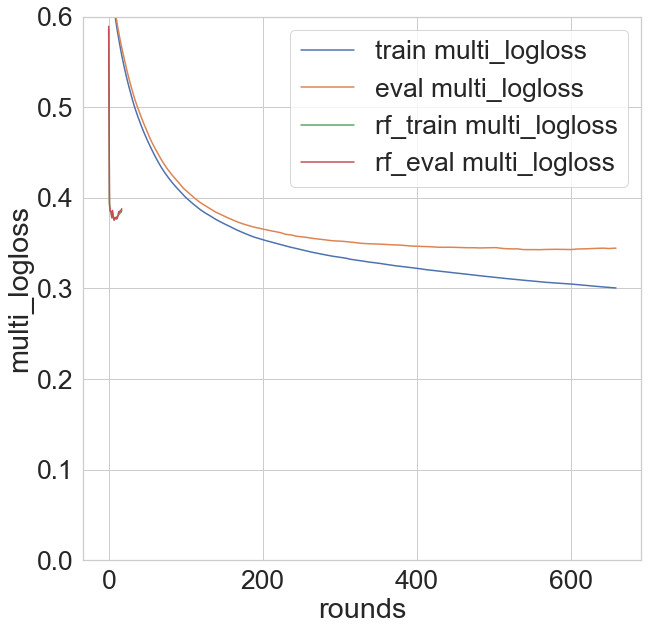

In [19]:
plt.figure(figsize=(10, 10))

plt.plot(train_metric, label='train multi_logloss')
plt.plot(eval_metric, label='eval multi_logloss')
plt.plot(rf_train_metric, label='rf_train multi_logloss')
plt.plot(rf_eval_metric, label='rf_eval multi_logloss')

plt.grid()
plt.legend()
plt.ylim(0 , 0.6)

plt.xlabel('rounds')
plt.ylabel('multi_logloss')
plt.grid(True)
plt.show()

lightGBM(gbdt) = 0.7166397095541033
lightGBM(rf) = 0.7417572744303226
lightGBM(total) = 0.7322578749000618


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

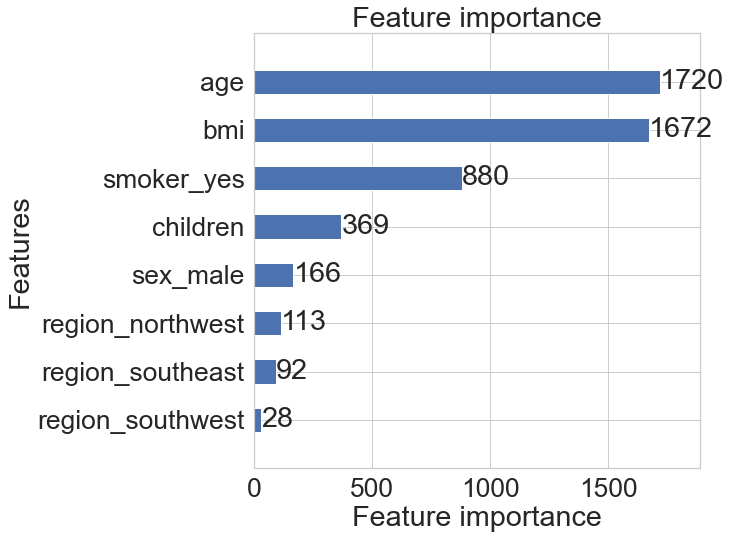

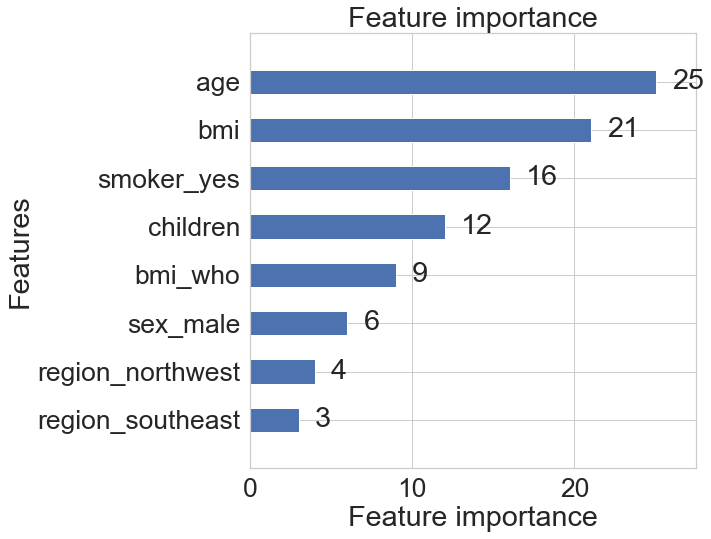

In [20]:
y_lgb_oof_train_max = np.argmax(y_lgb_oof_train, axis=1)
print("lightGBM(gbdt) = {}".format(f1_score(y_true=y_train, y_pred=y_lgb_oof_train_max, average='macro')))
y_lgb_rf_oof_train_max = np.argmax(y_lgb_rf_oof_train, axis=1)
print("lightGBM(rf) = {}".format(f1_score(y_true=y_train, y_pred=y_lgb_rf_oof_train_max, average='macro')))
# 結果の統合
y_lgb_total_oof_train = (y_lgb_oof_train + y_lgb_rf_oof_train)/2
y_lgb_total_oof_train_max = np.argmax(y_lgb_total_oof_train, axis=1)
print("lightGBM(total) = {}".format(f1_score(y_true=y_train, y_pred=y_lgb_total_oof_train_max, average='macro')))

# LGB plog importance
lgb.plot_importance(gbm, height=0.5, figsize=(8,8))
lgb.plot_importance(gbm_rf, height=0.5, figsize=(8,8))

In [21]:
y_lgb_total_preds = y_lgb_preds + y_lgb_rf_preds
y_pred_max = np.argmax(sum(y_lgb_total_preds)/len(y_lgb_total_preds), axis=1)
y_pred_max = list(y_pred_max)
y_pred_max[:10]

[0, 2, 0, 0, 0, 0, 0, 0, 0, 0]

In [22]:
submit_sample.head()

,0,1
0,13,0
1,23,0
2,27,0
3,28,0
4,29,0


提出

In [23]:
submit_sample[1] = y_pred_max
submit_sample.to_csv('submit.csv',index = False,  header=None)

In [24]:
submit_sample.head()

,0,1
0,13,0
1,23,2
2,27,0
3,28,0
4,29,0
